In [1]:
# Install standard analytics libraries
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
from pathlib import Path
import re
import xlsxwriter
from xlsxwriter.utility import xl_rowcol_to_cell
from datetime import datetime, timedelta
import os

print('Libraries imported.')

Libraries imported.


In [2]:
%matplotlib inline

# Matplotlib and associated plotting modules
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.mlab as mlab
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
plt.rcParams.update({'figure.max_open_warning': 0})

# import k-means from clustering stage
from sklearn.cluster import KMeans
from scipy.spatial import distance_matrix

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.2


In [3]:
# Define path for folder with png docs
file_name = 'Airport_Compressor_2'
event_log = 'Airport_2_&_4_Events'

path1 = Path.home().joinpath('Documents', 'EnLink', file_name + '.xlsx')
path2 = Path.home().joinpath('Documents', 'EnLink', event_log + '.xlsx')
out_path = Path.home().joinpath('Documents', 'EnLink')

# Create folder for analysis files
if not os.path.exists(out_path):
    os.makedirs(out_path)

# Define path for excel report
out_file = path1.stem +'_Analysis_v1.xlsx'
excel_out = Path.home().joinpath(out_path, out_file)
writer = pd.ExcelWriter(excel_out, engine='xlsxwriter')

# Create folder for analysis file
if not os.path.exists(out_path):
    os.makedirs(out_path)
    
print('Files to read:\n', path1, '\n', path2)

Files to read:
 C:\Users\jmchale\Documents\EnLink\Airport_Compressor_2.xlsx 
 C:\Users\jmchale\Documents\EnLink\Airport_2_&_4_Events.xlsx


In [4]:
# Read file and create dataframe
df = pd.read_excel(path1)
print('Data read into a dataframe.')

Data read into a dataframe.


In [5]:
display(df.head())

Date-Time  GCS_MIDW_AIRPORT_CMP2_1STSP          Date-Time.1  \
0  2019-10-31T09:25:27                         75.0  2019-10-31T09:31:28   
1  2019-10-31T09:51:27                         74.0  2019-10-31T09:55:27   
2  2019-10-31T09:57:27                         89.0  2019-10-31T10:07:27   
3  2019-10-31T10:05:29                         88.0  2019-10-31T10:21:27   
4  2019-10-31T10:07:27                         89.0  2019-10-31T10:23:27   

   GCS_MIDW_AIRPORT_CMP2_2NDSP          Date-Time.2  \
0                        281.0  2019-10-31T09:47:27   
1                        279.0  2019-10-31T09:53:26   
2                        278.0  2019-10-31T10:01:26   
3                        277.0  2019-10-31T10:05:29   
4                        278.0  2019-10-31T10:15:27   

   GCS_MIDW_AIRPORT_CMP2_3RDSP          Date-Time.3  \
0                       1085.0  2019-10-31T09:43:27   
1                       1088.0  2019-10-31T09:51:27   
2                       1089.0  2019-10-31T09:53:26   
3                       1092.0  2019-10-31T10:05:29   
4                       1095.0  2019-10-31T10:07:27   

   GCS_MIDW_AIRPORT_CMP2_CMPOILPRES          Date-Time.4  \
0                         61.616162  2019-10-31T09:49:27   
1                         62.626263  2019-10-31T09:51:28   
2                         61.616162  2019-10-31T09:53:27   
3                         60.606061  2019-10-31T09:55:27   
4                         61.616162  2019-10-31T09:59:28   

   GCS_MIDW_AIRPORT_CMP2_CMPOILT  ...         Date-Time.10  \
0                          139.0  ...  2019-10-31T09:49:27   
1                          140.0  ...  2019-10-31T09:55:27   
2                          137.0  ...  2019-10-31T09:57:27   
3                          138.0  ...  2019-10-31T09:59:28   
4                          137.0  ...  2019-10-31T10:01:27   

   GCS_MIDW_AIRPORT_CMP2_CYL4T         Date-Time.11  \
0                        245.0  2019-10-31T09:49:27   
1                        246.0  2019-10-31T09:51:28   
2                        241.0  2019-10-31T09:53:27   
3                        242.0  2019-10-31T09:59:28   
4                        246.0  2019-10-31T10:01:27   

   GCS_MIDW_AIRPORT_CMP2_ENGVIB1         Date-Time.12  \
0                           0.67  2019-10-31T09:49:27   
1                           0.64  2019-10-31T09:51:27   
2                           0.68  2019-10-31T09:53:26   
3                           0.72  2019-10-31T09:55:27   
4                           0.68  2019-10-31T09:57:27   

   GCS_MIDW_AIRPORT_CMP2_RPMS         Date-Time.13  \
0                      1329.0  2019-10-31T05:43:27   
1                      1324.0  2019-11-01T10:43:27   
2                      1328.0  2019-11-01T11:35:20   
3                      1331.0  2019-11-05T07:25:10   
4                      1322.0  2019-11-05T09:12:58   

   GCS_MIDW_AIRPORT_CMP2_RSTATUS         Date-Time.14  \
0                            1.0  2019-10-31T09:47:27   
1                            0.0  2019-10-31T09:51:27   
2                            1.0  2019-10-31T09:53:26   
3                            0.0  2019-10-31T09:57:27   
4                            1.0  2019-10-31T09:59:27   

   GCS_MIDW_AIRPORT_CMP2_SUCPRESS  
0                           118.0  
1                           119.0  
2                           117.0  
3                           164.0  
4                           162.0  

[5 rows x 30 columns]

In [6]:
# print the dimensions of the dataframe
print('Shape of dataframe is', df.shape[0], 'rows by', df.shape[1], 'columns.')
df_cols=df.columns
df_cols

Shape of dataframe is 189164 rows by 30 columns.


Index(['Date-Time', 'GCS_MIDW_AIRPORT_CMP2_1STSP', 'Date-Time.1',
       'GCS_MIDW_AIRPORT_CMP2_2NDSP', 'Date-Time.2',
       'GCS_MIDW_AIRPORT_CMP2_3RDSP', 'Date-Time.3',
       'GCS_MIDW_AIRPORT_CMP2_CMPOILPRES', 'Date-Time.4',
       'GCS_MIDW_AIRPORT_CMP2_CMPOILT', 'Date-Time.5',
       'GCS_MIDW_AIRPORT_CMP2_CMPVIB1', 'Date-Time.6',
       'GCS_MIDW_AIRPORT_CMP2_COOLERVIB', 'Date-Time.7',
       'GCS_MIDW_AIRPORT_CMP2_CYL1T', 'Date-Time.8',
       'GCS_MIDW_AIRPORT_CMP2_CYL2T', 'Date-Time.9',
       'GCS_MIDW_AIRPORT_CMP2_CYL3T', 'Date-Time.10',
       'GCS_MIDW_AIRPORT_CMP2_CYL4T', 'Date-Time.11',
       'GCS_MIDW_AIRPORT_CMP2_ENGVIB1', 'Date-Time.12',
       'GCS_MIDW_AIRPORT_CMP2_RPMS', 'Date-Time.13',
       'GCS_MIDW_AIRPORT_CMP2_RSTATUS', 'Date-Time.14',
       'GCS_MIDW_AIRPORT_CMP2_SUCPRESS'],
      dtype='object')

In [7]:
# Pass new column names
#cols=['Date-Time', 'GCS_MIDW_AIRPORT_CMP4_1STSP', 'Date-Time.1',
#       'GCS_MIDW_AIRPORT_CMP4_2NDSP', 'Date-Time.2',
#       'GCS_MIDW_AIRPORT_CMP4_3RDSP', 'Date-Time.3',
#       'GCS_MIDW_AIRPORT_CMP4_CMPOILPRES', 'Date-Time.4',
#       'GCS_MIDW_AIRPORT_CMP4_CMPOILT', 'Date-Time.5',
#       'GCS_MIDW_AIRPORT_CMP4_CMPVIB1', 'Date-Time.6',
#       'GCS_MIDW_AIRPORT_CMP4_COOLERVIB', 'Date-Time.7',
#       'GCS_MIDW_AIRPORT_CMP4_CYL1T', 'Date-Time.8',
#       'GCS_MIDW_AIRPORT_CMP4_CYL2T', 'Date-Time.9',
#       'GCS_MIDW_AIRPORT_CMP4_CYL3T', 'Date-Time.10',
#       'GCS_MIDW_AIRPORT_CMP4_CYL4T', 'Date-Time.11',
#       'GCS_MIDW_AIRPORT_CMP4_ENGVIB1', 'Date-Time.12',
#       'GCS_MIDW_AIRPORT_CMP4_RPMS', 'Date-Time.13',
#       'GCS_MIDW_AIRPORT_CMP4_RSTATUS', 'Date-Time.14',
#       'GCS_MIDW_AIRPORT_CMP4_SUCPRESS']

# Loop through an rename columns
#n=0
#while n <df.shape[1]:
#    df.rename(columns={df_cols[n]:cols[n]}, inplace=True)
#    n=n+1
#display(df)

## Create dataframe with normalized data

In [8]:
# Copy df
df_norm = df.copy(deep=True)

# Make column list
df_norm_cols=df_norm.columns

# Make Data Column list
df_norm_data_cols = []
n=1
while n < df_norm.shape[1]:
    df_norm_data_cols.append(df_norm_cols[n])
    n=n+2
display(df_norm_data_cols)

# Make Date Column list
df_norm_date_cols = []
n=0
while n < df_norm.shape[1]:
    df_norm_date_cols.append(df_norm_cols[n])
    n=n+2
display(df_norm_date_cols)

['GCS_MIDW_AIRPORT_CMP2_1STSP',
 'GCS_MIDW_AIRPORT_CMP2_2NDSP',
 'GCS_MIDW_AIRPORT_CMP2_3RDSP',
 'GCS_MIDW_AIRPORT_CMP2_CMPOILPRES',
 'GCS_MIDW_AIRPORT_CMP2_CMPOILT',
 'GCS_MIDW_AIRPORT_CMP2_CMPVIB1',
 'GCS_MIDW_AIRPORT_CMP2_COOLERVIB',
 'GCS_MIDW_AIRPORT_CMP2_CYL1T',
 'GCS_MIDW_AIRPORT_CMP2_CYL2T',
 'GCS_MIDW_AIRPORT_CMP2_CYL3T',
 'GCS_MIDW_AIRPORT_CMP2_CYL4T',
 'GCS_MIDW_AIRPORT_CMP2_ENGVIB1',
 'GCS_MIDW_AIRPORT_CMP2_RPMS',
 'GCS_MIDW_AIRPORT_CMP2_RSTATUS',
 'GCS_MIDW_AIRPORT_CMP2_SUCPRESS']

['Date-Time',
 'Date-Time.1',
 'Date-Time.2',
 'Date-Time.3',
 'Date-Time.4',
 'Date-Time.5',
 'Date-Time.6',
 'Date-Time.7',
 'Date-Time.8',
 'Date-Time.9',
 'Date-Time.10',
 'Date-Time.11',
 'Date-Time.12',
 'Date-Time.13',
 'Date-Time.14']

In [9]:
# Convert to datetimes
df_norm[df_norm_date_cols] = df_norm[df_norm_date_cols].apply(pd.to_datetime, errors='coerce')
df_norm[df_norm_data_cols] = df_norm[df_norm_data_cols].apply(pd.to_numeric, errors='coerce')
df_norm.dtypes

Date-Time                           datetime64[ns]
GCS_MIDW_AIRPORT_CMP2_1STSP                float64
Date-Time.1                         datetime64[ns]
GCS_MIDW_AIRPORT_CMP2_2NDSP                float64
Date-Time.2                         datetime64[ns]
GCS_MIDW_AIRPORT_CMP2_3RDSP                float64
Date-Time.3                         datetime64[ns]
GCS_MIDW_AIRPORT_CMP2_CMPOILPRES           float64
Date-Time.4                         datetime64[ns]
GCS_MIDW_AIRPORT_CMP2_CMPOILT              float64
Date-Time.5                         datetime64[ns]
GCS_MIDW_AIRPORT_CMP2_CMPVIB1              float64
Date-Time.6                         datetime64[ns]
GCS_MIDW_AIRPORT_CMP2_COOLERVIB            float64
Date-Time.7                         datetime64[ns]
GCS_MIDW_AIRPORT_CMP2_CYL1T                float64
Date-Time.8                         datetime64[ns]
GCS_MIDW_AIRPORT_CMP2_CYL2T                float64
Date-Time.9                         datetime64[ns]
GCS_MIDW_AIRPORT_CMP2_CYL3T    

In [10]:
# Normalize data
n=1
while n < df_norm.shape[1]:
    df_norm[df_norm_cols[n]] = df_norm[df_norm_cols[n]]/df_norm[df_norm_cols[n]].mean()
    n=n+2
display(df_norm.describe())
display(df_norm)

GCS_MIDW_AIRPORT_CMP2_1STSP  GCS_MIDW_AIRPORT_CMP2_2NDSP  \
count                 60713.000000                131327.000000   
mean                      1.000000                     1.000000   
std                       2.040518                     0.460565   
min                       0.000000                     0.000000   
25%                       0.943025                     0.968415   
50%                       0.989026                     1.003178   
75%                       1.073361                     1.052840   
max                     502.448131                   162.730891   

       GCS_MIDW_AIRPORT_CMP2_3RDSP  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  \
count                139015.000000                     174328.000000   
mean                      1.000000                          1.000000   
std                       0.243391                          3.414027   
min                       0.000000                          0.000000   
25%                       0.992487                          0.923214   
50%                       1.014461                          0.969375   
75%                       1.031857                          1.061696   
max                      60.002410                       1008.380629   

       GCS_MIDW_AIRPORT_CMP2_CMPOILT  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  \
count                  105809.000000                  142446.000000   
mean                        1.000000                       1.000000   
std                         0.111233                       2.885211   
min                         0.000000                       0.000000   
25%                         0.912278                       0.913482   
50%                         0.963315                       1.013135   
75%                         1.122804                       1.079570   
max                         1.422643                    1088.455517   

       GCS_MIDW_AIRPORT_CMP2_COOLERVIB  GCS_MIDW_AIRPORT_CMP2_CYL1T  \
count                    120444.000000                122038.000000   
mean                          1.000000                     1.000000   
std                           8.452285                     0.306597   
min                           0.000000                     0.000000   
25%                           0.805030                     0.731030   
50%                           0.894477                     0.857554   
75%                           1.028649                     1.326163   
max                        2930.978319                     9.615854   

       GCS_MIDW_AIRPORT_CMP2_CYL2T  GCS_MIDW_AIRPORT_CMP2_CYL3T  \
count                123841.000000                142729.000000   
mean                      1.000000                     1.000000   
std                       0.096582                     0.095526   
min                       0.000000                     0.000000   
25%                       0.960324                     0.941758   
50%                       1.011280                     1.007643   
75%                       1.054397                     1.069651   
max                       1.360132                     1.182042   

       GCS_MIDW_AIRPORT_CMP2_CYL4T  GCS_MIDW_AIRPORT_CMP2_ENGVIB1  \
count                144933.000000                  132512.000000   
mean                      1.000000                       1.000000   
std                       0.087064                       4.602767   
min                       0.000000                       0.000000   
25%                       0.959766                       0.648629   
50%                       1.008127                       1.135101   
75%                       1.052767                       1.208809   
max                       1.205288                     966.088881   

       GCS_MIDW_AIRPORT_CMP2_RPMS  GCS_MIDW_AIRPORT_CMP2_RSTATUS  \
count               187158.000000                     604.000000   
mean                     1.000000                       1.000000   
std                      0.045922           

Date-Time  GCS_MIDW_AIRPORT_CMP2_1STSP         Date-Time.1  \
0      2019-10-31 09:25:27                     0.575015 2019-10-31 09:31:28   
1      2019-10-31 09:51:27                     0.567348 2019-10-31 09:55:27   
2      2019-10-31 09:57:27                     0.682351 2019-10-31 10:07:27   
3      2019-10-31 10:05:29                     0.674684 2019-10-31 10:21:27   
4      2019-10-31 10:07:27                     0.682351 2019-10-31 10:23:27   
...                    ...                          ...                 ...   
189159                 NaT                          NaN                 NaT   
189160                 NaT                          NaN                 NaT   
189161                 NaT                          NaN                 NaT   
189162                 NaT                          NaN                 NaT   
189163                 NaT                          NaN                 NaT   

        GCS_MIDW_AIRPORT_CMP2_2NDSP         Date-Time.2  \
0                          0.697755 2019-10-31 09:47:27   
1                          0.692789 2019-10-31 09:53:26   
2                          0.690306 2019-10-31 10:01:26   
3                          0.687823 2019-10-31 10:05:29   
4                          0.690306 2019-10-31 10:15:27   
...                             ...                 ...   
189159                          NaN                 NaT   
189160                          NaN                 NaT   
189161                          NaN                 NaT   
189162                          NaN                 NaT   
189163                          NaN                 NaT   

        GCS_MIDW_AIRPORT_CMP2_3RDSP         Date-Time.3  \
0                          0.993402 2019-10-31 09:43:27   
1                          0.996149 2019-10-31 09:51:27   
2                          0.997065 2019-10-31 09:53:26   
3                          0.999811 2019-10-31 10:05:29   
4                          1.002558 2019-10-31 10:07:27   
...                             ...                 ...   
189159                          NaN                 NaT   
189160                          NaN                 NaT   
189161                          NaN                 NaT   
189162                          NaN                 NaT   
189163                          NaN                 NaT   

        GCS_MIDW_AIRPORT_CMP2_CMPOILPRES         Date-Time.4  \
0                               0.938601 2019-10-31 09:49:27   
1                               0.953988 2019-10-31 09:51:28   
2                               0.938601 2019-10-31 09:53:27   
3                               0.923214 2019-10-31 09:55:27   
4                               0.938601 2019-10-31 09:59:28   
...                                  ...                 ...   
189159                               NaN                 NaT   
189160                               NaN                 NaT   
189161                               NaN                 NaT   
189162                               NaN                 NaT   
189163                               NaN                 NaT   

        GCS_MIDW_AIRPORT_CMP2_CMPOILT  ...        Date-Time.10  \
0                            0.886760  ... 2019-10-31 09:49:27   
1                            0.893139  ... 2019-10-31 09:55:27   
2                            0.874001  ... 2019-10-31 09:57:27   
3                            0.880380  ... 2019-10-31 09:59:28   
4                            0.874001  ... 2019-10-31 10:01:27   
...                               ...  ...                 ...   
189159                            NaN  ...                 NaT   
189160                            NaN  ...                 NaT   
189161                            NaN  ...                 NaT   
189162                            NaN  ...                 NaT   
189163                            NaN  ...                 NaT   

        GCS_MIDW_AIRPORT_CMP2_CYL4T        Date-Time.11  \
0                          0.

In [11]:
# Replace values >5 or <0.2 with NAN
df_norm[df_norm_data_cols] = df_norm[df_norm_data_cols].applymap(lambda x: np.nan if x < 0.2 else x)
df_norm[df_norm_data_cols] = df_norm[df_norm_data_cols].applymap(lambda x: np.nan if x > 5 else x)
display(df_norm.describe())
display(df_norm)

GCS_MIDW_AIRPORT_CMP2_1STSP  GCS_MIDW_AIRPORT_CMP2_2NDSP  \
count                 60079.000000                130451.000000   
mean                      1.001583                     1.005226   
std                       0.113438                     0.082208   
min                       0.207005                     0.203615   
25%                       0.943025                     0.968415   
50%                       0.989026                     1.005661   
75%                       1.081028                     1.055324   
max                       1.548707                     1.457588   

       GCS_MIDW_AIRPORT_CMP2_3RDSP  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  \
count                138131.000000                     174241.000000   
mean                      1.005240                          0.988921   
std                       0.057852                          0.110981   
min                       0.203258                          0.215417   
25%                       0.993402                          0.923214   
50%                       1.014461                          0.969375   
75%                       1.031857                          1.061696   
max                       1.139895                          1.615625   

       GCS_MIDW_AIRPORT_CMP2_CMPOILT  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  \
count                  105797.000000                  141087.000000   
mean                        1.000113                       1.001629   
std                         0.110728                       0.117177   
min                         0.382774                       0.215914   
25%                         0.912278                       0.930091   
50%                         0.963315                       1.013135   
75%                         1.122804                       1.079570   
max                         1.422643                       1.444963   

       GCS_MIDW_AIRPORT_CMP2_COOLERVIB  GCS_MIDW_AIRPORT_CMP2_CYL1T  \
count                    118981.000000                122025.000000   
mean                          0.987271                     1.000028   
std                           0.393441                     0.305459   
min                           0.223619                     0.318654   
25%                           0.805030                     0.731030   
50%                           0.894477                     0.857554   
75%                           1.028649                     1.326163   
max                           4.248767                     1.462060   

       GCS_MIDW_AIRPORT_CMP2_CYL2T  GCS_MIDW_AIRPORT_CMP2_CYL3T  \
count                123815.000000                142717.000000   
mean                      1.000188                     1.000084   
std                       0.095709                     0.095089   
min                       0.203824                     0.213155   
25%                       0.960324                     0.941758   
50%                       1.011280                     1.007643   
75%                       1.054397                     1.069651   
max                       1.360132                     1.182042   

       GCS_MIDW_AIRPORT_CMP2_CYL4T  GCS_MIDW_AIRPORT_CMP2_ENGVIB1  \
count                144921.000000                  131253.000000   
mean                      1.000083                       0.987221   
std                       0.086591                       0.301284   
min                       0.208321                       0.206382   
25%                       0.959766                       0.648629   
50%                       1.008127                       1.135101   
75%                       1.052767                       1.208809   
max                       1.205288                       2.225977   

       GCS_MIDW_AIRPORT_CMP2_RPMS  GCS_MIDW_AIRPORT_CMP2_RSTATUS  \
count               186834.000000                   3.360000e+02   
mean                     1.001720                   1.797619e+00   
std                      0.020047           

Date-Time  GCS_MIDW_AIRPORT_CMP2_1STSP         Date-Time.1  \
0      2019-10-31 09:25:27                     0.575015 2019-10-31 09:31:28   
1      2019-10-31 09:51:27                     0.567348 2019-10-31 09:55:27   
2      2019-10-31 09:57:27                     0.682351 2019-10-31 10:07:27   
3      2019-10-31 10:05:29                     0.674684 2019-10-31 10:21:27   
4      2019-10-31 10:07:27                     0.682351 2019-10-31 10:23:27   
...                    ...                          ...                 ...   
189159                 NaT                          NaN                 NaT   
189160                 NaT                          NaN                 NaT   
189161                 NaT                          NaN                 NaT   
189162                 NaT                          NaN                 NaT   
189163                 NaT                          NaN                 NaT   

        GCS_MIDW_AIRPORT_CMP2_2NDSP         Date-Time.2  \
0                          0.697755 2019-10-31 09:47:27   
1                          0.692789 2019-10-31 09:53:26   
2                          0.690306 2019-10-31 10:01:26   
3                          0.687823 2019-10-31 10:05:29   
4                          0.690306 2019-10-31 10:15:27   
...                             ...                 ...   
189159                          NaN                 NaT   
189160                          NaN                 NaT   
189161                          NaN                 NaT   
189162                          NaN                 NaT   
189163                          NaN                 NaT   

        GCS_MIDW_AIRPORT_CMP2_3RDSP         Date-Time.3  \
0                          0.993402 2019-10-31 09:43:27   
1                          0.996149 2019-10-31 09:51:27   
2                          0.997065 2019-10-31 09:53:26   
3                          0.999811 2019-10-31 10:05:29   
4                          1.002558 2019-10-31 10:07:27   
...                             ...                 ...   
189159                          NaN                 NaT   
189160                          NaN                 NaT   
189161                          NaN                 NaT   
189162                          NaN                 NaT   
189163                          NaN                 NaT   

        GCS_MIDW_AIRPORT_CMP2_CMPOILPRES         Date-Time.4  \
0                               0.938601 2019-10-31 09:49:27   
1                               0.953988 2019-10-31 09:51:28   
2                               0.938601 2019-10-31 09:53:27   
3                               0.923214 2019-10-31 09:55:27   
4                               0.938601 2019-10-31 09:59:28   
...                                  ...                 ...   
189159                               NaN                 NaT   
189160                               NaN                 NaT   
189161                               NaN                 NaT   
189162                               NaN                 NaT   
189163                               NaN                 NaT   

        GCS_MIDW_AIRPORT_CMP2_CMPOILT  ...        Date-Time.10  \
0                            0.886760  ... 2019-10-31 09:49:27   
1                            0.893139  ... 2019-10-31 09:55:27   
2                            0.874001  ... 2019-10-31 09:57:27   
3                            0.880380  ... 2019-10-31 09:59:28   
4                            0.874001  ... 2019-10-31 10:01:27   
...                               ...  ...                 ...   
189159                            NaN  ...                 NaT   
189160                            NaN  ...                 NaT   
189161                            NaN  ...                 NaT   
189162                            NaN  ...                 NaT   
189163                            NaN  ...                 NaT   

        GCS_MIDW_AIRPORT_CMP2_CYL4T        Date-Time.11  \
0                          0.

## BOXPLOTS

In [12]:
df_norm.columns

Index(['Date-Time', 'GCS_MIDW_AIRPORT_CMP2_1STSP', 'Date-Time.1',
       'GCS_MIDW_AIRPORT_CMP2_2NDSP', 'Date-Time.2',
       'GCS_MIDW_AIRPORT_CMP2_3RDSP', 'Date-Time.3',
       'GCS_MIDW_AIRPORT_CMP2_CMPOILPRES', 'Date-Time.4',
       'GCS_MIDW_AIRPORT_CMP2_CMPOILT', 'Date-Time.5',
       'GCS_MIDW_AIRPORT_CMP2_CMPVIB1', 'Date-Time.6',
       'GCS_MIDW_AIRPORT_CMP2_COOLERVIB', 'Date-Time.7',
       'GCS_MIDW_AIRPORT_CMP2_CYL1T', 'Date-Time.8',
       'GCS_MIDW_AIRPORT_CMP2_CYL2T', 'Date-Time.9',
       'GCS_MIDW_AIRPORT_CMP2_CYL3T', 'Date-Time.10',
       'GCS_MIDW_AIRPORT_CMP2_CYL4T', 'Date-Time.11',
       'GCS_MIDW_AIRPORT_CMP2_ENGVIB1', 'Date-Time.12',
       'GCS_MIDW_AIRPORT_CMP2_RPMS', 'Date-Time.13',
       'GCS_MIDW_AIRPORT_CMP2_RSTATUS', 'Date-Time.14',
       'GCS_MIDW_AIRPORT_CMP2_SUCPRESS'],
      dtype='object')

In [13]:
# Create dataframe without datetimes
df1 = df_norm[df_norm_data_cols]
display(df1.head())

GCS_MIDW_AIRPORT_CMP2_1STSP  GCS_MIDW_AIRPORT_CMP2_2NDSP  \
0                     0.575015                     0.697755   
1                     0.567348                     0.692789   
2                     0.682351                     0.690306   
3                     0.674684                     0.687823   
4                     0.682351                     0.690306   

   GCS_MIDW_AIRPORT_CMP2_3RDSP  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  \
0                     0.993402                          0.938601   
1                     0.996149                          0.953988   
2                     0.997065                          0.938601   
3                     0.999811                          0.923214   
4                     1.002558                          0.938601   

   GCS_MIDW_AIRPORT_CMP2_CMPOILT  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  \
0                       0.886760                       0.930091   
1                       0.893139                       0.896873   
2                       0.874001                       0.930091   
3                       0.880380                       0.946700   
4                       0.874001                       0.979917   

   GCS_MIDW_AIRPORT_CMP2_COOLERVIB  GCS_MIDW_AIRPORT_CMP2_CYL1T  \
0                         1.252268                     0.581075   
1                         1.207544                     0.571703   
2                         1.296992                     0.590447   
3                         1.207544                     0.599819   
4                         1.252268                     0.613878   

   GCS_MIDW_AIRPORT_CMP2_CYL2T  GCS_MIDW_AIRPORT_CMP2_CYL3T  \
0                     1.030878                     0.891376   
1                     1.038718                     0.903003   
2                     1.030878                     0.895252   
3                     1.003441                     0.899127   
4                     1.011280                     0.887501   

   GCS_MIDW_AIRPORT_CMP2_CYL4T  GCS_MIDW_AIRPORT_CMP2_ENGVIB1  \
0                     0.911406                       0.987685   
1                     0.915126                       0.943461   
2                     0.896526                       1.002427   
3                     0.900246                       1.061393   
4                     0.915126                       1.002427   

   GCS_MIDW_AIRPORT_CMP2_RPMS  GCS_MIDW_AIRPORT_CMP2_RSTATUS  \
0                    0.989901                       1.797619   
1                    0.986176                            NaN   
2                    0.989156                       1.797619   
3                    0.991390                            NaN   
4                    0.984687                       1.797619   

   GCS_MIDW_AIRPORT_CMP2_SUCPRESS  
0                        0.484283  
1                        0.488387  
2                        0.480179  
3                        0.673071  
4                        0.664863

In [14]:
df1.dtypes

GCS_MIDW_AIRPORT_CMP2_1STSP         float64
GCS_MIDW_AIRPORT_CMP2_2NDSP         float64
GCS_MIDW_AIRPORT_CMP2_3RDSP         float64
GCS_MIDW_AIRPORT_CMP2_CMPOILPRES    float64
GCS_MIDW_AIRPORT_CMP2_CMPOILT       float64
GCS_MIDW_AIRPORT_CMP2_CMPVIB1       float64
GCS_MIDW_AIRPORT_CMP2_COOLERVIB     float64
GCS_MIDW_AIRPORT_CMP2_CYL1T         float64
GCS_MIDW_AIRPORT_CMP2_CYL2T         float64
GCS_MIDW_AIRPORT_CMP2_CYL3T         float64
GCS_MIDW_AIRPORT_CMP2_CYL4T         float64
GCS_MIDW_AIRPORT_CMP2_ENGVIB1       float64
GCS_MIDW_AIRPORT_CMP2_RPMS          float64
GCS_MIDW_AIRPORT_CMP2_RSTATUS       float64
GCS_MIDW_AIRPORT_CMP2_SUCPRESS      float64
dtype: object

In [15]:
df1.columns

Index(['GCS_MIDW_AIRPORT_CMP2_1STSP', 'GCS_MIDW_AIRPORT_CMP2_2NDSP',
       'GCS_MIDW_AIRPORT_CMP2_3RDSP', 'GCS_MIDW_AIRPORT_CMP2_CMPOILPRES',
       'GCS_MIDW_AIRPORT_CMP2_CMPOILT', 'GCS_MIDW_AIRPORT_CMP2_CMPVIB1',
       'GCS_MIDW_AIRPORT_CMP2_COOLERVIB', 'GCS_MIDW_AIRPORT_CMP2_CYL1T',
       'GCS_MIDW_AIRPORT_CMP2_CYL2T', 'GCS_MIDW_AIRPORT_CMP2_CYL3T',
       'GCS_MIDW_AIRPORT_CMP2_CYL4T', 'GCS_MIDW_AIRPORT_CMP2_ENGVIB1',
       'GCS_MIDW_AIRPORT_CMP2_RPMS', 'GCS_MIDW_AIRPORT_CMP2_RSTATUS',
       'GCS_MIDW_AIRPORT_CMP2_SUCPRESS'],
      dtype='object')

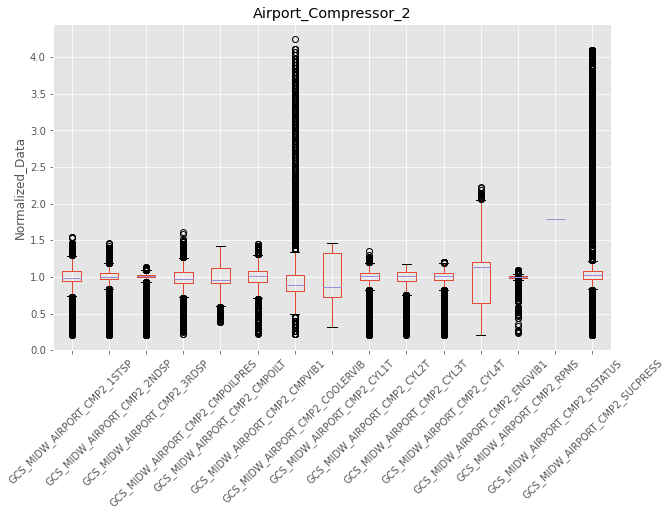

In [16]:
# Create boxplot of compressor data
df1.plot(kind='box', figsize=(10, 6))

plt.title(file_name)
plt.ylabel('Normalized_Data')
plt.xticks(rotation=45)

plt.show()

In [17]:
# Check for empty cells
df1.isna().describe()

GCS_MIDW_AIRPORT_CMP2_1STSP GCS_MIDW_AIRPORT_CMP2_2NDSP  \
count                       189164                      189164   
unique                           2                           2   
top                           True                       False   
freq                        129085                      130451   

       GCS_MIDW_AIRPORT_CMP2_3RDSP GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  \
count                       189164                           189164   
unique                           2                                2   
top                          False                            False   
freq                        138131                           174241   

       GCS_MIDW_AIRPORT_CMP2_CMPOILT GCS_MIDW_AIRPORT_CMP2_CMPVIB1  \
count                         189164                        189164   
unique                             2                             2   
top                            False                         False   
freq                          105797                        141087   

       GCS_MIDW_AIRPORT_CMP2_COOLERVIB GCS_MIDW_AIRPORT_CMP2_CYL1T  \
count                           189164                      189164   
unique                               2                           2   
top                              False                       False   
freq                            118981                      122025   

       GCS_MIDW_AIRPORT_CMP2_CYL2T GCS_MIDW_AIRPORT_CMP2_CYL3T  \
count                       189164                      189164   
unique                           2                           2   
top                          False                       False   
freq                        123815                      142717   

       GCS_MIDW_AIRPORT_CMP2_CYL4T GCS_MIDW_AIRPORT_CMP2_ENGVIB1  \
count                       189164                        189164   
unique                           2                             2   
top                          False                         False   
freq                        144921                        131253   

       GCS_MIDW_AIRPORT_CMP2_RPMS GCS_MIDW_AIRPORT_CMP2_RSTATUS  \
count                      189164                        189164   
unique                          2                             2   
top                         False                          True   
freq                       186834                        188828   

       GCS_MIDW_AIRPORT_CMP2_SUCPRESS  
count                          189164  
unique                              2  
top                              True  
freq                           104257

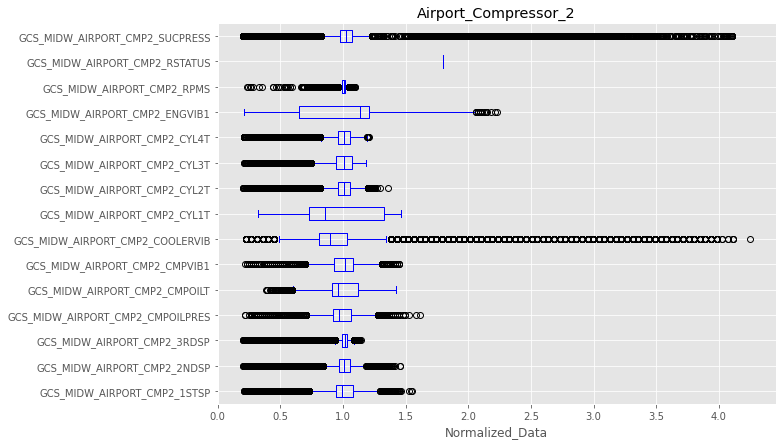

In [18]:
# horizontal box plots
df1.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title(file_name)
plt.xlabel('Normalized_Data')


plt.show()

## SUBPLOTS

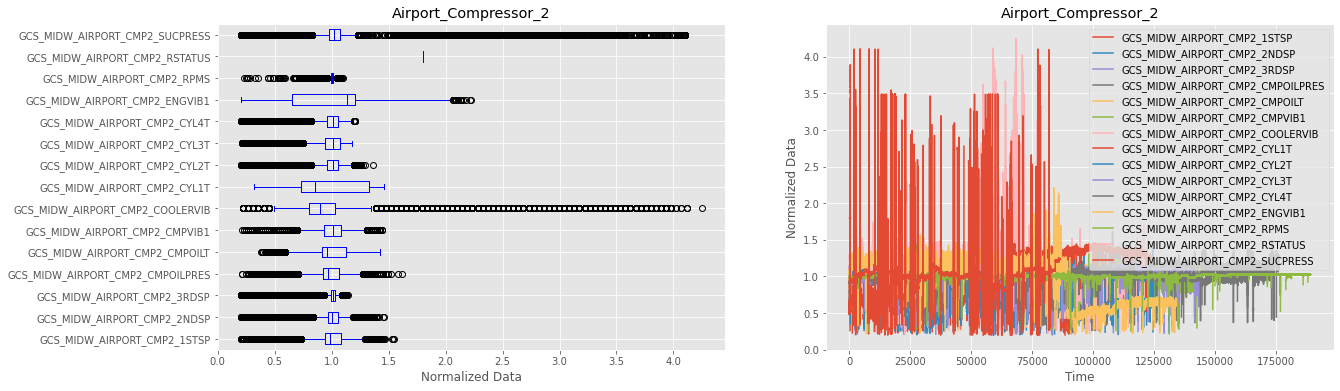

In [19]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df1.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title(file_name)
ax0.set_xlabel('Normalized Data')
#ax0.set_ylabel('Time')

# Subplot 2: Line plot
df1.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title (file_name)
ax1.set_ylabel('Normalized Data')
ax1.set_xlabel('Time')

plt.show()

## SCATTER PLOTS

In [20]:
# Copy new dataframe
df2=df_norm.copy(deep=True)
df2.describe()

GCS_MIDW_AIRPORT_CMP2_1STSP  GCS_MIDW_AIRPORT_CMP2_2NDSP  \
count                 60079.000000                130451.000000   
mean                      1.001583                     1.005226   
std                       0.113438                     0.082208   
min                       0.207005                     0.203615   
25%                       0.943025                     0.968415   
50%                       0.989026                     1.005661   
75%                       1.081028                     1.055324   
max                       1.548707                     1.457588   

       GCS_MIDW_AIRPORT_CMP2_3RDSP  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  \
count                138131.000000                     174241.000000   
mean                      1.005240                          0.988921   
std                       0.057852                          0.110981   
min                       0.203258                          0.215417   
25%                       0.993402                          0.923214   
50%                       1.014461                          0.969375   
75%                       1.031857                          1.061696   
max                       1.139895                          1.615625   

       GCS_MIDW_AIRPORT_CMP2_CMPOILT  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  \
count                  105797.000000                  141087.000000   
mean                        1.000113                       1.001629   
std                         0.110728                       0.117177   
min                         0.382774                       0.215914   
25%                         0.912278                       0.930091   
50%                         0.963315                       1.013135   
75%                         1.122804                       1.079570   
max                         1.422643                       1.444963   

       GCS_MIDW_AIRPORT_CMP2_COOLERVIB  GCS_MIDW_AIRPORT_CMP2_CYL1T  \
count                    118981.000000                122025.000000   
mean                          0.987271                     1.000028   
std                           0.393441                     0.305459   
min                           0.223619                     0.318654   
25%                           0.805030                     0.731030   
50%                           0.894477                     0.857554   
75%                           1.028649                     1.326163   
max                           4.248767                     1.462060   

       GCS_MIDW_AIRPORT_CMP2_CYL2T  GCS_MIDW_AIRPORT_CMP2_CYL3T  \
count                123815.000000                142717.000000   
mean                      1.000188                     1.000084   
std                       0.095709                     0.095089   
min                       0.203824                     0.213155   
25%                       0.960324                     0.941758   
50%                       1.011280                     1.007643   
75%                       1.054397                     1.069651   
max                       1.360132                     1.182042   

       GCS_MIDW_AIRPORT_CMP2_CYL4T  GCS_MIDW_AIRPORT_CMP2_ENGVIB1  \
count                144921.000000                  131253.000000   
mean                      1.000083                       0.987221   
std                       0.086591                       0.301284   
min                       0.208321                       0.206382   
25%                       0.959766                       0.648629   
50%                       1.008127                       1.135101   
75%                       1.052767                       1.208809   
max                       1.205288                       2.225977   

       GCS_MIDW_AIRPORT_CMP2_RPMS  GCS_MIDW_AIRPORT_CMP2_RSTATUS  \
count               186834.000000                   3.360000e+02   
mean                     1.001720                   1.797619e+00   
std                      0.020047           

In [21]:
df2.columns

Index(['Date-Time', 'GCS_MIDW_AIRPORT_CMP2_1STSP', 'Date-Time.1',
       'GCS_MIDW_AIRPORT_CMP2_2NDSP', 'Date-Time.2',
       'GCS_MIDW_AIRPORT_CMP2_3RDSP', 'Date-Time.3',
       'GCS_MIDW_AIRPORT_CMP2_CMPOILPRES', 'Date-Time.4',
       'GCS_MIDW_AIRPORT_CMP2_CMPOILT', 'Date-Time.5',
       'GCS_MIDW_AIRPORT_CMP2_CMPVIB1', 'Date-Time.6',
       'GCS_MIDW_AIRPORT_CMP2_COOLERVIB', 'Date-Time.7',
       'GCS_MIDW_AIRPORT_CMP2_CYL1T', 'Date-Time.8',
       'GCS_MIDW_AIRPORT_CMP2_CYL2T', 'Date-Time.9',
       'GCS_MIDW_AIRPORT_CMP2_CYL3T', 'Date-Time.10',
       'GCS_MIDW_AIRPORT_CMP2_CYL4T', 'Date-Time.11',
       'GCS_MIDW_AIRPORT_CMP2_ENGVIB1', 'Date-Time.12',
       'GCS_MIDW_AIRPORT_CMP2_RPMS', 'Date-Time.13',
       'GCS_MIDW_AIRPORT_CMP2_RSTATUS', 'Date-Time.14',
       'GCS_MIDW_AIRPORT_CMP2_SUCPRESS'],
      dtype='object')

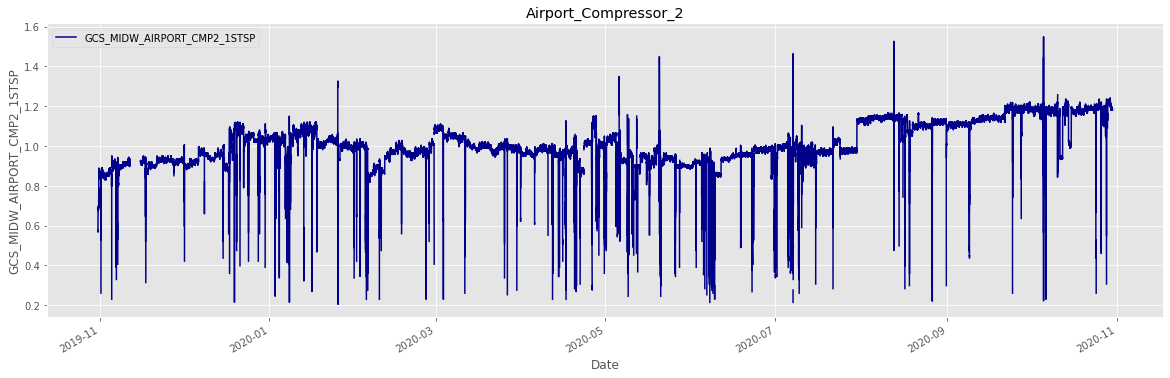

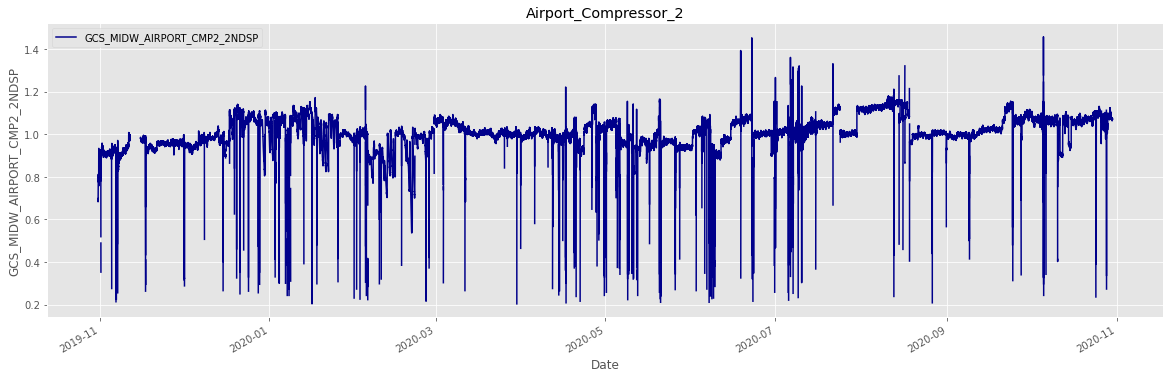

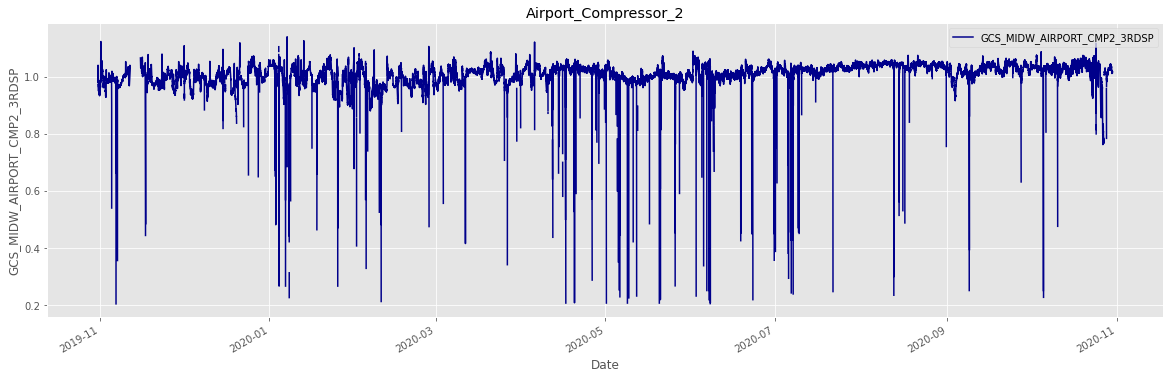

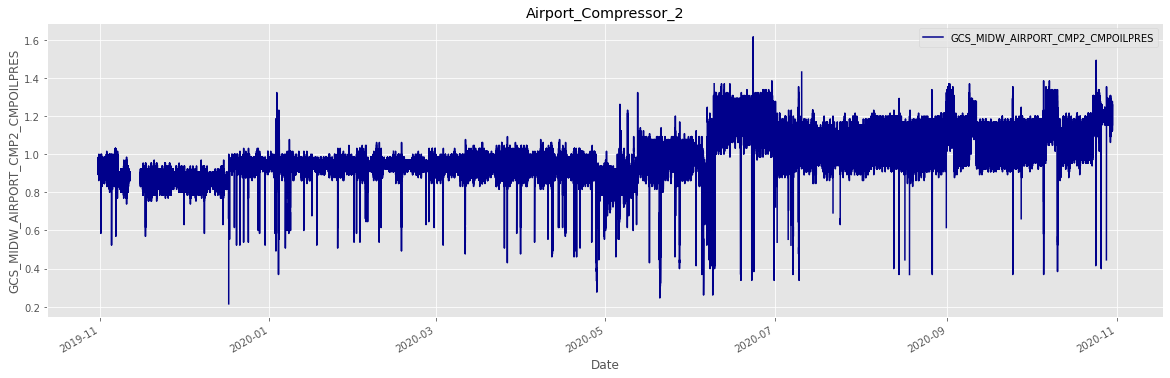

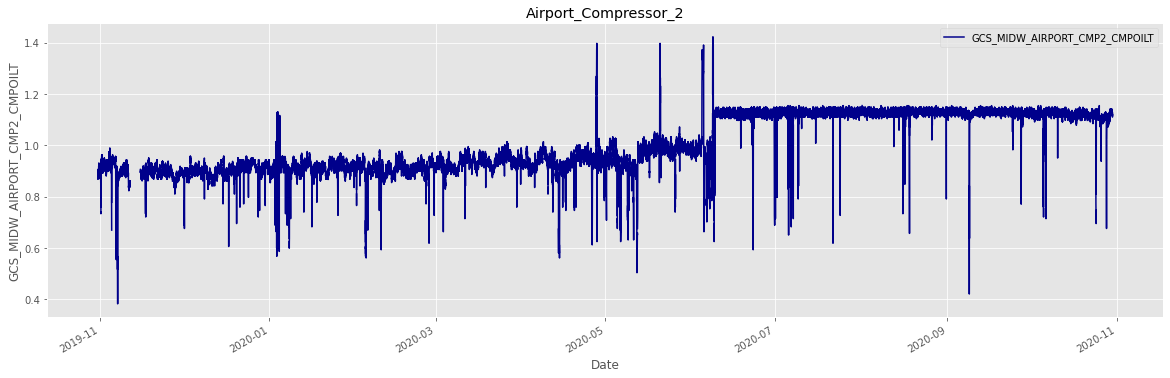

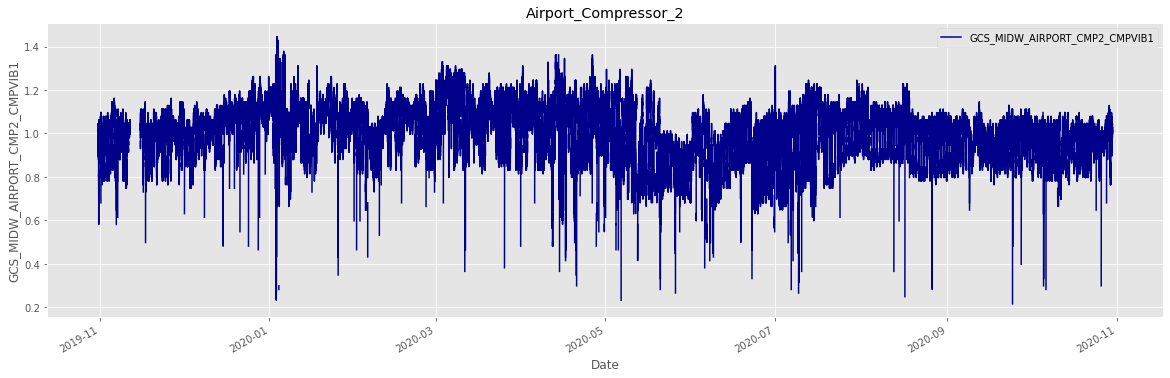

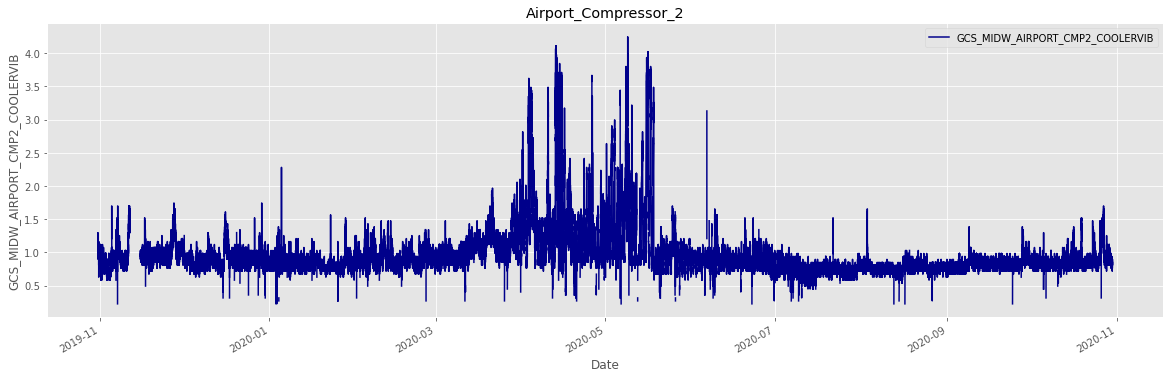

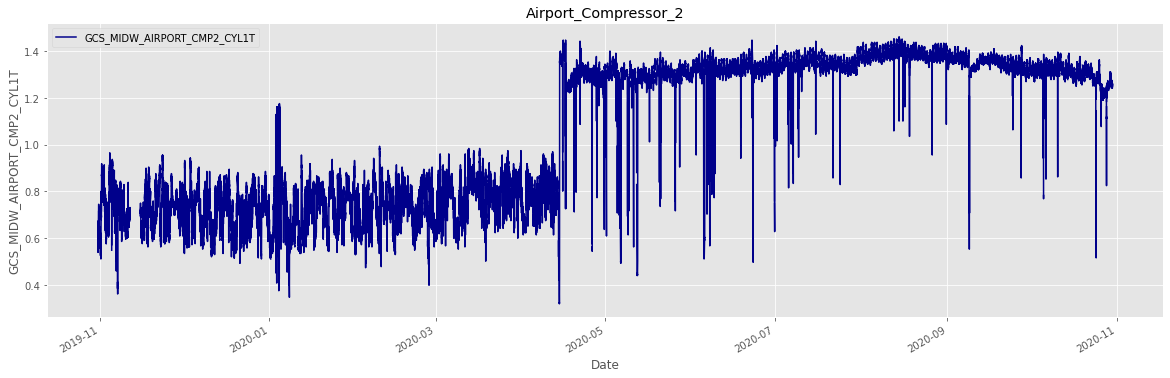

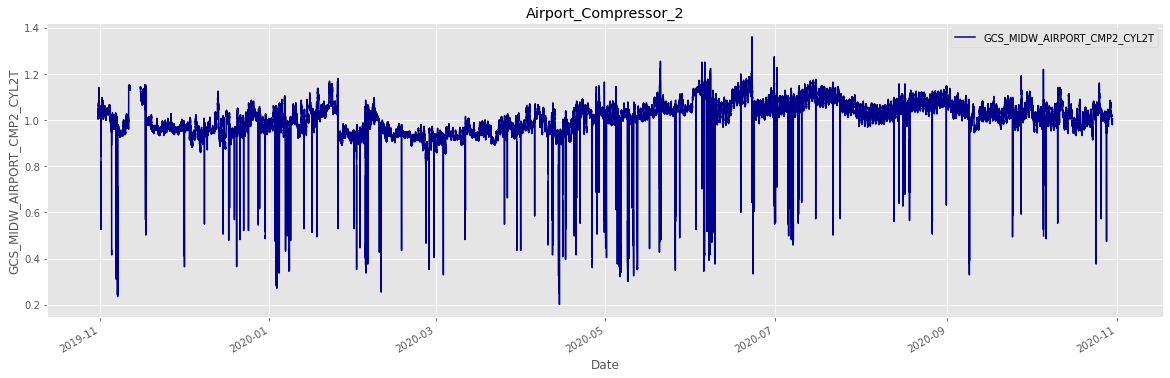

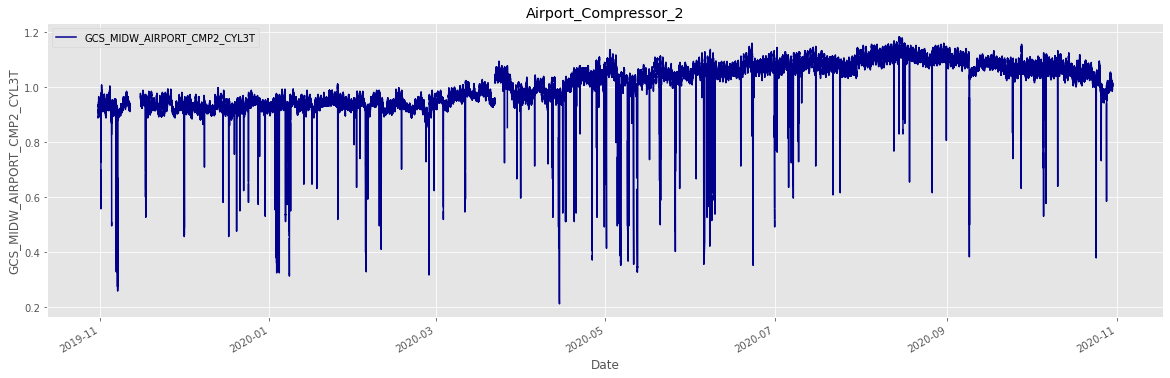

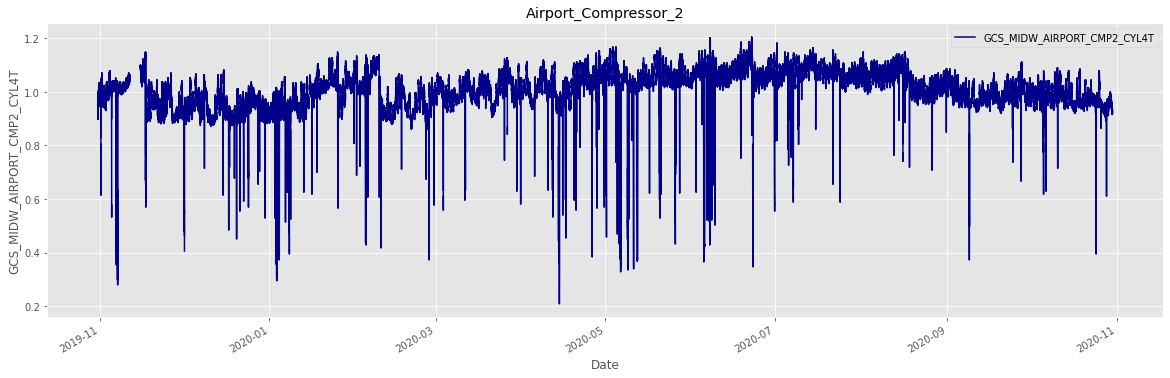

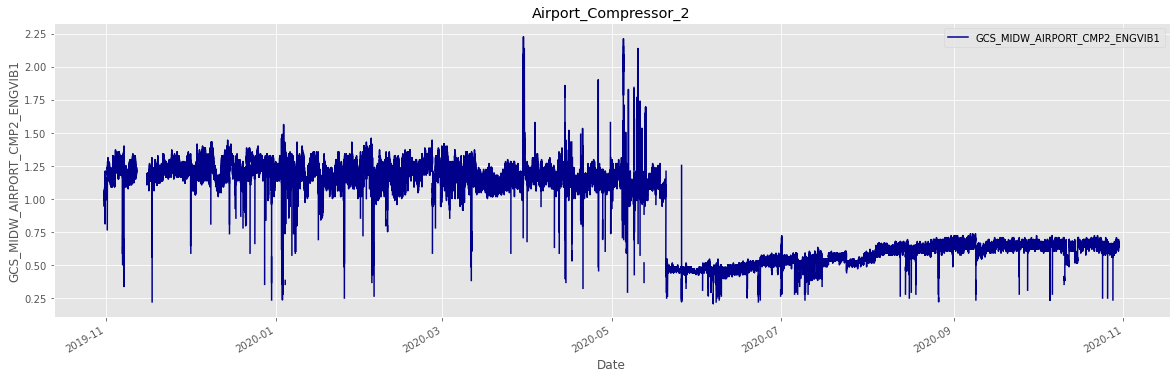

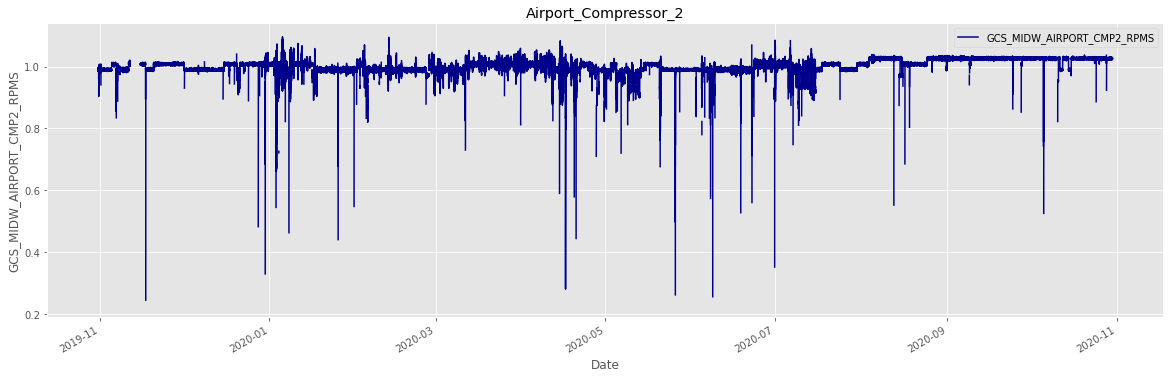

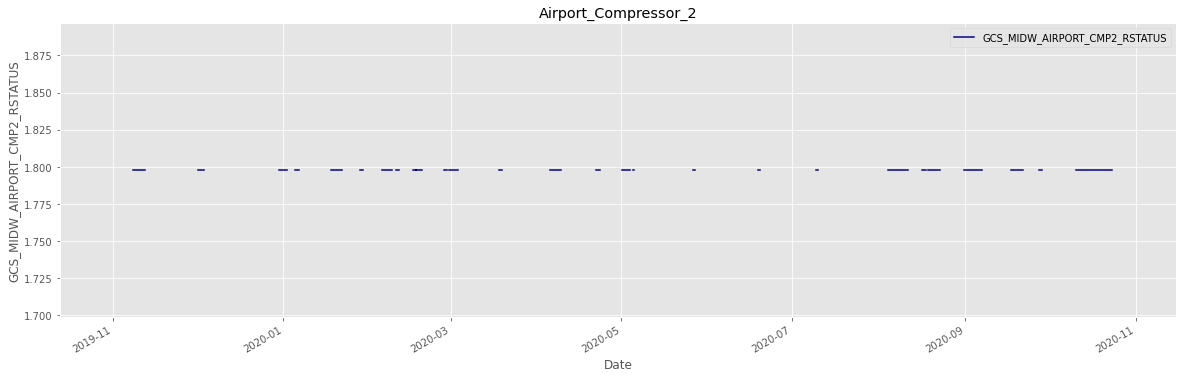

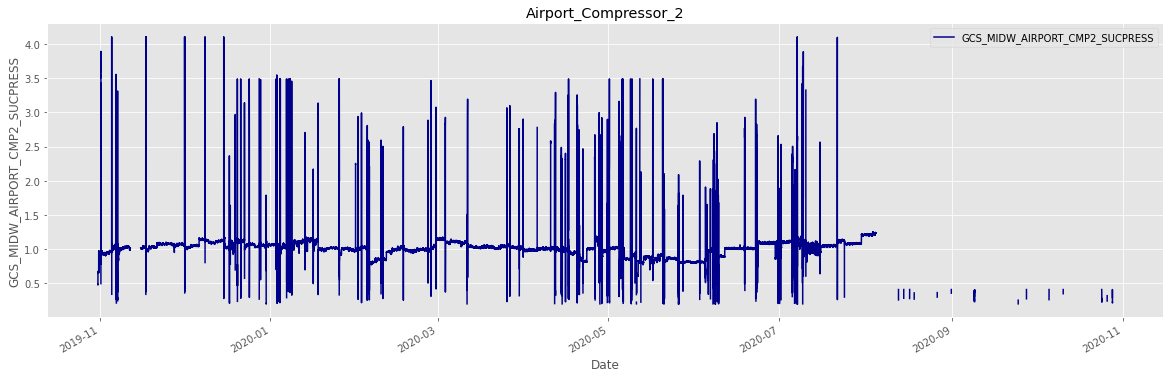

In [22]:
# Plot each signal against its individual time stamp column
n=0
df2_cols=df2.columns
while n < df2.shape[1]:
    df2.plot(kind='line', x= df2_cols[n], y=df2_cols[n+1], figsize=(20, 6), color='darkblue')
    plt.title(file_name)
    plt.xlabel('Date')
    plt.ylabel(df2_cols[n+1])
    #plt.ylim(0, 2)
    plt.show()
    n=n+2

#n=0
#df2_cols=df2.columns
#while n < df2.shape[1]:
#    df2.plot(kind='scatter', x= df2_cols[n], y=df2_cols[n+1], figsize=(20, 6), color='darkblue')
#    plt.title(file_name)
#    plt.xlabel('Date')
#    plt.ylabel(df2_cols[n+1])
#    #plt.ylim(0, 2)
#    plt.show()
#    n=n+2

## Group data by minute

In [23]:
# Make column list
df2_cols=df2.columns

# Make Data Column list
df2_data_cols = []
n=1
while n < df2.shape[1]:
    df2_data_cols.append(df2_cols[n])
    n=n+2
display(df2_data_cols)

# Make Date Column list
df2_date_cols = []
n=0
while n < df2.shape[1]:
    df2_date_cols.append(df2_cols[n])
    n=n+2
display(df2_date_cols)

['GCS_MIDW_AIRPORT_CMP2_1STSP',
 'GCS_MIDW_AIRPORT_CMP2_2NDSP',
 'GCS_MIDW_AIRPORT_CMP2_3RDSP',
 'GCS_MIDW_AIRPORT_CMP2_CMPOILPRES',
 'GCS_MIDW_AIRPORT_CMP2_CMPOILT',
 'GCS_MIDW_AIRPORT_CMP2_CMPVIB1',
 'GCS_MIDW_AIRPORT_CMP2_COOLERVIB',
 'GCS_MIDW_AIRPORT_CMP2_CYL1T',
 'GCS_MIDW_AIRPORT_CMP2_CYL2T',
 'GCS_MIDW_AIRPORT_CMP2_CYL3T',
 'GCS_MIDW_AIRPORT_CMP2_CYL4T',
 'GCS_MIDW_AIRPORT_CMP2_ENGVIB1',
 'GCS_MIDW_AIRPORT_CMP2_RPMS',
 'GCS_MIDW_AIRPORT_CMP2_RSTATUS',
 'GCS_MIDW_AIRPORT_CMP2_SUCPRESS']

['Date-Time',
 'Date-Time.1',
 'Date-Time.2',
 'Date-Time.3',
 'Date-Time.4',
 'Date-Time.5',
 'Date-Time.6',
 'Date-Time.7',
 'Date-Time.8',
 'Date-Time.9',
 'Date-Time.10',
 'Date-Time.11',
 'Date-Time.12',
 'Date-Time.13',
 'Date-Time.14']

In [24]:
# Create new dataframe with stacked metrics 
df3 = pd.DataFrame({'DateTime':[], 'Metric':[]})

n=0
for col in df2_data_cols:
    col = pd.DataFrame(df2[df2_cols[n:n+2]])
    col.rename(columns={df2_cols[n]:'DateTime'}, inplace=True)
    #col.rename(columns={df2_cols[n]:'DateTime', df2_cols[n+1]:'Data'}, inplace=True)
    col['Metric'] = df2_cols[n+1]
    display(col)
    df3=pd.concat([df3, col])
    n=n+2
display(df3)

DateTime  GCS_MIDW_AIRPORT_CMP2_1STSP  \
0      2019-10-31 09:25:27                     0.575015   
1      2019-10-31 09:51:27                     0.567348   
2      2019-10-31 09:57:27                     0.682351   
3      2019-10-31 10:05:29                     0.674684   
4      2019-10-31 10:07:27                     0.682351   
...                    ...                          ...   
189159                 NaT                          NaN   
189160                 NaT                          NaN   
189161                 NaT                          NaN   
189162                 NaT                          NaN   
189163                 NaT                          NaN   

                             Metric  
0       GCS_MIDW_AIRPORT_CMP2_1STSP  
1       GCS_MIDW_AIRPORT_CMP2_1STSP  
2       GCS_MIDW_AIRPORT_CMP2_1STSP  
3       GCS_MIDW_AIRPORT_CMP2_1STSP  
4       GCS_MIDW_AIRPORT_CMP2_1STSP  
...                             ...  
189159  GCS_MIDW_AIRPORT_CMP2_1STSP  
189160  GCS_MIDW_AIRPORT_CMP2_1STSP  
189161  GCS_MIDW_AIRPORT_CMP2_1STSP  
189162  GCS_MIDW_AIRPORT_CMP2_1STSP  
189163  GCS_MIDW_AIRPORT_CMP2_1STSP  

[189164 rows x 3 columns]

DateTime  GCS_MIDW_AIRPORT_CMP2_2NDSP  \
0      2019-10-31 09:31:28                     0.697755   
1      2019-10-31 09:55:27                     0.692789   
2      2019-10-31 10:07:27                     0.690306   
3      2019-10-31 10:21:27                     0.687823   
4      2019-10-31 10:23:27                     0.690306   
...                    ...                          ...   
189159                 NaT                          NaN   
189160                 NaT                          NaN   
189161                 NaT                          NaN   
189162                 NaT                          NaN   
189163                 NaT                          NaN   

                             Metric  
0       GCS_MIDW_AIRPORT_CMP2_2NDSP  
1       GCS_MIDW_AIRPORT_CMP2_2NDSP  
2       GCS_MIDW_AIRPORT_CMP2_2NDSP  
3       GCS_MIDW_AIRPORT_CMP2_2NDSP  
4       GCS_MIDW_AIRPORT_CMP2_2NDSP  
...                             ...  
189159  GCS_MIDW_AIRPORT_CMP2_2NDSP  
189160  GCS_MIDW_AIRPORT_CMP2_2NDSP  
189161  GCS_MIDW_AIRPORT_CMP2_2NDSP  
189162  GCS_MIDW_AIRPORT_CMP2_2NDSP  
189163  GCS_MIDW_AIRPORT_CMP2_2NDSP  

[189164 rows x 3 columns]

DateTime  GCS_MIDW_AIRPORT_CMP2_3RDSP  \
0      2019-10-31 09:47:27                     0.993402   
1      2019-10-31 09:53:26                     0.996149   
2      2019-10-31 10:01:26                     0.997065   
3      2019-10-31 10:05:29                     0.999811   
4      2019-10-31 10:15:27                     1.002558   
...                    ...                          ...   
189159                 NaT                          NaN   
189160                 NaT                          NaN   
189161                 NaT                          NaN   
189162                 NaT                          NaN   
189163                 NaT                          NaN   

                             Metric  
0       GCS_MIDW_AIRPORT_CMP2_3RDSP  
1       GCS_MIDW_AIRPORT_CMP2_3RDSP  
2       GCS_MIDW_AIRPORT_CMP2_3RDSP  
3       GCS_MIDW_AIRPORT_CMP2_3RDSP  
4       GCS_MIDW_AIRPORT_CMP2_3RDSP  
...                             ...  
189159  GCS_MIDW_AIRPORT_CMP2_3RDSP  
189160  GCS_MIDW_AIRPORT_CMP2_3RDSP  
189161  GCS_MIDW_AIRPORT_CMP2_3RDSP  
189162  GCS_MIDW_AIRPORT_CMP2_3RDSP  
189163  GCS_MIDW_AIRPORT_CMP2_3RDSP  

[189164 rows x 3 columns]

DateTime  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  \
0      2019-10-31 09:43:27                          0.938601   
1      2019-10-31 09:51:27                          0.953988   
2      2019-10-31 09:53:26                          0.938601   
3      2019-10-31 10:05:29                          0.923214   
4      2019-10-31 10:07:27                          0.938601   
...                    ...                               ...   
189159                 NaT                               NaN   
189160                 NaT                               NaN   
189161                 NaT                               NaN   
189162                 NaT                               NaN   
189163                 NaT                               NaN   

                                  Metric  
0       GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  
1       GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  
2       GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  
3       GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  
4       GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  
...                                  ...  
189159  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  
189160  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  
189161  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  
189162  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  
189163  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  

[189164 rows x 3 columns]

DateTime  GCS_MIDW_AIRPORT_CMP2_CMPOILT  \
0      2019-10-31 09:49:27                       0.886760   
1      2019-10-31 09:51:28                       0.893139   
2      2019-10-31 09:53:27                       0.874001   
3      2019-10-31 09:55:27                       0.880380   
4      2019-10-31 09:59:28                       0.874001   
...                    ...                            ...   
189159                 NaT                            NaN   
189160                 NaT                            NaN   
189161                 NaT                            NaN   
189162                 NaT                            NaN   
189163                 NaT                            NaN   

                               Metric  
0       GCS_MIDW_AIRPORT_CMP2_CMPOILT  
1       GCS_MIDW_AIRPORT_CMP2_CMPOILT  
2       GCS_MIDW_AIRPORT_CMP2_CMPOILT  
3       GCS_MIDW_AIRPORT_CMP2_CMPOILT  
4       GCS_MIDW_AIRPORT_CMP2_CMPOILT  
...                               ...  
189159  GCS_MIDW_AIRPORT_CMP2_CMPOILT  
189160  GCS_MIDW_AIRPORT_CMP2_CMPOILT  
189161  GCS_MIDW_AIRPORT_CMP2_CMPOILT  
189162  GCS_MIDW_AIRPORT_CMP2_CMPOILT  
189163  GCS_MIDW_AIRPORT_CMP2_CMPOILT  

[189164 rows x 3 columns]

DateTime  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  \
0      2019-10-31 09:45:27                       0.930091   
1      2019-10-31 09:51:28                       0.896873   
2      2019-10-31 09:53:27                       0.930091   
3      2019-10-31 09:55:27                       0.946700   
4      2019-10-31 09:57:27                       0.979917   
...                    ...                            ...   
189159                 NaT                            NaN   
189160                 NaT                            NaN   
189161                 NaT                            NaN   
189162                 NaT                            NaN   
189163                 NaT                            NaN   

                               Metric  
0       GCS_MIDW_AIRPORT_CMP2_CMPVIB1  
1       GCS_MIDW_AIRPORT_CMP2_CMPVIB1  
2       GCS_MIDW_AIRPORT_CMP2_CMPVIB1  
3       GCS_MIDW_AIRPORT_CMP2_CMPVIB1  
4       GCS_MIDW_AIRPORT_CMP2_CMPVIB1  
...                               ...  
189159  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  
189160  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  
189161  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  
189162  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  
189163  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  

[189164 rows x 3 columns]

DateTime  GCS_MIDW_AIRPORT_CMP2_COOLERVIB  \
0      2019-10-31 09:49:27                         1.252268   
1      2019-10-31 09:51:28                         1.207544   
2      2019-10-31 09:53:27                         1.296992   
3      2019-10-31 09:57:27                         1.207544   
4      2019-10-31 09:59:28                         1.252268   
...                    ...                              ...   
189159                 NaT                              NaN   
189160                 NaT                              NaN   
189161                 NaT                              NaN   
189162                 NaT                              NaN   
189163                 NaT                              NaN   

                                 Metric  
0       GCS_MIDW_AIRPORT_CMP2_COOLERVIB  
1       GCS_MIDW_AIRPORT_CMP2_COOLERVIB  
2       GCS_MIDW_AIRPORT_CMP2_COOLERVIB  
3       GCS_MIDW_AIRPORT_CMP2_COOLERVIB  
4       GCS_MIDW_AIRPORT_CMP2_COOLERVIB  
...                                 ...  
189159  GCS_MIDW_AIRPORT_CMP2_COOLERVIB  
189160  GCS_MIDW_AIRPORT_CMP2_COOLERVIB  
189161  GCS_MIDW_AIRPORT_CMP2_COOLERVIB  
189162  GCS_MIDW_AIRPORT_CMP2_COOLERVIB  
189163  GCS_MIDW_AIRPORT_CMP2_COOLERVIB  

[189164 rows x 3 columns]

DateTime  GCS_MIDW_AIRPORT_CMP2_CYL1T  \
0      2019-10-31 09:49:27                     0.581075   
1      2019-10-31 09:51:28                     0.571703   
2      2019-10-31 09:53:27                     0.590447   
3      2019-10-31 09:55:27                     0.599819   
4      2019-10-31 09:59:28                     0.613878   
...                    ...                          ...   
189159                 NaT                          NaN   
189160                 NaT                          NaN   
189161                 NaT                          NaN   
189162                 NaT                          NaN   
189163                 NaT                          NaN   

                             Metric  
0       GCS_MIDW_AIRPORT_CMP2_CYL1T  
1       GCS_MIDW_AIRPORT_CMP2_CYL1T  
2       GCS_MIDW_AIRPORT_CMP2_CYL1T  
3       GCS_MIDW_AIRPORT_CMP2_CYL1T  
4       GCS_MIDW_AIRPORT_CMP2_CYL1T  
...                             ...  
189159  GCS_MIDW_AIRPORT_CMP2_CYL1T  
189160  GCS_MIDW_AIRPORT_CMP2_CYL1T  
189161  GCS_MIDW_AIRPORT_CMP2_CYL1T  
189162  GCS_MIDW_AIRPORT_CMP2_CYL1T  
189163  GCS_MIDW_AIRPORT_CMP2_CYL1T  

[189164 rows x 3 columns]

DateTime  GCS_MIDW_AIRPORT_CMP2_CYL2T  \
0      2019-10-31 09:45:27                     1.030878   
1      2019-10-31 09:51:28                     1.038718   
2      2019-10-31 09:55:27                     1.030878   
3      2019-10-31 09:57:27                     1.003441   
4      2019-10-31 10:03:27                     1.011280   
...                    ...                          ...   
189159                 NaT                          NaN   
189160                 NaT                          NaN   
189161                 NaT                          NaN   
189162                 NaT                          NaN   
189163                 NaT                          NaN   

                             Metric  
0       GCS_MIDW_AIRPORT_CMP2_CYL2T  
1       GCS_MIDW_AIRPORT_CMP2_CYL2T  
2       GCS_MIDW_AIRPORT_CMP2_CYL2T  
3       GCS_MIDW_AIRPORT_CMP2_CYL2T  
4       GCS_MIDW_AIRPORT_CMP2_CYL2T  
...                             ...  
189159  GCS_MIDW_AIRPORT_CMP2_CYL2T  
189160  GCS_MIDW_AIRPORT_CMP2_CYL2T  
189161  GCS_MIDW_AIRPORT_CMP2_CYL2T  
189162  GCS_MIDW_AIRPORT_CMP2_CYL2T  
189163  GCS_MIDW_AIRPORT_CMP2_CYL2T  

[189164 rows x 3 columns]

DateTime  GCS_MIDW_AIRPORT_CMP2_CYL3T  \
0      2019-10-31 09:49:27                     0.891376   
1      2019-10-31 09:51:28                     0.903003   
2      2019-10-31 09:53:27                     0.895252   
3      2019-10-31 09:55:27                     0.899127   
4      2019-10-31 09:57:27                     0.887501   
...                    ...                          ...   
189159                 NaT                          NaN   
189160                 NaT                          NaN   
189161                 NaT                          NaN   
189162                 NaT                          NaN   
189163                 NaT                          NaN   

                             Metric  
0       GCS_MIDW_AIRPORT_CMP2_CYL3T  
1       GCS_MIDW_AIRPORT_CMP2_CYL3T  
2       GCS_MIDW_AIRPORT_CMP2_CYL3T  
3       GCS_MIDW_AIRPORT_CMP2_CYL3T  
4       GCS_MIDW_AIRPORT_CMP2_CYL3T  
...                             ...  
189159  GCS_MIDW_AIRPORT_CMP2_CYL3T  
189160  GCS_MIDW_AIRPORT_CMP2_CYL3T  
189161  GCS_MIDW_AIRPORT_CMP2_CYL3T  
189162  GCS_MIDW_AIRPORT_CMP2_CYL3T  
189163  GCS_MIDW_AIRPORT_CMP2_CYL3T  

[189164 rows x 3 columns]

DateTime  GCS_MIDW_AIRPORT_CMP2_CYL4T  \
0      2019-10-31 09:49:27                     0.911406   
1      2019-10-31 09:55:27                     0.915126   
2      2019-10-31 09:57:27                     0.896526   
3      2019-10-31 09:59:28                     0.900246   
4      2019-10-31 10:01:27                     0.915126   
...                    ...                          ...   
189159                 NaT                          NaN   
189160                 NaT                          NaN   
189161                 NaT                          NaN   
189162                 NaT                          NaN   
189163                 NaT                          NaN   

                             Metric  
0       GCS_MIDW_AIRPORT_CMP2_CYL4T  
1       GCS_MIDW_AIRPORT_CMP2_CYL4T  
2       GCS_MIDW_AIRPORT_CMP2_CYL4T  
3       GCS_MIDW_AIRPORT_CMP2_CYL4T  
4       GCS_MIDW_AIRPORT_CMP2_CYL4T  
...                             ...  
189159  GCS_MIDW_AIRPORT_CMP2_CYL4T  
189160  GCS_MIDW_AIRPORT_CMP2_CYL4T  
189161  GCS_MIDW_AIRPORT_CMP2_CYL4T  
189162  GCS_MIDW_AIRPORT_CMP2_CYL4T  
189163  GCS_MIDW_AIRPORT_CMP2_CYL4T  

[189164 rows x 3 columns]

DateTime  GCS_MIDW_AIRPORT_CMP2_ENGVIB1  \
0      2019-10-31 09:49:27                       0.987685   
1      2019-10-31 09:51:28                       0.943461   
2      2019-10-31 09:53:27                       1.002427   
3      2019-10-31 09:59:28                       1.061393   
4      2019-10-31 10:01:27                       1.002427   
...                    ...                            ...   
189159                 NaT                            NaN   
189160                 NaT                            NaN   
189161                 NaT                            NaN   
189162                 NaT                            NaN   
189163                 NaT                            NaN   

                               Metric  
0       GCS_MIDW_AIRPORT_CMP2_ENGVIB1  
1       GCS_MIDW_AIRPORT_CMP2_ENGVIB1  
2       GCS_MIDW_AIRPORT_CMP2_ENGVIB1  
3       GCS_MIDW_AIRPORT_CMP2_ENGVIB1  
4       GCS_MIDW_AIRPORT_CMP2_ENGVIB1  
...                               ...  
189159  GCS_MIDW_AIRPORT_CMP2_ENGVIB1  
189160  GCS_MIDW_AIRPORT_CMP2_ENGVIB1  
189161  GCS_MIDW_AIRPORT_CMP2_ENGVIB1  
189162  GCS_MIDW_AIRPORT_CMP2_ENGVIB1  
189163  GCS_MIDW_AIRPORT_CMP2_ENGVIB1  

[189164 rows x 3 columns]

DateTime  GCS_MIDW_AIRPORT_CMP2_RPMS  \
0      2019-10-31 09:49:27                    0.989901   
1      2019-10-31 09:51:27                    0.986176   
2      2019-10-31 09:53:26                    0.989156   
3      2019-10-31 09:55:27                    0.991390   
4      2019-10-31 09:57:27                    0.984687   
...                    ...                         ...   
189159 2020-10-30 09:39:32                    1.024908   
189160 2020-10-30 09:41:36                    1.027888   
189161 2020-10-30 09:43:31                    1.027143   
189162 2020-10-30 09:45:32                    1.025653   
189163 2020-10-30 09:53:40                    1.027888   

                            Metric  
0       GCS_MIDW_AIRPORT_CMP2_RPMS  
1       GCS_MIDW_AIRPORT_CMP2_RPMS  
2       GCS_MIDW_AIRPORT_CMP2_RPMS  
3       GCS_MIDW_AIRPORT_CMP2_RPMS  
4       GCS_MIDW_AIRPORT_CMP2_RPMS  
...                            ...  
189159  GCS_MIDW_AIRPORT_CMP2_RPMS  
189160  GCS_MIDW_AIRPORT_CMP2_RPMS  
189161  GCS_MIDW_AIRPORT_CMP2_RPMS  
189162  GCS_MIDW_AIRPORT_CMP2_RPMS  
189163  GCS_MIDW_AIRPORT_CMP2_RPMS  

[189164 rows x 3 columns]

DateTime  GCS_MIDW_AIRPORT_CMP2_RSTATUS  \
0      2019-10-31 05:43:27                       1.797619   
1      2019-11-01 10:43:27                            NaN   
2      2019-11-01 11:35:20                       1.797619   
3      2019-11-05 07:25:10                            NaN   
4      2019-11-05 09:12:58                       1.797619   
...                    ...                            ...   
189159                 NaT                            NaN   
189160                 NaT                            NaN   
189161                 NaT                            NaN   
189162                 NaT                            NaN   
189163                 NaT                            NaN   

                               Metric  
0       GCS_MIDW_AIRPORT_CMP2_RSTATUS  
1       GCS_MIDW_AIRPORT_CMP2_RSTATUS  
2       GCS_MIDW_AIRPORT_CMP2_RSTATUS  
3       GCS_MIDW_AIRPORT_CMP2_RSTATUS  
4       GCS_MIDW_AIRPORT_CMP2_RSTATUS  
...                               ...  
189159  GCS_MIDW_AIRPORT_CMP2_RSTATUS  
189160  GCS_MIDW_AIRPORT_CMP2_RSTATUS  
189161  GCS_MIDW_AIRPORT_CMP2_RSTATUS  
189162  GCS_MIDW_AIRPORT_CMP2_RSTATUS  
189163  GCS_MIDW_AIRPORT_CMP2_RSTATUS  

[189164 rows x 3 columns]

DateTime  GCS_MIDW_AIRPORT_CMP2_SUCPRESS  \
0      2019-10-31 09:47:27                        0.484283   
1      2019-10-31 09:51:27                        0.488387   
2      2019-10-31 09:53:26                        0.480179   
3      2019-10-31 09:57:27                        0.673071   
4      2019-10-31 09:59:27                        0.664863   
...                    ...                             ...   
189159                 NaT                             NaN   
189160                 NaT                             NaN   
189161                 NaT                             NaN   
189162                 NaT                             NaN   
189163                 NaT                             NaN   

                                Metric  
0       GCS_MIDW_AIRPORT_CMP2_SUCPRESS  
1       GCS_MIDW_AIRPORT_CMP2_SUCPRESS  
2       GCS_MIDW_AIRPORT_CMP2_SUCPRESS  
3       GCS_MIDW_AIRPORT_CMP2_SUCPRESS  
4       GCS_MIDW_AIRPORT_CMP2_SUCPRESS  
...                                ...  
189159  GCS_MIDW_AIRPORT_CMP2_SUCPRESS  
189160  GCS_MIDW_AIRPORT_CMP2_SUCPRESS  
189161  GCS_MIDW_AIRPORT_CMP2_SUCPRESS  
189162  GCS_MIDW_AIRPORT_CMP2_SUCPRESS  
189163  GCS_MIDW_AIRPORT_CMP2_SUCPRESS  

[189164 rows x 3 columns]

DateTime                          Metric  \
0      2019-10-31 09:25:27     GCS_MIDW_AIRPORT_CMP2_1STSP   
1      2019-10-31 09:51:27     GCS_MIDW_AIRPORT_CMP2_1STSP   
2      2019-10-31 09:57:27     GCS_MIDW_AIRPORT_CMP2_1STSP   
3      2019-10-31 10:05:29     GCS_MIDW_AIRPORT_CMP2_1STSP   
4      2019-10-31 10:07:27     GCS_MIDW_AIRPORT_CMP2_1STSP   
...                    ...                             ...   
189159                 NaT  GCS_MIDW_AIRPORT_CMP2_SUCPRESS   
189160                 NaT  GCS_MIDW_AIRPORT_CMP2_SUCPRESS   
189161                 NaT  GCS_MIDW_AIRPORT_CMP2_SUCPRESS   
189162                 NaT  GCS_MIDW_AIRPORT_CMP2_SUCPRESS   
189163                 NaT  GCS_MIDW_AIRPORT_CMP2_SUCPRESS   

        GCS_MIDW_AIRPORT_CMP2_1STSP  GCS_MIDW_AIRPORT_CMP2_2NDSP  \
0                          0.575015                          NaN   
1                          0.567348                          NaN   
2                          0.682351                          NaN   
3                          0.674684                          NaN   
4                          0.682351                          NaN   
...                             ...                          ...   
189159                          NaN                          NaN   
189160                          NaN                          NaN   
189161                          NaN                          NaN   
189162                          NaN                          NaN   
189163                          NaN                          NaN   

        GCS_MIDW_AIRPORT_CMP2_3RDSP  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  \
0                               NaN                               NaN   
1                               NaN                               NaN   
2                               NaN                               NaN   
3                               NaN                               NaN   
4                               NaN                               NaN   
...                             ...                               ...   
189159                          NaN                               NaN   
189160                          NaN                               NaN   
189161                          NaN                               NaN   
189162                          NaN                               NaN   
189163                          NaN                               NaN   

        GCS_MIDW_AIRPORT_CMP2_CMPOILT  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  \
0                                 NaN                            NaN   
1                                 NaN                            NaN   
2                                 NaN                            NaN   
3                                 NaN                            NaN   
4                                 NaN                            NaN   
...                               ...                            ...   
189159                            NaN                            NaN   
189160                            NaN                            NaN   
189161                            NaN                            NaN   
189162                            NaN                            NaN   
189163                            NaN                            NaN   

        GCS_MIDW_AIRPORT_CMP2_COOLERVIB  GCS_MIDW_AIRPORT_CMP2_CYL1T  \
0                                   NaN                          NaN   
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   
...                                 ...                          ...   
189159                              NaN                          NaN   
189160                              NaN                          NaN   
189161                              NaN                          N

In [25]:
# Round datetime to nearest minute
df3['DateTime'] = df3['DateTime'].values.astype('<M8[m]')
display(df3)

DateTime                          Metric  \
0      2019-10-31 09:25:00     GCS_MIDW_AIRPORT_CMP2_1STSP   
1      2019-10-31 09:51:00     GCS_MIDW_AIRPORT_CMP2_1STSP   
2      2019-10-31 09:57:00     GCS_MIDW_AIRPORT_CMP2_1STSP   
3      2019-10-31 10:05:00     GCS_MIDW_AIRPORT_CMP2_1STSP   
4      2019-10-31 10:07:00     GCS_MIDW_AIRPORT_CMP2_1STSP   
...                    ...                             ...   
189159                 NaT  GCS_MIDW_AIRPORT_CMP2_SUCPRESS   
189160                 NaT  GCS_MIDW_AIRPORT_CMP2_SUCPRESS   
189161                 NaT  GCS_MIDW_AIRPORT_CMP2_SUCPRESS   
189162                 NaT  GCS_MIDW_AIRPORT_CMP2_SUCPRESS   
189163                 NaT  GCS_MIDW_AIRPORT_CMP2_SUCPRESS   

        GCS_MIDW_AIRPORT_CMP2_1STSP  GCS_MIDW_AIRPORT_CMP2_2NDSP  \
0                          0.575015                          NaN   
1                          0.567348                          NaN   
2                          0.682351                          NaN   
3                          0.674684                          NaN   
4                          0.682351                          NaN   
...                             ...                          ...   
189159                          NaN                          NaN   
189160                          NaN                          NaN   
189161                          NaN                          NaN   
189162                          NaN                          NaN   
189163                          NaN                          NaN   

        GCS_MIDW_AIRPORT_CMP2_3RDSP  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  \
0                               NaN                               NaN   
1                               NaN                               NaN   
2                               NaN                               NaN   
3                               NaN                               NaN   
4                               NaN                               NaN   
...                             ...                               ...   
189159                          NaN                               NaN   
189160                          NaN                               NaN   
189161                          NaN                               NaN   
189162                          NaN                               NaN   
189163                          NaN                               NaN   

        GCS_MIDW_AIRPORT_CMP2_CMPOILT  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  \
0                                 NaN                            NaN   
1                                 NaN                            NaN   
2                                 NaN                            NaN   
3                                 NaN                            NaN   
4                                 NaN                            NaN   
...                               ...                            ...   
189159                            NaN                            NaN   
189160                            NaN                            NaN   
189161                            NaN                            NaN   
189162                            NaN                            NaN   
189163                            NaN                            NaN   

        GCS_MIDW_AIRPORT_CMP2_COOLERVIB  GCS_MIDW_AIRPORT_CMP2_CYL1T  \
0                                   NaN                          NaN   
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   
...                                 ...                          ...   
189159                              NaN                          NaN   
189160                              NaN                          NaN   
189161                              NaN                          N

In [26]:
df3.describe()

GCS_MIDW_AIRPORT_CMP2_1STSP  GCS_MIDW_AIRPORT_CMP2_2NDSP  \
count                 60079.000000                130451.000000   
mean                      1.001583                     1.005226   
std                       0.113438                     0.082208   
min                       0.207005                     0.203615   
25%                       0.943025                     0.968415   
50%                       0.989026                     1.005661   
75%                       1.081028                     1.055324   
max                       1.548707                     1.457588   

       GCS_MIDW_AIRPORT_CMP2_3RDSP  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  \
count                138131.000000                     174241.000000   
mean                      1.005240                          0.988921   
std                       0.057852                          0.110981   
min                       0.203258                          0.215417   
25%                       0.993402                          0.923214   
50%                       1.014461                          0.969375   
75%                       1.031857                          1.061696   
max                       1.139895                          1.615625   

       GCS_MIDW_AIRPORT_CMP2_CMPOILT  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  \
count                  105797.000000                  141087.000000   
mean                        1.000113                       1.001629   
std                         0.110728                       0.117177   
min                         0.382774                       0.215914   
25%                         0.912278                       0.930091   
50%                         0.963315                       1.013135   
75%                         1.122804                       1.079570   
max                         1.422643                       1.444963   

       GCS_MIDW_AIRPORT_CMP2_COOLERVIB  GCS_MIDW_AIRPORT_CMP2_CYL1T  \
count                    118981.000000                122025.000000   
mean                          0.987271                     1.000028   
std                           0.393441                     0.305459   
min                           0.223619                     0.318654   
25%                           0.805030                     0.731030   
50%                           0.894477                     0.857554   
75%                           1.028649                     1.326163   
max                           4.248767                     1.462060   

       GCS_MIDW_AIRPORT_CMP2_CYL2T  GCS_MIDW_AIRPORT_CMP2_CYL3T  \
count                123815.000000                142717.000000   
mean                      1.000188                     1.000084   
std                       0.095709                     0.095089   
min                       0.203824                     0.213155   
25%                       0.960324                     0.941758   
50%                       1.011280                     1.007643   
75%                       1.054397                     1.069651   
max                       1.360132                     1.182042   

       GCS_MIDW_AIRPORT_CMP2_CYL4T  GCS_MIDW_AIRPORT_CMP2_ENGVIB1  \
count                144921.000000                  131253.000000   
mean                      1.000083                       0.987221   
std                       0.086591                       0.301284   
min                       0.208321                       0.206382   
25%                       0.959766                       0.648629   
50%                       1.008127                       1.135101   
75%                       1.052767                       1.208809   
max                       1.205288                       2.225977   

       GCS_MIDW_AIRPORT_CMP2_RPMS  GCS_MIDW_AIRPORT_CMP2_RSTATUS  \
count               186834.000000                   3.360000e+02   
mean                     1.001720                   1.797619e+00   
std                      0.020047           

In [27]:
# Drop rows without datetime data
df3.dropna(subset=['DateTime'], inplace=True)
display(df3)

DateTime                          Metric  \
0     2019-10-31 09:25:00     GCS_MIDW_AIRPORT_CMP2_1STSP   
1     2019-10-31 09:51:00     GCS_MIDW_AIRPORT_CMP2_1STSP   
2     2019-10-31 09:57:00     GCS_MIDW_AIRPORT_CMP2_1STSP   
3     2019-10-31 10:05:00     GCS_MIDW_AIRPORT_CMP2_1STSP   
4     2019-10-31 10:07:00     GCS_MIDW_AIRPORT_CMP2_1STSP   
...                   ...                             ...   
90100 2020-10-30 07:07:00  GCS_MIDW_AIRPORT_CMP2_SUCPRESS   
90101 2020-10-30 07:09:00  GCS_MIDW_AIRPORT_CMP2_SUCPRESS   
90102 2020-10-30 07:13:00  GCS_MIDW_AIRPORT_CMP2_SUCPRESS   
90103 2020-10-30 07:17:00  GCS_MIDW_AIRPORT_CMP2_SUCPRESS   
90104 2020-10-30 09:45:00  GCS_MIDW_AIRPORT_CMP2_SUCPRESS   

       GCS_MIDW_AIRPORT_CMP2_1STSP  GCS_MIDW_AIRPORT_CMP2_2NDSP  \
0                         0.575015                          NaN   
1                         0.567348                          NaN   
2                         0.682351                          NaN   
3                         0.674684                          NaN   
4                         0.682351                          NaN   
...                            ...                          ...   
90100                          NaN                          NaN   
90101                          NaN                          NaN   
90102                          NaN                          NaN   
90103                          NaN                          NaN   
90104                          NaN                          NaN   

       GCS_MIDW_AIRPORT_CMP2_3RDSP  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  \
0                              NaN                               NaN   
1                              NaN                               NaN   
2                              NaN                               NaN   
3                              NaN                               NaN   
4                              NaN                               NaN   
...                            ...                               ...   
90100                          NaN                               NaN   
90101                          NaN                               NaN   
90102                          NaN                               NaN   
90103                          NaN                               NaN   
90104                          NaN                               NaN   

       GCS_MIDW_AIRPORT_CMP2_CMPOILT  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  \
0                                NaN                            NaN   
1                                NaN                            NaN   
2                                NaN                            NaN   
3                                NaN                            NaN   
4                                NaN                            NaN   
...                              ...                            ...   
90100                            NaN                            NaN   
90101                            NaN                            NaN   
90102                            NaN                            NaN   
90103                            NaN                            NaN   
90104                            NaN                            NaN   

       GCS_MIDW_AIRPORT_CMP2_COOLERVIB  GCS_MIDW_AIRPORT_CMP2_CYL1T  \
0                                  NaN                          NaN   
1                                  NaN                          NaN   
2                                  NaN                          NaN   
3                                  NaN                          NaN   
4                                  NaN                          NaN   
...                                ...                          ...   
90100                              NaN                          NaN   
90101                              NaN                          NaN   
90102                              NaN                          NaN   
90103                              NaN             

In [28]:
# Group by datetime to nearest minute
df_min = df3.groupby(['DateTime'], as_index=False).mean()
display(df_min)

DateTime  GCS_MIDW_AIRPORT_CMP2_1STSP  \
0      2019-10-31 05:43:00                          NaN   
1      2019-10-31 09:25:00                     0.575015   
2      2019-10-31 09:31:00                          NaN   
3      2019-10-31 09:43:00                          NaN   
4      2019-10-31 09:45:00                          NaN   
...                    ...                          ...   
222392 2020-10-30 09:39:00                          NaN   
222393 2020-10-30 09:41:00                          NaN   
222394 2020-10-30 09:43:00                          NaN   
222395 2020-10-30 09:45:00                     1.180698   
222396 2020-10-30 09:53:00                          NaN   

        GCS_MIDW_AIRPORT_CMP2_2NDSP  GCS_MIDW_AIRPORT_CMP2_3RDSP  \
0                               NaN                          NaN   
1                               NaN                          NaN   
2                          0.697755                          NaN   
3                               NaN                          NaN   
4                               NaN                          NaN   
...                             ...                          ...   
222392                     1.072705                          NaN   
222393                     1.075188                          NaN   
222394                     1.072705                     1.016292   
222395                     1.070222                     1.015376   
222396                          NaN                     1.014461   

        GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  GCS_MIDW_AIRPORT_CMP2_CMPOILT  \
0                                    NaN                            NaN   
1                                    NaN                            NaN   
2                                    NaN                            NaN   
3                               0.938601                            NaN   
4                                    NaN                            NaN   
...                                  ...                            ...   
222392                          1.215565                            NaN   
222393                          1.184791                       1.122804   
222394                          1.230952                       1.116424   
222395                          1.123244                       1.122804   
222396                          1.154018                       1.116424   

        GCS_MIDW_AIRPORT_CMP2_CMPVIB1  GCS_MIDW_AIRPORT_CMP2_COOLERVIB  \
0                                 NaN                              NaN   
1                                 NaN                              NaN   
2                                 NaN                              NaN   
3                                 NaN                              NaN   
4                            0.930091                              NaN   
...                               ...                              ...   
222392                       1.029744                         0.805030   
222393                            NaN                              NaN   
222394                            NaN                         0.849753   
222395                            NaN                              NaN   
222396                       1.013135                              NaN   

        GCS_MIDW_AIRPORT_CMP2_CYL1T  GCS_MIDW_AIRPORT_CMP2_CYL2T  \
0                               NaN                          NaN   
1                               NaN                          NaN   
2                               NaN                          NaN   
3                               NaN                          NaN   
4                               NaN                     1.030878   
...                             ...                          ...   
222392                     1.251186                          NaN   
222393                     1.255872                     0.995601   
222394                          NaN                     0.999521   
222395                

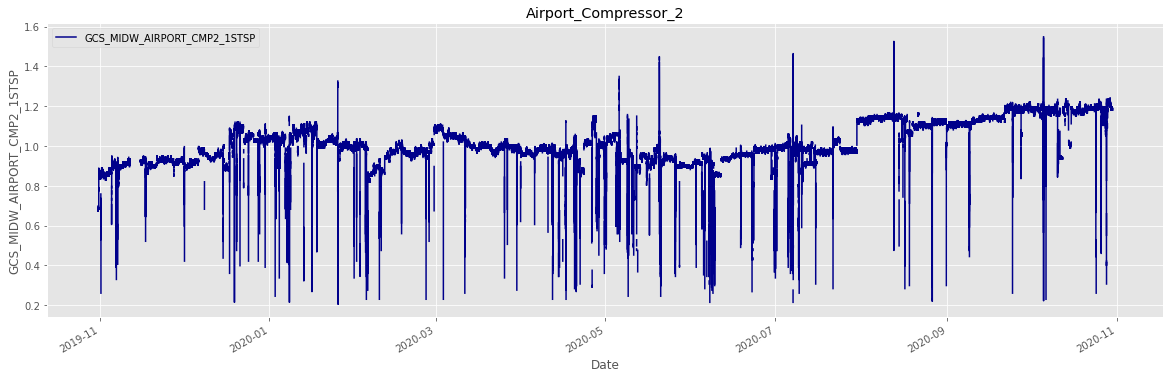

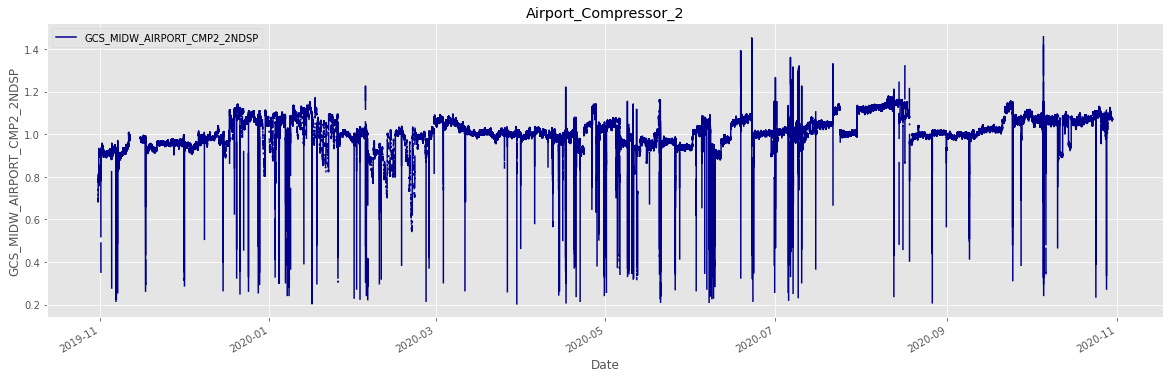

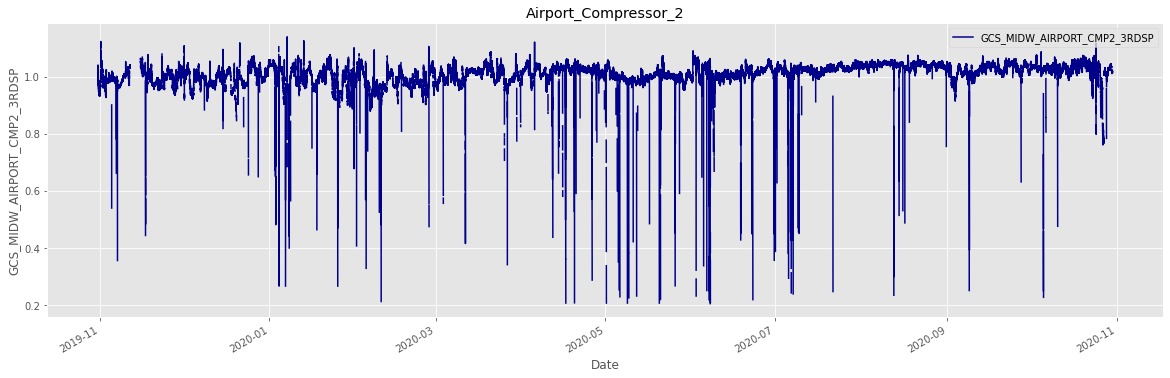

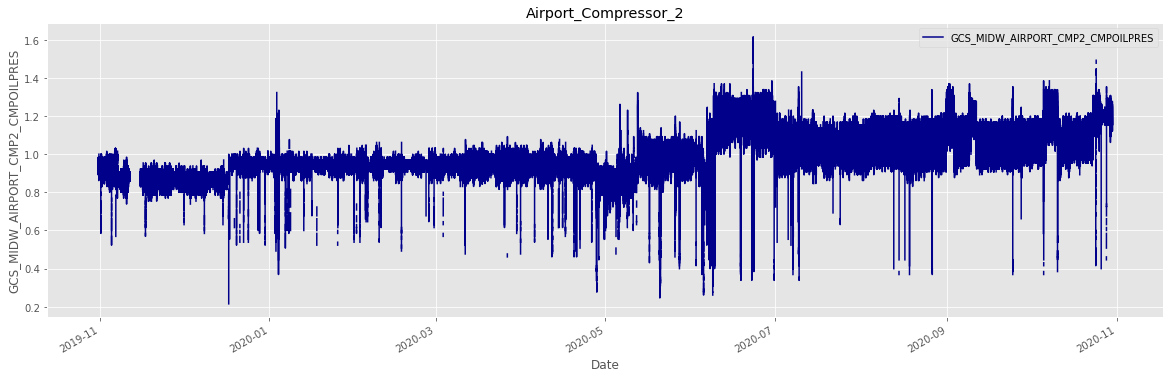

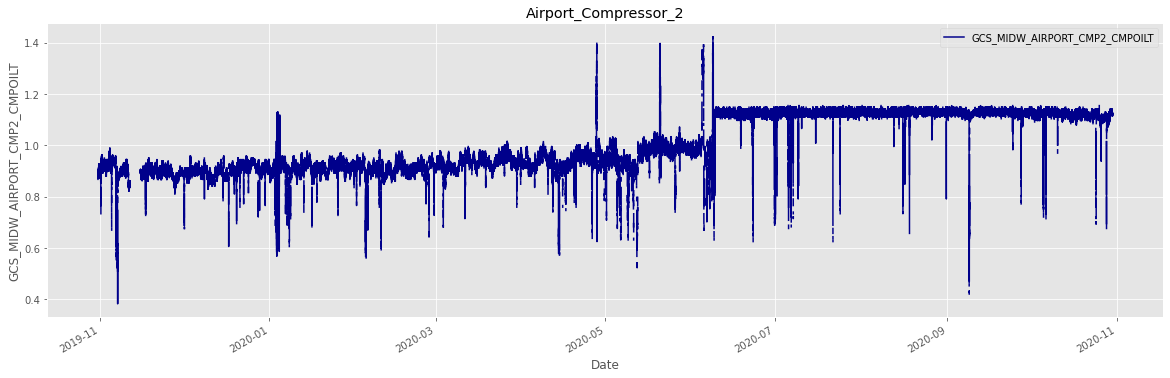

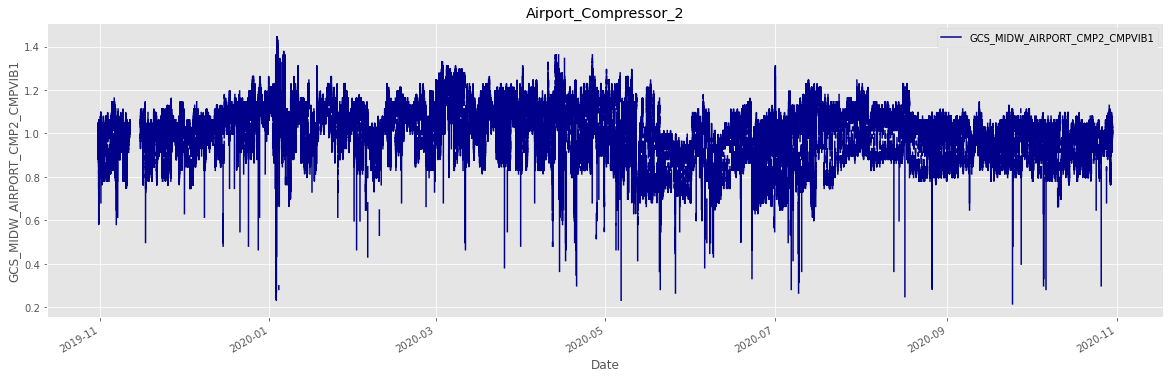

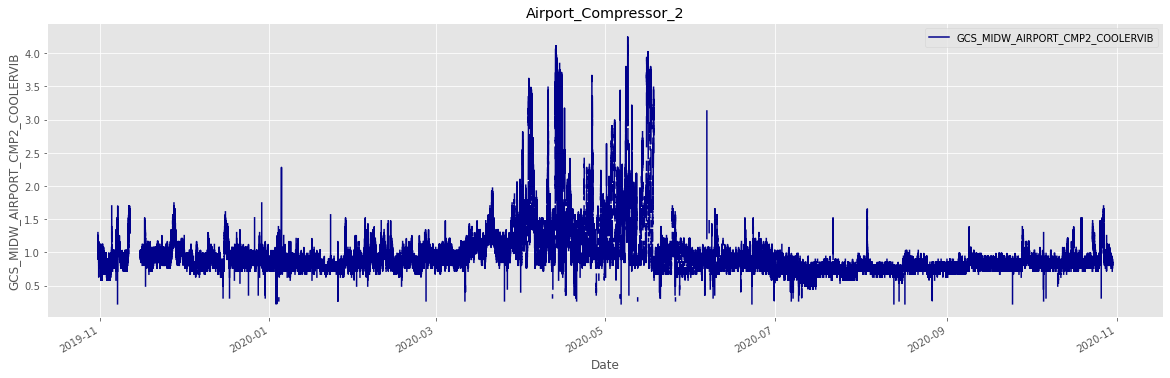

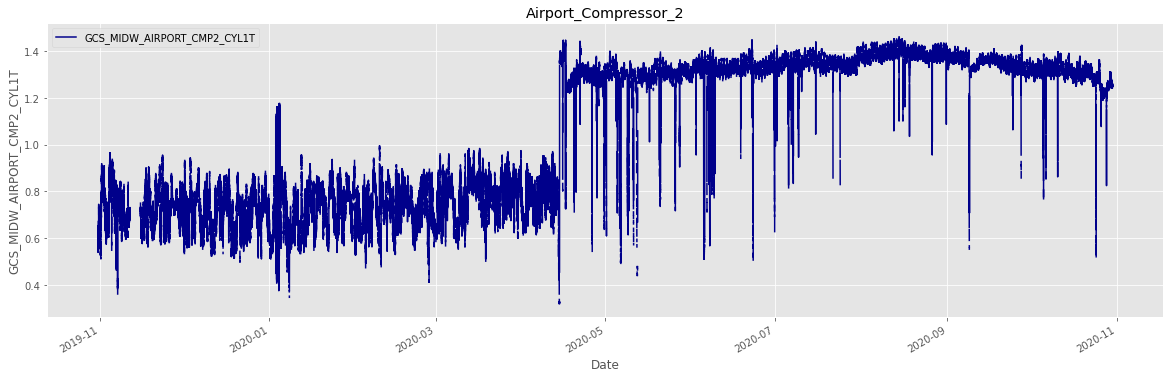

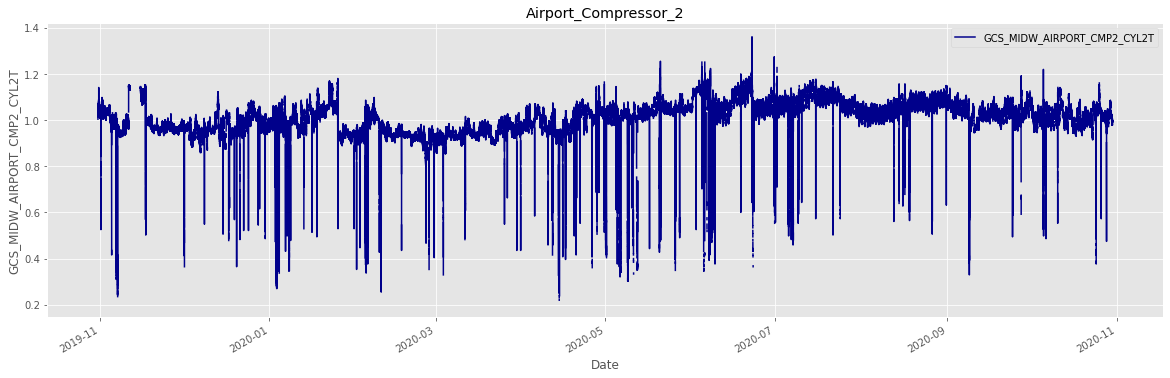

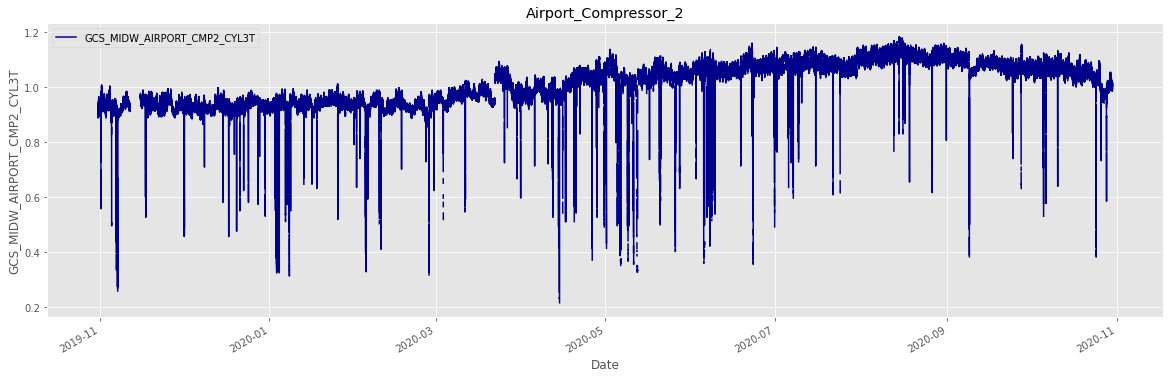

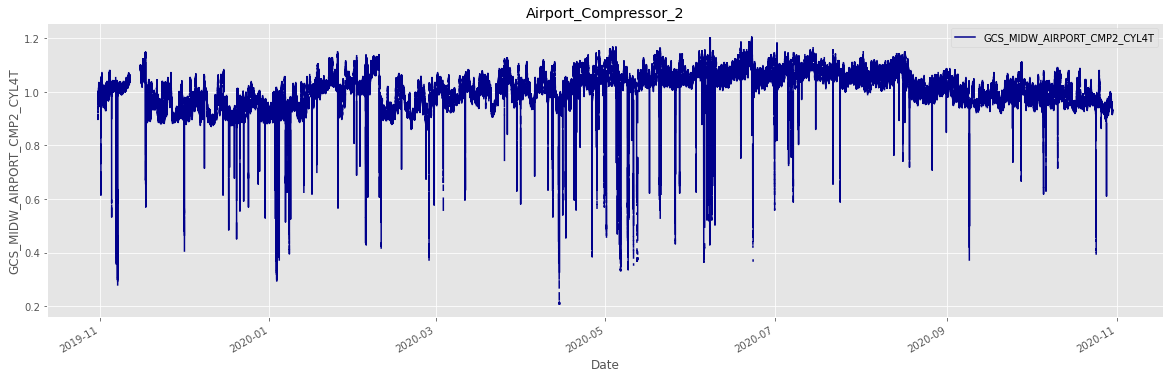

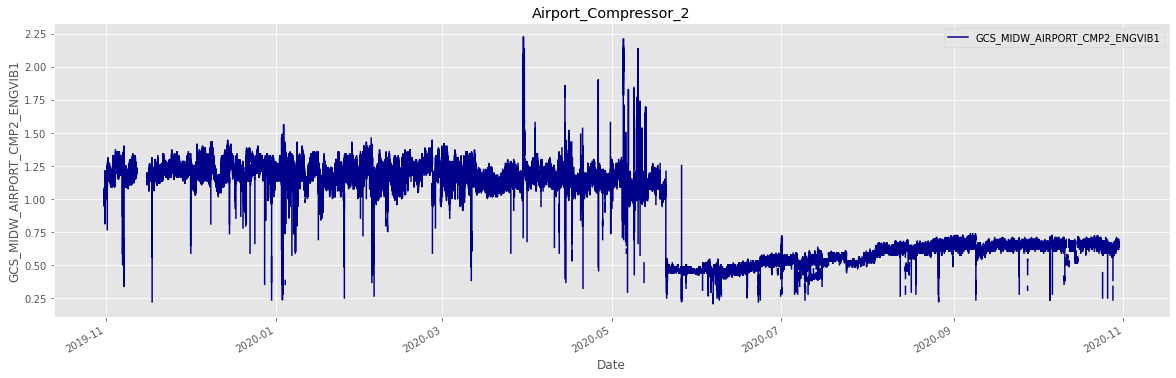

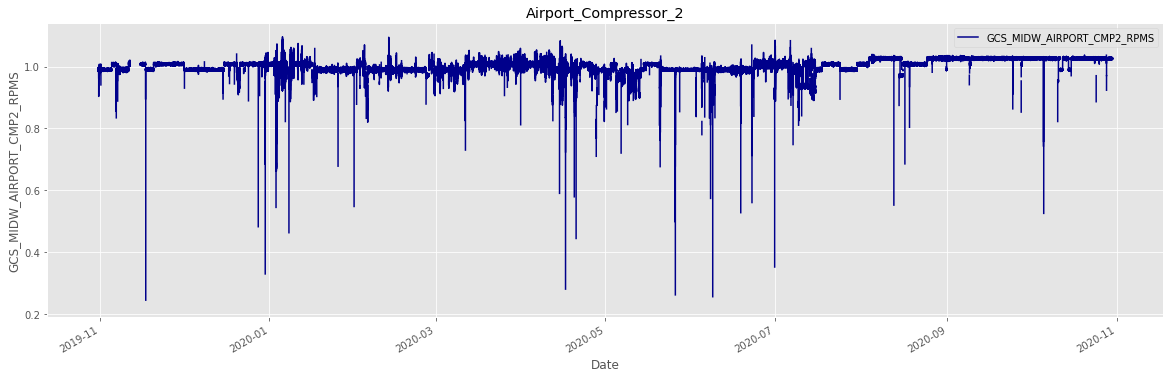

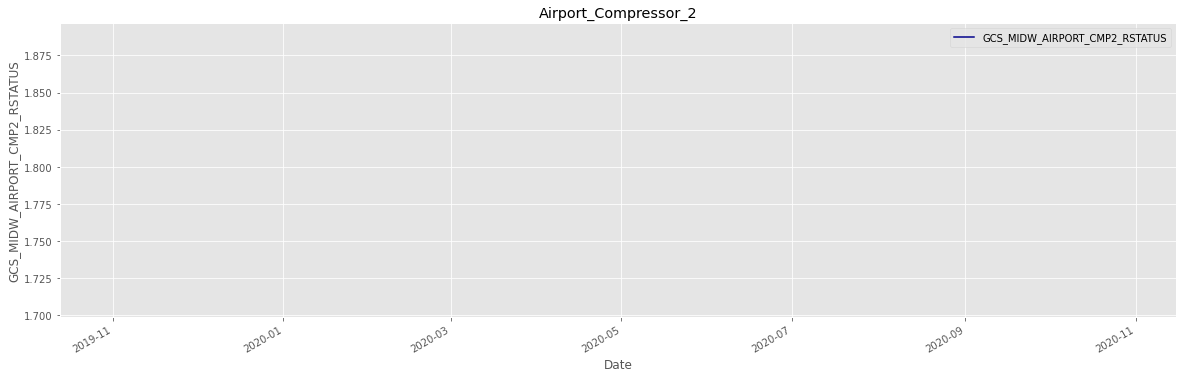

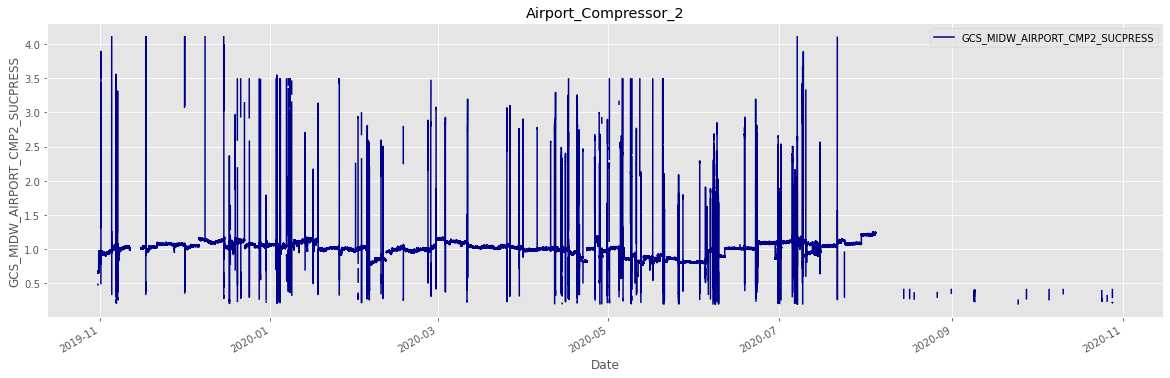

In [29]:
# Create line plots of minute data
n=1
df_min_cols=df_min.columns
while n < df_min.shape[1]:
    df_min.plot(kind='line', x= df_min_cols[0], y=df_min_cols[n], figsize=(20, 6), color='darkblue')
    plt.title(file_name)
    plt.xlabel('Date')
    plt.ylabel(df_min_cols[n])
    #plt.ylim(0, 2)
    plt.show()
    n=n+1

#n=1
#df_min_cols=df_min.columns
#while n < df_min.shape[1]:
#    df_min.plot(kind='scatter', x= df_min_cols[0], y=df_min_cols[n], figsize=(20, 6), color='darkblue')
#    plt.title(file_name)
#    plt.xlabel('Date')
#    plt.ylabel(df_min_cols[n])
#    #plt.ylim(0, 2)
#    plt.show()
#    n=n+1

## Group by hour

In [30]:
# Group by datetime to nearest hour
df_hour = df_min.copy(deep=True)
df_hour['DateTime'] = df_hour['DateTime'].dt.round('H')
df_hour = df_hour.groupby(['DateTime'], as_index=False).mean()
display(df_hour.describe())
display(df_hour)

GCS_MIDW_AIRPORT_CMP2_1STSP  GCS_MIDW_AIRPORT_CMP2_2NDSP  \
count                  7899.000000                  8599.000000   
mean                      1.006160                     1.004033   
std                       0.108405                     0.079260   
min                       0.207005                     0.240862   
25%                       0.941689                     0.967386   
50%                       0.992859                     1.004802   
75%                       1.092142                     1.054682   
max                       1.239477                     1.260745   

       GCS_MIDW_AIRPORT_CMP2_3RDSP  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  \
count                  8570.000000                       8624.000000   
mean                      1.004999                          0.983903   
std                       0.052525                          0.097266   
min                       0.225690                          0.292351   
25%                       0.991005                          0.932683   
50%                       1.014639                          0.950911   
75%                       1.032314                          1.044258   
max                       1.097778                          1.360971   

       GCS_MIDW_AIRPORT_CMP2_CMPOILT  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  \
count                    8649.000000                    8565.000000   
mean                        1.002120                       1.000158   
std                         0.108969                       0.114934   
min                         0.438450                       0.307262   
25%                         0.912916                       0.923764   
50%                         0.961401                       1.015903   
75%                         1.123785                       1.079570   
max                         1.381176                       1.348632   

       GCS_MIDW_AIRPORT_CMP2_COOLERVIB  GCS_MIDW_AIRPORT_CMP2_CYL1T  \
count                      8568.000000                  8651.000000   
mean                          0.952893                     1.058848   
std                           0.345713                     0.305731   
min                           0.268343                     0.325215   
25%                           0.785152                     0.754093   
50%                           0.864661                     1.268128   
75%                           0.981715                     1.339405   
max                           3.852351                     1.449563   

       GCS_MIDW_AIRPORT_CMP2_CYL2T  GCS_MIDW_AIRPORT_CMP2_CYL3T  \
count                  8652.000000                  8653.000000   
mean                      1.002356                     1.004499   
std                       0.085443                     0.091206   
min                       0.203824                     0.215093   
25%                       0.959096                     0.942000   
50%                       1.010496                     1.019054   
75%                       1.052045                     1.072696   
max                       1.200265                     1.174887   

       GCS_MIDW_AIRPORT_CMP2_CYL4T  GCS_MIDW_AIRPORT_CMP2_ENGVIB1  \
count                  8652.000000                    8568.000000   
mean                      1.003860                       0.909748   
std                       0.081953                       0.316300   
min                       0.210925                       0.235865   
25%                       0.963043                       0.614881   
50%                       1.013015                       1.083505   
75%                       1.054212                       1.197343   
max                       1.183117                       2.055712   

       GCS_MIDW_AIRPORT_CMP2_RPMS  GCS_MIDW_AIRPORT_CMP2_RSTATUS  \
count                 8562.000000                   2.720000e+02   
mean                     1.001293                   1.797619e+00   
std                      0.019771           

DateTime  GCS_MIDW_AIRPORT_CMP2_1STSP  \
0    2019-10-31 06:00:00                          NaN   
1    2019-10-31 09:00:00                     0.575015   
2    2019-10-31 10:00:00                     0.667784   
3    2019-10-31 11:00:00                     0.683373   
4    2019-10-31 12:00:00                          NaN   
...                  ...                          ...   
8659 2020-10-30 06:00:00                     1.184105   
8660 2020-10-30 07:00:00                          NaN   
8661 2020-10-30 08:00:00                          NaN   
8662 2020-10-30 09:00:00                     1.185079   
8663 2020-10-30 10:00:00                     1.183253   

      GCS_MIDW_AIRPORT_CMP2_2NDSP  GCS_MIDW_AIRPORT_CMP2_3RDSP  \
0                             NaN                          NaN   
1                             NaN                          NaN   
2                        0.691796                     1.007289   
3                        0.690927                     1.018306   
4                        0.748113                     0.993540   
...                           ...                          ...   
8659                     1.068868                     1.019413   
8660                     1.067429                     1.019588   
8661                     1.068981                     1.018947   
8662                     1.070222                     1.017970   
8663                     1.072705                     1.016109   

      GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  GCS_MIDW_AIRPORT_CMP2_CMPOILT  \
0                                  NaN                            NaN   
1                                  NaN                            NaN   
2                             0.932831                       0.879890   
3                             0.933867                       0.888355   
4                             0.933742                       0.895266   
...                                ...                            ...   
8659                          1.183253                       1.126791   
8660                          1.182227                       1.128272   
8661                          1.185945                       1.123867   
8662                          1.175000                       1.120677   
8663                          1.182868                       1.118551   

      GCS_MIDW_AIRPORT_CMP2_CMPVIB1  GCS_MIDW_AIRPORT_CMP2_COOLERVIB  \
0                               NaN                              NaN   
1                               NaN                              NaN   
2                          0.981871                         1.185182   
3                          1.021800                         1.081504   
4                          1.007945                         0.971402   
...                             ...                              ...   
8659                       0.939034                         0.780183   
8660                       0.974381                         0.810620   
8661                       0.978452                         0.780635   
8662                       1.009444                         0.822919   
8663                       1.019778                         0.849753   

      GCS_MIDW_AIRPORT_CMP2_CYL1T  GCS_MIDW_AIRPORT_CMP2_CYL2T  \
0                             NaN                          NaN   
1                             NaN                          NaN   
2                        0.602319                     1.023642   
3                        0.605068                     1.036851   
4                        0.582463                     1.041331   
...                           ...                          ...   
8659                     1.253763                     0.991290   
8660                     1.249936                     0.987762   
8661                     1.250453                     0.983320   
8662                     1.251186                     0.990842   
8663                     1.254700                     0.999521   

   

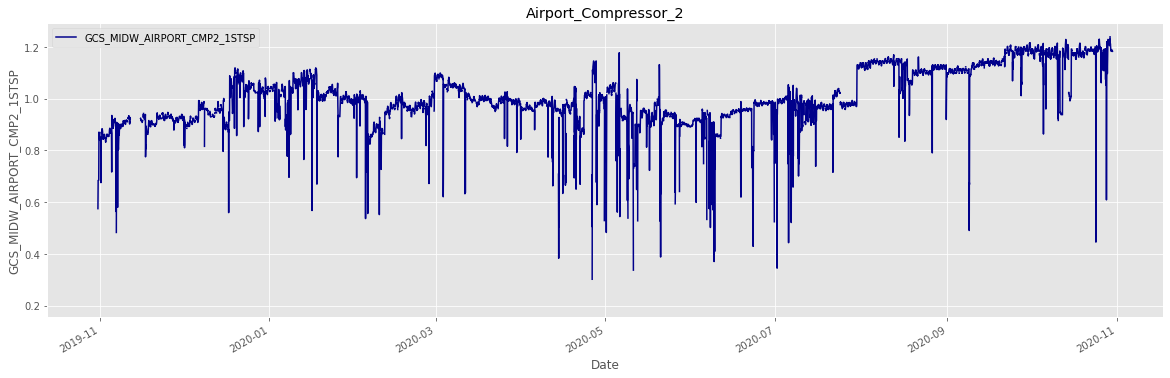

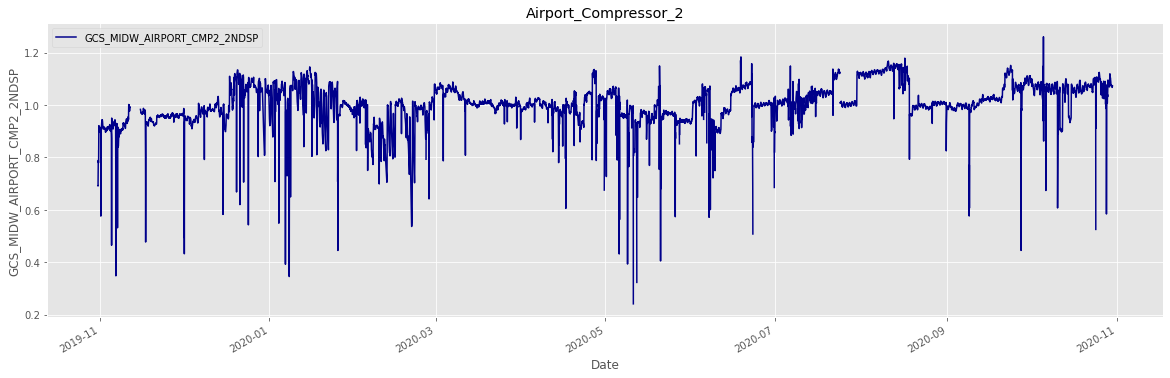

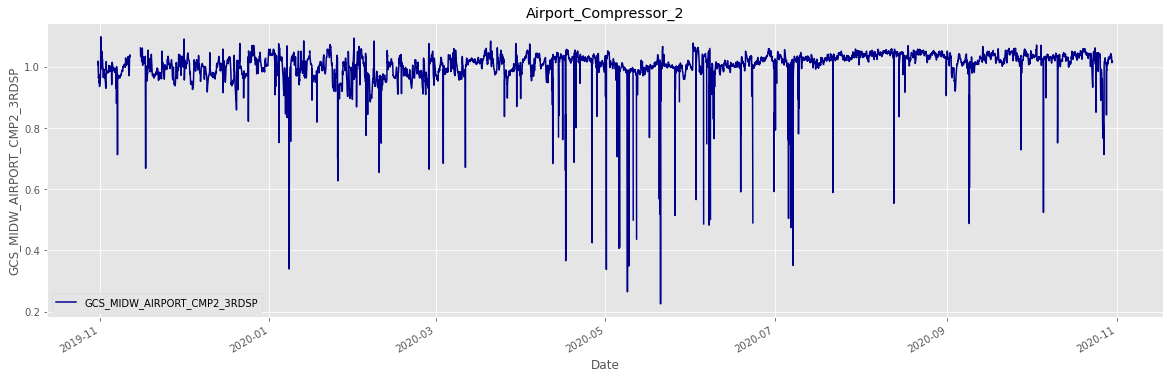

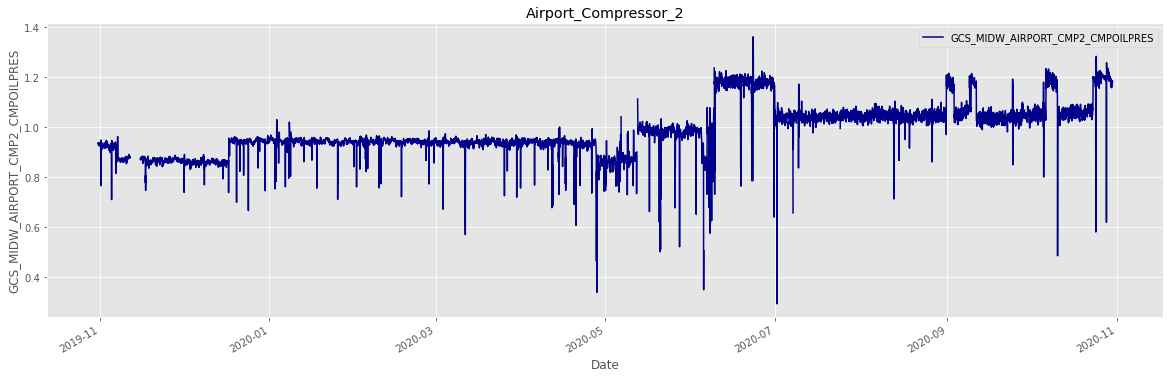

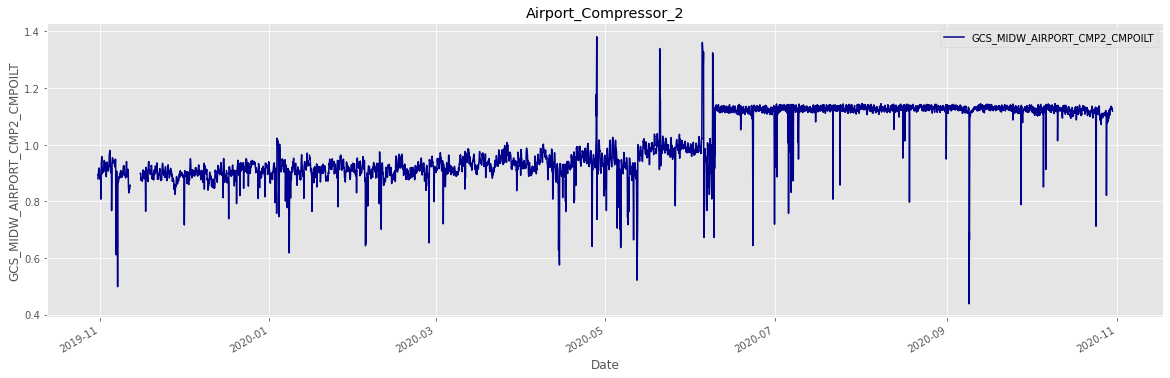

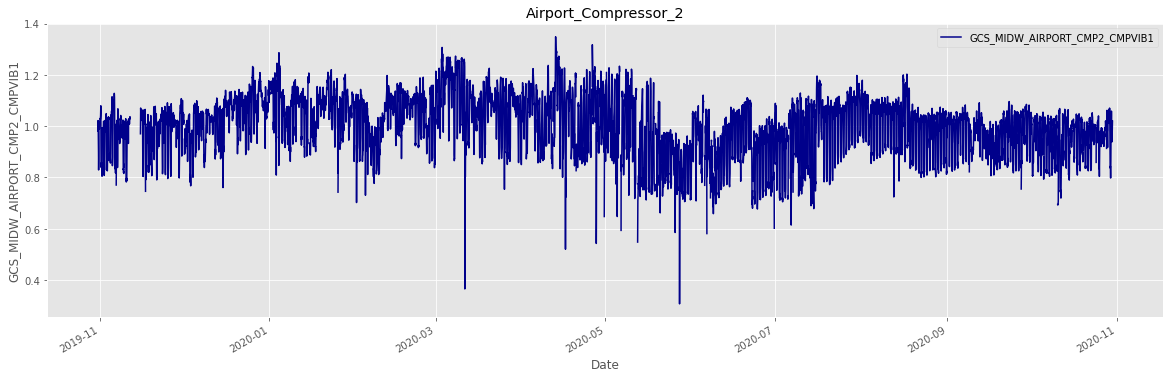

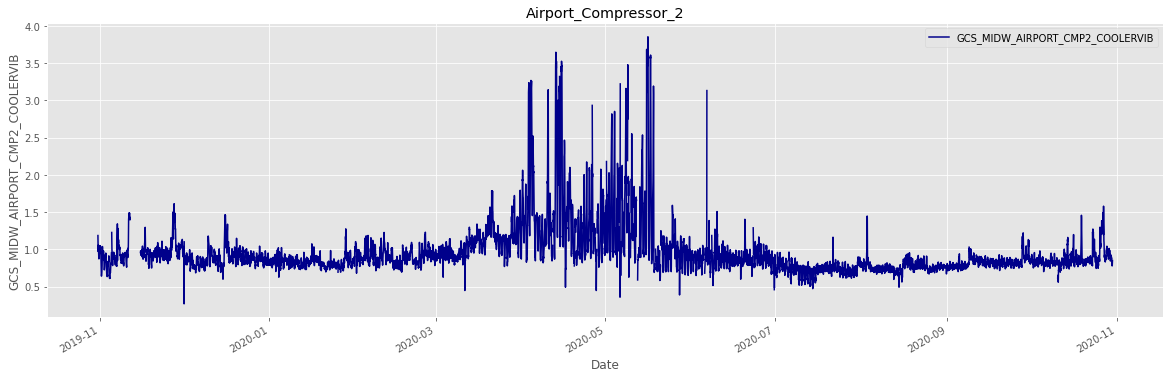

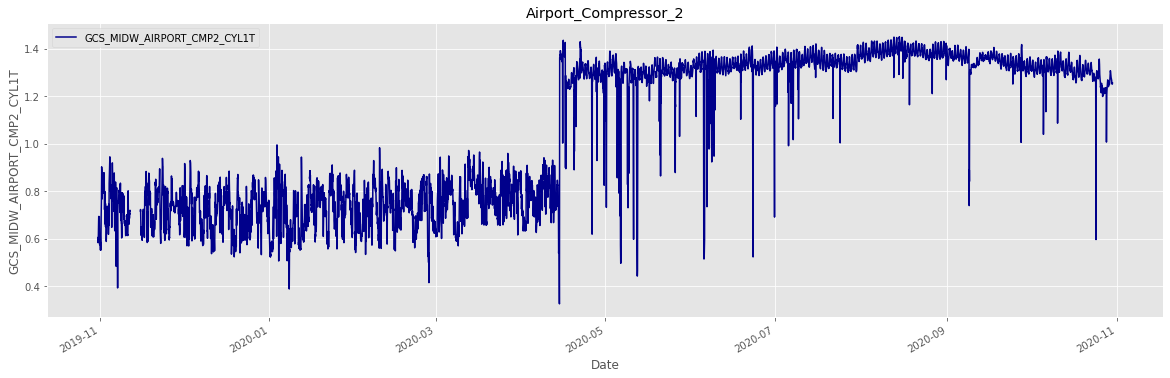

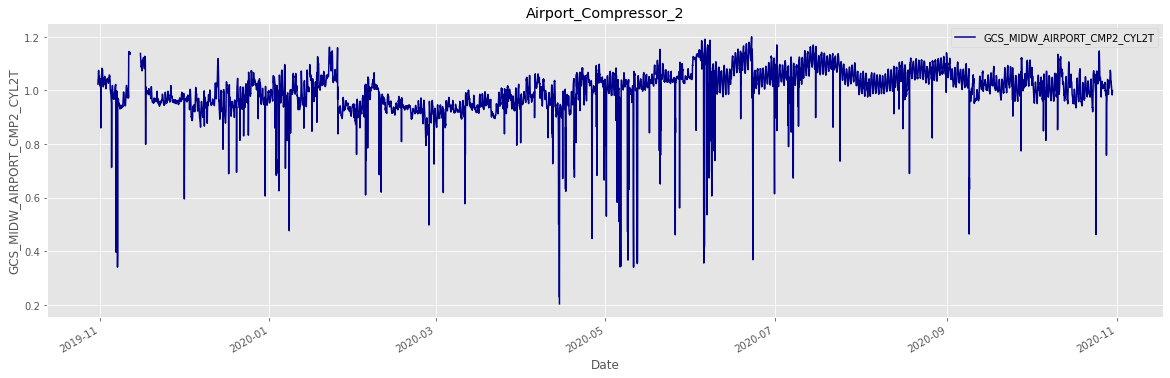

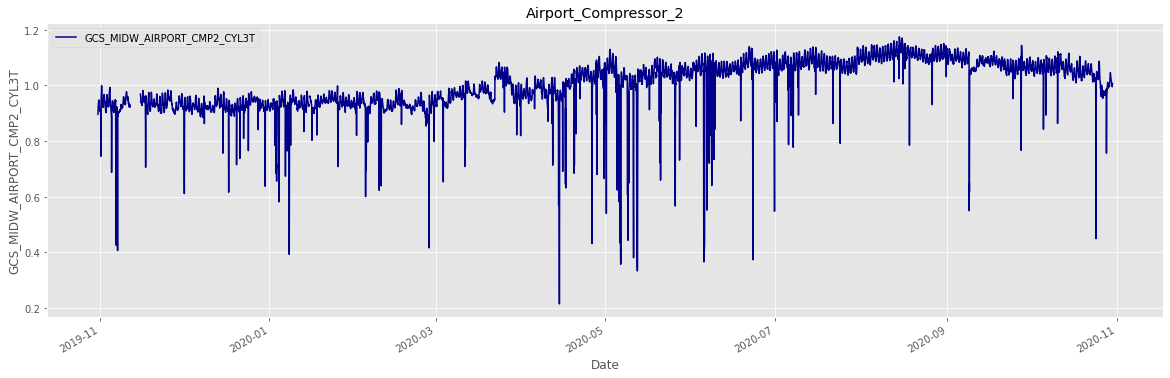

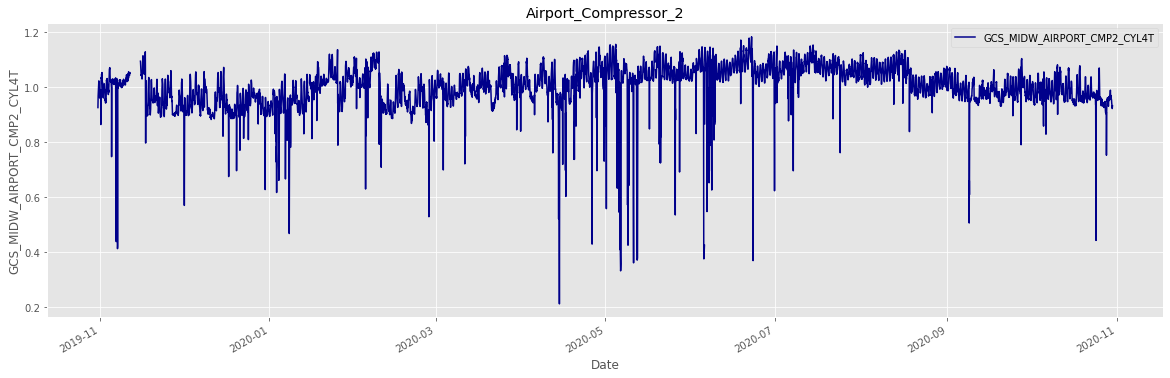

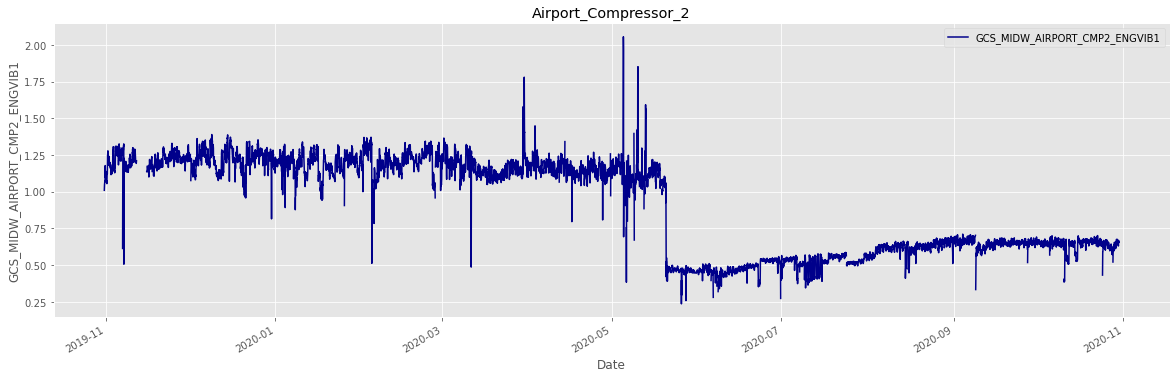

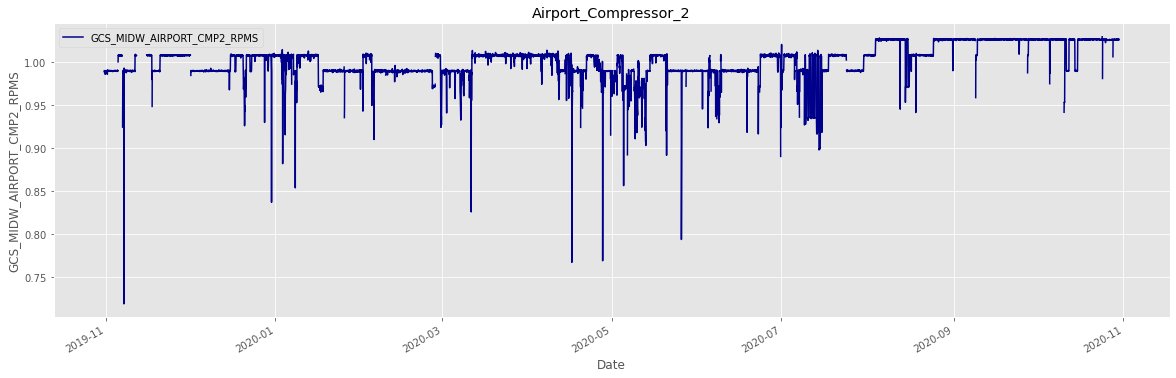

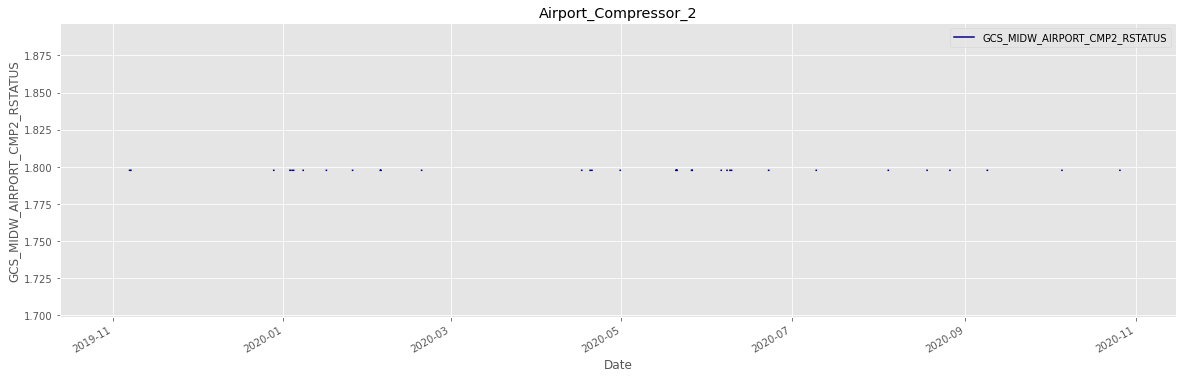

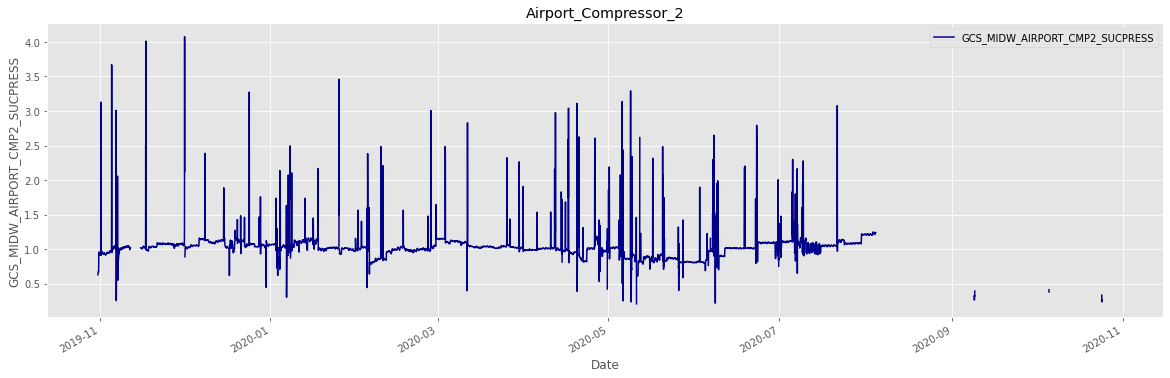

In [31]:
# Create line plots of hourly data
n=1
df_hour_cols=df_hour.columns
while n < df_hour.shape[1]:
    df_hour.plot(kind='line', x= df_hour_cols[0], y=df_hour_cols[n], figsize=(20, 6), color='darkblue')
    plt.title(file_name)
    plt.xlabel('Date')
    plt.ylabel(df_hour_cols[n])
    #plt.ylim(0, 2)
    plt.show()
    n=n+1

#n=1
#df_hour_cols=df_hour.columns
#while n < df_hour.shape[1]:
#    df_hour.plot(kind='scatter', x= df_hour_cols[0], y=df_hour_cols[n], figsize=(20, 6), color='darkblue')
#    plt.title(file_name)
#    plt.xlabel('Date')
#    plt.ylabel(df_hour_cols[n])
#    #plt.ylim(0, 2)
#    plt.show()
#    n=n+1

## Group by day

In [32]:
# Group by datetime to nearest hour
df_day = df_min.copy(deep=True)
df_day['DateTime'] = df_day['DateTime'].dt.round('D')
df_day = df_day.groupby(['DateTime'], as_index=False).mean()
display(df_day.describe())
display(df_day)

GCS_MIDW_AIRPORT_CMP2_1STSP  GCS_MIDW_AIRPORT_CMP2_2NDSP  \
count                   363.000000                   363.000000   
mean                      1.004442                     1.003830   
std                       0.096612                     0.065155   
min                       0.673210                     0.703187   
25%                       0.936680                     0.966711   
50%                       0.983523                     1.002748   
75%                       1.083568                     1.050493   
max                       1.202979                     1.149413   

       GCS_MIDW_AIRPORT_CMP2_3RDSP  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  \
count                   363.000000                        363.000000   
mean                      1.005266                          0.984268   
std                       0.029588                          0.090536   
min                       0.876774                          0.846710   
25%                       0.985799                          0.931508   
50%                       1.009557                          0.945428   
75%                       1.027876                          1.043045   
max                       1.060181                          1.209580   

       GCS_MIDW_AIRPORT_CMP2_CMPOILT  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  \
count                     363.000000                     363.000000   
mean                        1.001169                       1.000038   
std                         0.102860                       0.073609   
min                         0.807389                       0.814877   
25%                         0.909699                       0.956493   
50%                         0.956995                       1.001538   
75%                         1.124044                       1.047898   
max                         1.185639                       1.212252   

       GCS_MIDW_AIRPORT_CMP2_COOLERVIB  GCS_MIDW_AIRPORT_CMP2_CYL1T  \
count                       363.000000                   363.000000   
mean                          0.963996                     1.055009   
std                           0.291702                     0.297174   
min                           0.631569                     0.568860   
25%                           0.812279                     0.749613   
50%                           0.872494                     1.218040   
75%                           0.980848                     1.330976   
max                           2.741039                     1.408103   

       GCS_MIDW_AIRPORT_CMP2_CYL2T  GCS_MIDW_AIRPORT_CMP2_CYL3T  \
count                   363.000000                   363.000000   
mean                      1.001541                     1.003090   
std                       0.061197                     0.072821   
min                       0.784607                     0.798154   
25%                       0.956124                     0.940450   
50%                       1.007643                     1.000679   
75%                       1.044722                     1.066284   
max                       1.147967                     1.137848   

       GCS_MIDW_AIRPORT_CMP2_CYL4T  GCS_MIDW_AIRPORT_CMP2_ENGVIB1  \
count                   363.000000                     363.000000   
mean                      1.003424                       0.912217   
std                       0.056262                       0.313187   
min                       0.807146                       0.422999   
25%                       0.965306                       0.621724   
50%                       1.000209                       1.099285   
75%                       1.051820                       1.201169   
max                       1.133784                       1.328185   

       GCS_MIDW_AIRPORT_CMP2_RPMS  GCS_MIDW_AIRPORT_CMP2_RSTATUS  \
count                  363.000000                   1.440000e+02   
mean                     1.001516                   1.797619e+00   
std                      0.016168           

DateTime  GCS_MIDW_AIRPORT_CMP2_1STSP  GCS_MIDW_AIRPORT_CMP2_2NDSP  \
0   2019-10-31                     0.673210                     0.703187   
1   2019-11-01                     0.822418                     0.853702   
2   2019-11-02                     0.867310                     0.925656   
3   2019-11-03                     0.850601                     0.908206   
4   2019-11-04                     0.859441                     0.911201   
..         ...                          ...                          ...   
359 2020-10-26                     1.189587                     1.095496   
360 2020-10-27                     1.153284                     1.060466   
361 2020-10-28                     1.086565                     1.008567   
362 2020-10-29                     1.202979                     1.071019   
363 2020-10-30                     1.195727                     1.084573   

     GCS_MIDW_AIRPORT_CMP2_3RDSP  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  \
0                       1.010144                          0.933638   
1                       0.975056                          0.926762   
2                       1.012050                          0.924678   
3                       0.970814                          0.925175   
4                       0.985176                          0.925952   
..                           ...                               ...   
359                     0.988018                          1.203067   
360                     0.876774                          1.202649   
361                     0.993992                          1.179548   
362                     1.022128                          1.209580   
363                     1.030458                          1.178821   

     GCS_MIDW_AIRPORT_CMP2_CMPOILT  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  \
0                         0.886213                       1.006421   
1                         0.890982                       0.992568   
2                         0.916484                       0.918638   
3                         0.920192                       0.950453   
4                         0.923920                       0.943085   
..                             ...                            ...   
359                       1.102480                       0.927614   
360                       1.105250                       0.959622   
361                       1.078528                       0.996573   
362                       1.103429                       1.021970   
363                       1.128225                       0.933504   

     GCS_MIDW_AIRPORT_CMP2_COOLERVIB  GCS_MIDW_AIRPORT_CMP2_CYL1T  \
0                           1.080827                     0.598935   
1                           0.966035                     0.621576   
2                           0.846073                     0.802316   
3                           0.842156                     0.726725   
4                           0.754895                     0.686283   
..                               ...                          ...   
359                         1.099134                     1.281794   
360                         1.290016                     1.225037   
361                         0.927199                     1.205272   
362                         0.958316                     1.252573   
363                         0.873370                     1.275550   

     GCS_MIDW_AIRPORT_CMP2_CYL2T  GCS_MIDW_AIRPORT_CMP2_CYL3T  \
0                       1.033795                     0.905242   
1                       1.026671                     0.909963   
2                       1.053187                     0.948264   
3                       1.034884                     0.934822   
4                       1.039813                     0.943628   
..                           ...                          ...   
359                     1.058033                     1.024588   
360                     1.017637                     0.975673   
361      

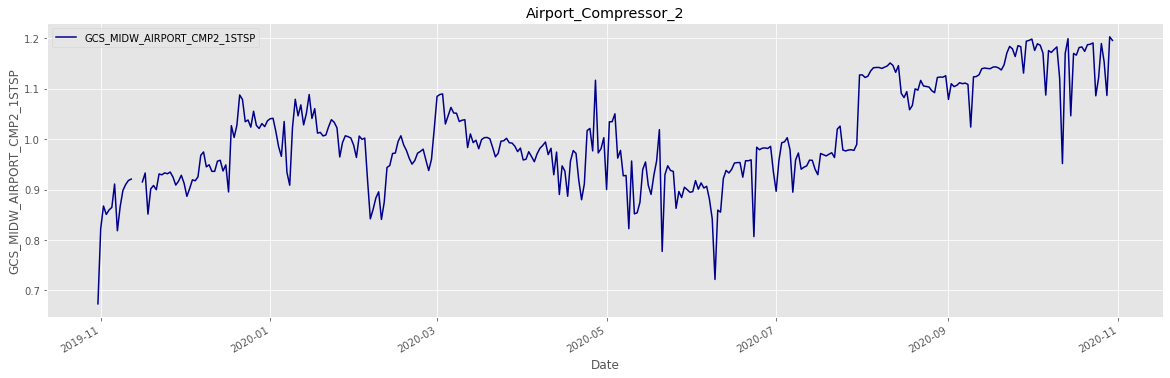

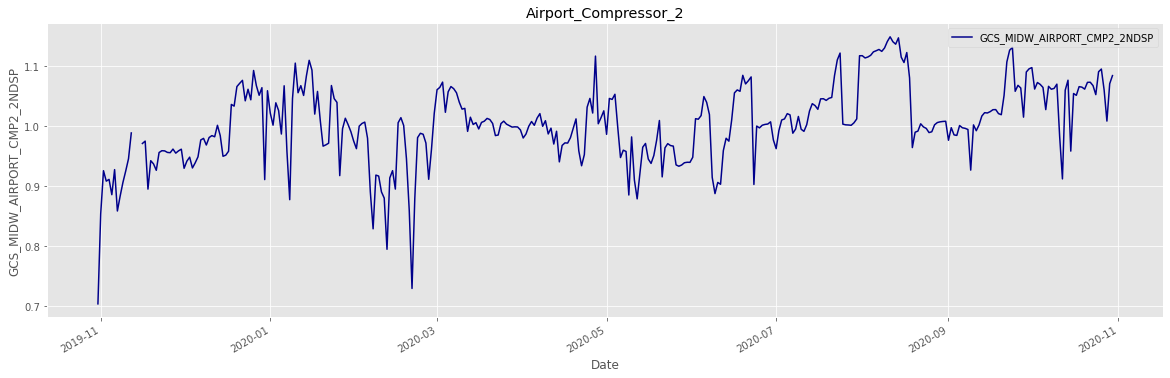

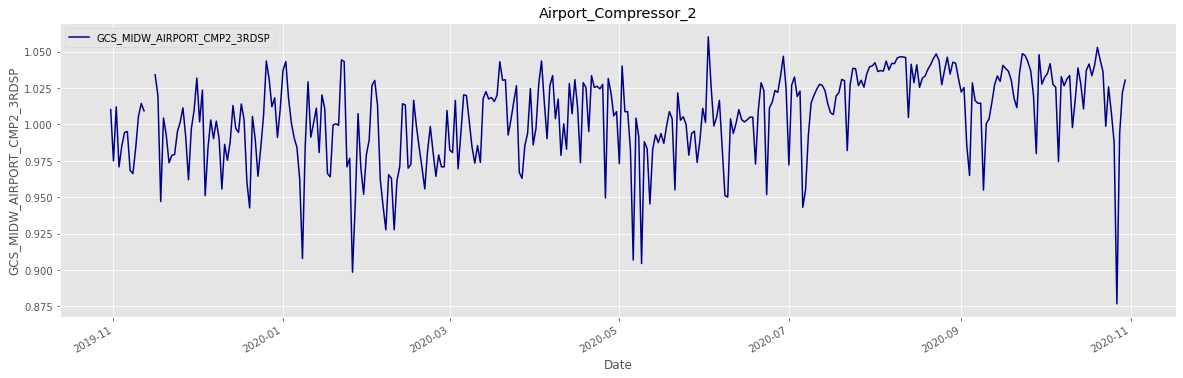

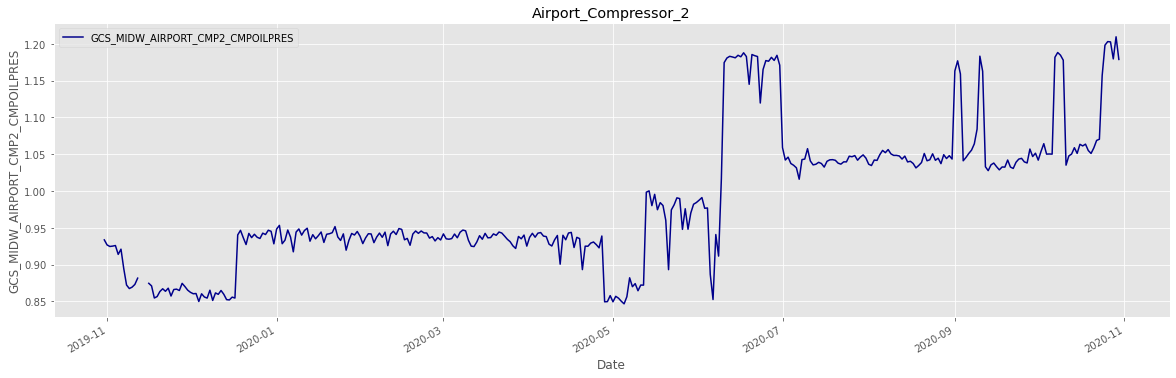

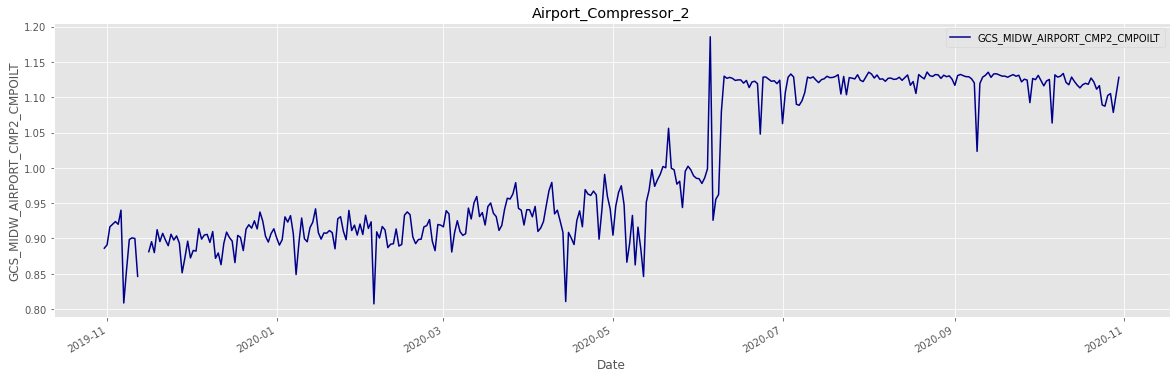

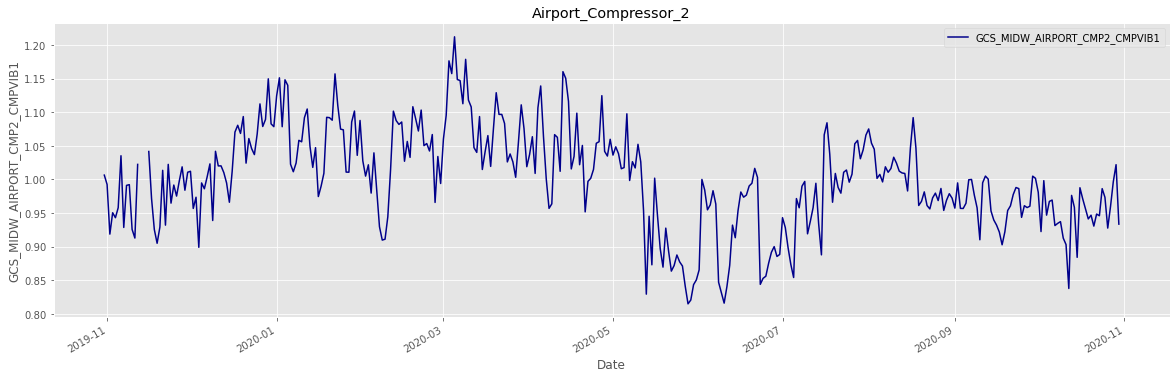

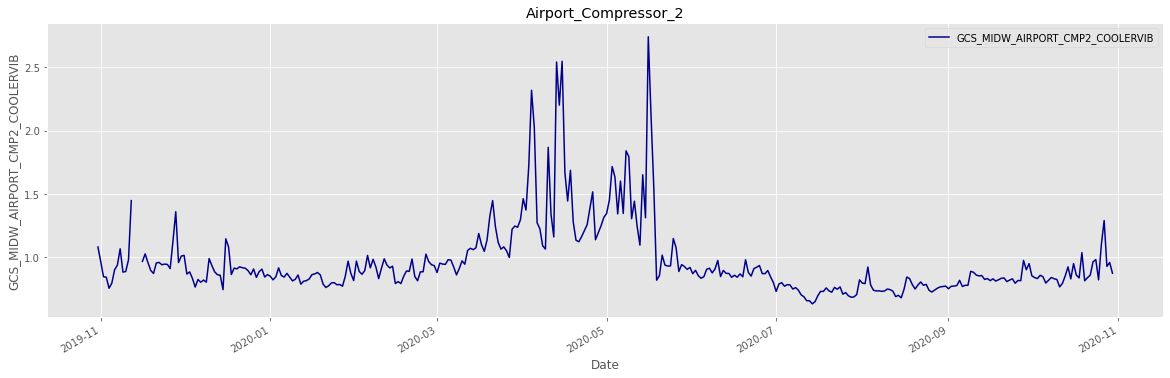

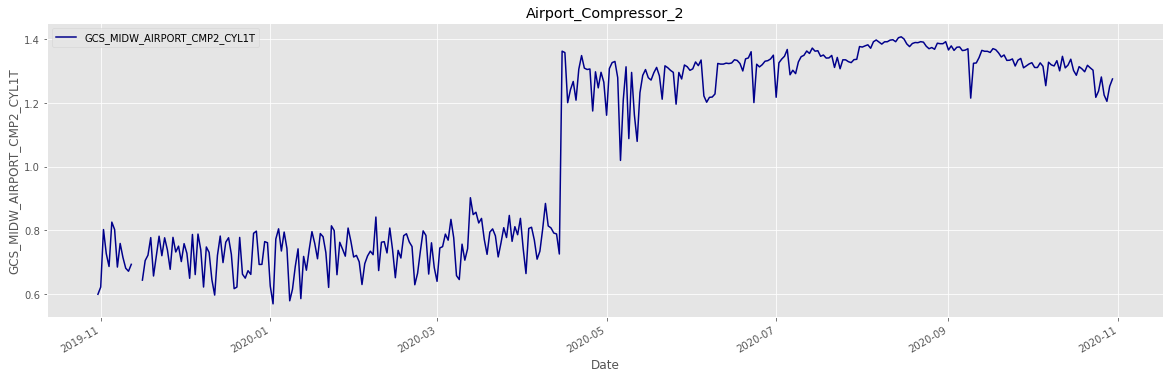

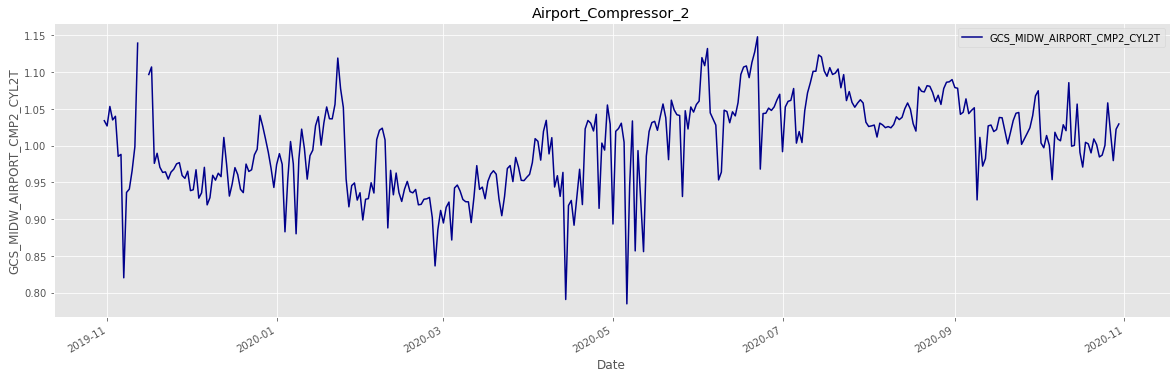

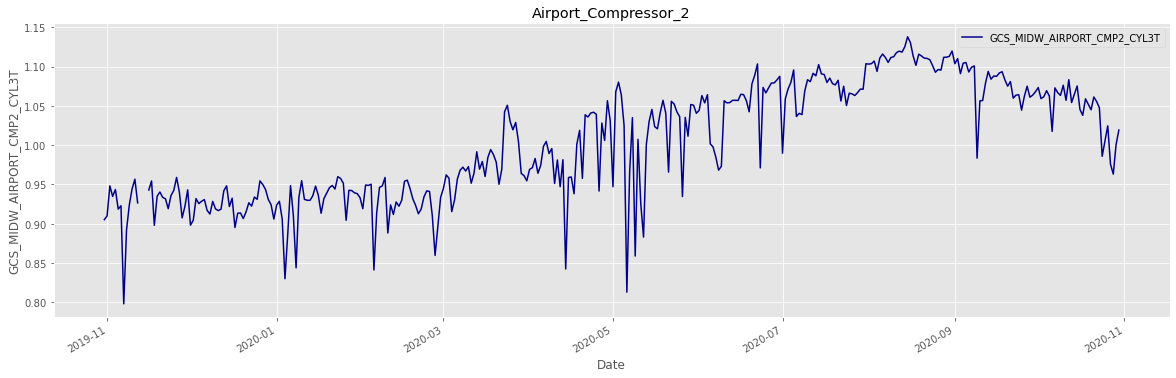

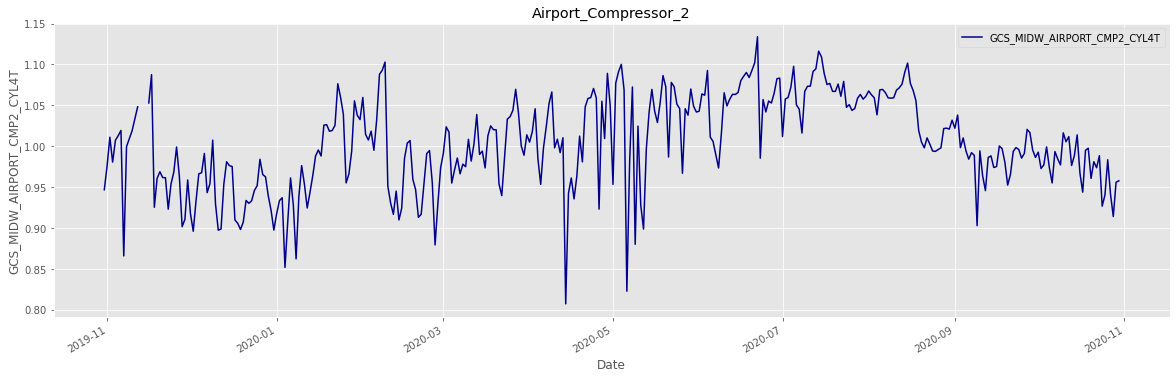

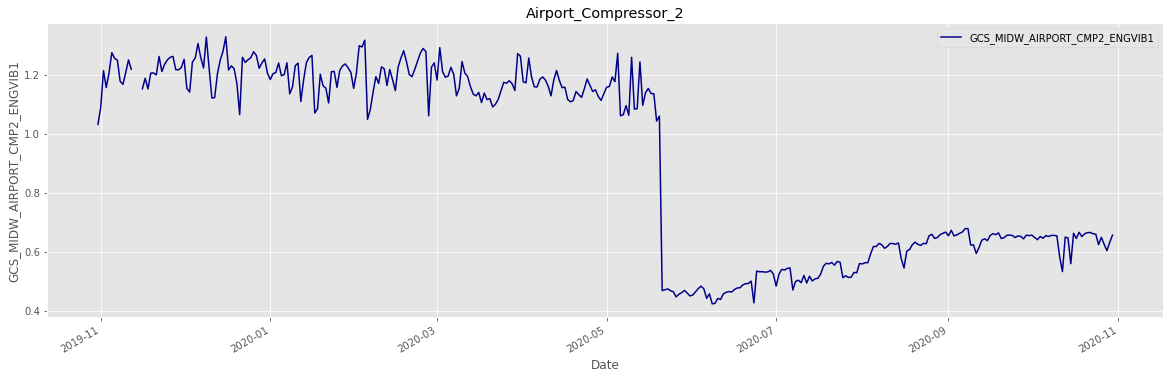

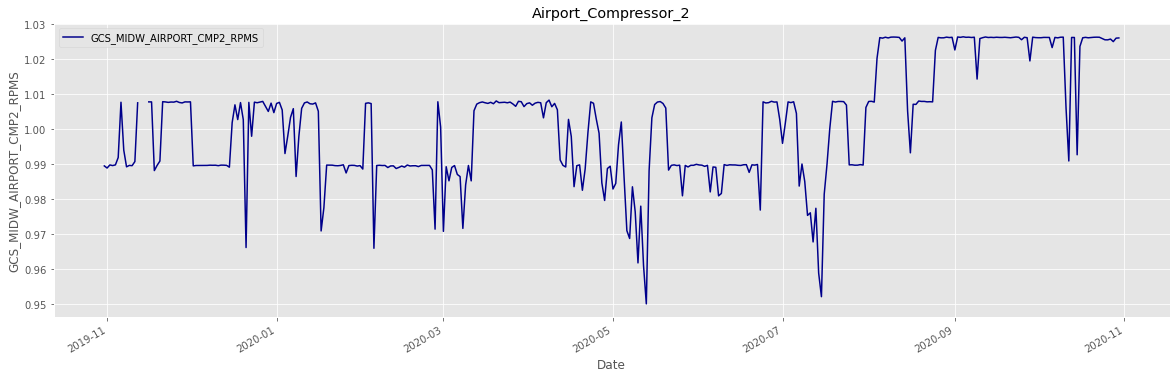

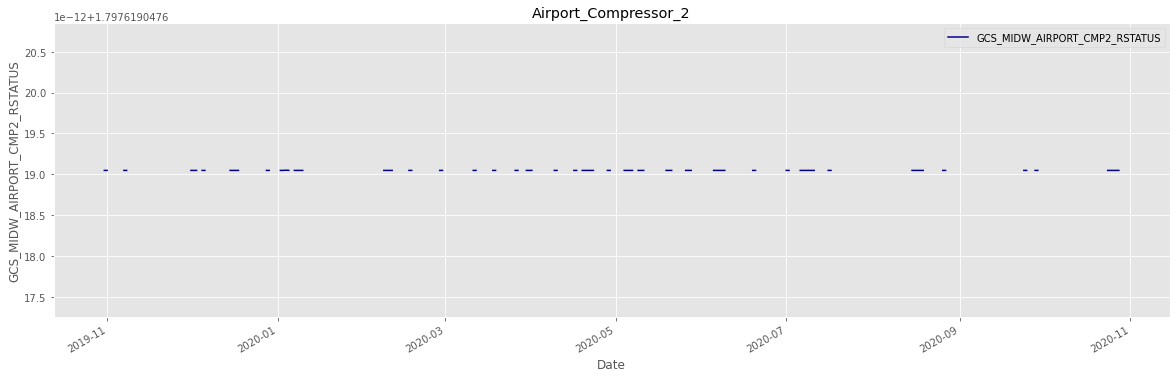

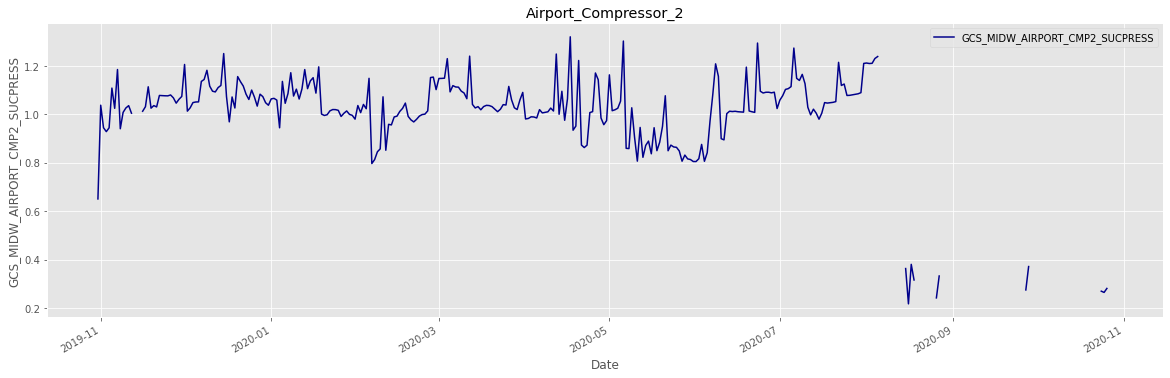

In [33]:
# Create line plots of daily data
n=1
df_day_cols=df_day.columns
while n < df_day.shape[1]:
    df_day.plot(kind='line', x= df_day_cols[0], y=df_day_cols[n], figsize=(20, 6), color='darkblue')
    plt.title(file_name)
    plt.xlabel('Date')
    plt.ylabel(df_day_cols[n])
    #plt.ylim(0, 2)
    plt.show()
    n=n+1

# Create scatter plots    
#n=1
#df_day_cols=df_day.columns
#while n < df_day.shape[1]:
#    df_day.plot(kind='scatter', x= df_day_cols[0], y=df_day_cols[n], figsize=(20, 6), color='darkblue')
#    plt.title(file_name)
#    plt.xlabel('Date')
#    plt.ylabel(df_day_cols[n])
#    #plt.ylim(0, 2)
#    plt.show()
#    n=n+1

## Cluster analysis

In [34]:
# Fill NAN cells with surrounding data
df_day_fill = df_day.fillna(method='ffill')
df_day_fill = df_day_fill.fillna(method='bfill')
display(df_day_fill)
display(df_day_fill.isna().describe())

DateTime  GCS_MIDW_AIRPORT_CMP2_1STSP  GCS_MIDW_AIRPORT_CMP2_2NDSP  \
0   2019-10-31                     0.673210                     0.703187   
1   2019-11-01                     0.822418                     0.853702   
2   2019-11-02                     0.867310                     0.925656   
3   2019-11-03                     0.850601                     0.908206   
4   2019-11-04                     0.859441                     0.911201   
..         ...                          ...                          ...   
359 2020-10-26                     1.189587                     1.095496   
360 2020-10-27                     1.153284                     1.060466   
361 2020-10-28                     1.086565                     1.008567   
362 2020-10-29                     1.202979                     1.071019   
363 2020-10-30                     1.195727                     1.084573   

     GCS_MIDW_AIRPORT_CMP2_3RDSP  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  \
0                       1.010144                          0.933638   
1                       0.975056                          0.926762   
2                       1.012050                          0.924678   
3                       0.970814                          0.925175   
4                       0.985176                          0.925952   
..                           ...                               ...   
359                     0.988018                          1.203067   
360                     0.876774                          1.202649   
361                     0.993992                          1.179548   
362                     1.022128                          1.209580   
363                     1.030458                          1.178821   

     GCS_MIDW_AIRPORT_CMP2_CMPOILT  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  \
0                         0.886213                       1.006421   
1                         0.890982                       0.992568   
2                         0.916484                       0.918638   
3                         0.920192                       0.950453   
4                         0.923920                       0.943085   
..                             ...                            ...   
359                       1.102480                       0.927614   
360                       1.105250                       0.959622   
361                       1.078528                       0.996573   
362                       1.103429                       1.021970   
363                       1.128225                       0.933504   

     GCS_MIDW_AIRPORT_CMP2_COOLERVIB  GCS_MIDW_AIRPORT_CMP2_CYL1T  \
0                           1.080827                     0.598935   
1                           0.966035                     0.621576   
2                           0.846073                     0.802316   
3                           0.842156                     0.726725   
4                           0.754895                     0.686283   
..                               ...                          ...   
359                         1.099134                     1.281794   
360                         1.290016                     1.225037   
361                         0.927199                     1.205272   
362                         0.958316                     1.252573   
363                         0.873370                     1.275550   

     GCS_MIDW_AIRPORT_CMP2_CYL2T  GCS_MIDW_AIRPORT_CMP2_CYL3T  \
0                       1.033795                     0.905242   
1                       1.026671                     0.909963   
2                       1.053187                     0.948264   
3                       1.034884                     0.934822   
4                       1.039813                     0.943628   
..                           ...                          ...   
359                     1.058033                     1.024588   
360                     1.017637                     0.975673   
361      

DateTime GCS_MIDW_AIRPORT_CMP2_1STSP GCS_MIDW_AIRPORT_CMP2_2NDSP  \
count       364                         364                         364   
unique        1                           1                           1   
top       False                       False                       False   
freq        364                         364                         364   

       GCS_MIDW_AIRPORT_CMP2_3RDSP GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  \
count                          364                              364   
unique                           1                                1   
top                          False                            False   
freq                           364                              364   

       GCS_MIDW_AIRPORT_CMP2_CMPOILT GCS_MIDW_AIRPORT_CMP2_CMPVIB1  \
count                            364                           364   
unique                             1                             1   
top                            False                         False   
freq                             364                           364   

       GCS_MIDW_AIRPORT_CMP2_COOLERVIB GCS_MIDW_AIRPORT_CMP2_CYL1T  \
count                              364                         364   
unique                               1                           1   
top                              False                       False   
freq                               364                         364   

       GCS_MIDW_AIRPORT_CMP2_CYL2T GCS_MIDW_AIRPORT_CMP2_CYL3T  \
count                          364                         364   
unique                           1                           1   
top                          False                       False   
freq                           364                         364   

       GCS_MIDW_AIRPORT_CMP2_CYL4T GCS_MIDW_AIRPORT_CMP2_ENGVIB1  \
count                          364                           364   
unique                           1                             1   
top                          False                         False   
freq                           364                           364   

       GCS_MIDW_AIRPORT_CMP2_RPMS GCS_MIDW_AIRPORT_CMP2_RSTATUS  \
count                         364                           364   
unique                          1                             1   
top                         False                         False   
freq                          364                           364   

       GCS_MIDW_AIRPORT_CMP2_SUCPRESS  
count                             364  
unique                              1  
top                             False  
freq                              364

In [35]:
df_day_fill.columns

Index(['DateTime', 'GCS_MIDW_AIRPORT_CMP2_1STSP',
       'GCS_MIDW_AIRPORT_CMP2_2NDSP', 'GCS_MIDW_AIRPORT_CMP2_3RDSP',
       'GCS_MIDW_AIRPORT_CMP2_CMPOILPRES', 'GCS_MIDW_AIRPORT_CMP2_CMPOILT',
       'GCS_MIDW_AIRPORT_CMP2_CMPVIB1', 'GCS_MIDW_AIRPORT_CMP2_COOLERVIB',
       'GCS_MIDW_AIRPORT_CMP2_CYL1T', 'GCS_MIDW_AIRPORT_CMP2_CYL2T',
       'GCS_MIDW_AIRPORT_CMP2_CYL3T', 'GCS_MIDW_AIRPORT_CMP2_CYL4T',
       'GCS_MIDW_AIRPORT_CMP2_ENGVIB1', 'GCS_MIDW_AIRPORT_CMP2_RPMS',
       'GCS_MIDW_AIRPORT_CMP2_RSTATUS', 'GCS_MIDW_AIRPORT_CMP2_SUCPRESS'],
      dtype='object')

In [36]:
# Find k value that gives best separation between clusters

# Create list of columns
day_fill_cols=df_day_fill.columns

# Create new df without datetime column
df_cluster = df_day_fill[day_fill_cols[1:]]

k_values=[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
for k in k_values:
    # set number of clusters
    kclusters = k  # evaluating 3-20
    # run k-means clustering
    kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_cluster)
    # Check cluster labels generated for each row in the dataframe
    # Check distribution of neghborhoods in each cluster
    from collections import Counter
    print(k, Counter(kmeans.labels_))

3 Counter({1: 199, 0: 86, 2: 79})
4 Counter({1: 154, 0: 86, 2: 79, 3: 45})
5 Counter({1: 156, 0: 86, 2: 79, 4: 35, 3: 8})
6 Counter({0: 125, 2: 86, 1: 79, 5: 35, 3: 31, 4: 8})
7 Counter({0: 122, 3: 79, 4: 63, 6: 37, 5: 31, 1: 22, 2: 10})
8 Counter({1: 125, 0: 79, 2: 62, 5: 34, 6: 22, 7: 20, 4: 14, 3: 8})
9 Counter({0: 79, 1: 78, 8: 64, 2: 62, 6: 22, 7: 20, 5: 18, 4: 13, 3: 8})
10 Counter({2: 79, 6: 73, 0: 55, 4: 46, 3: 31, 9: 30, 1: 22, 7: 17, 8: 6, 5: 5})
11 Counter({1: 79, 0: 70, 2: 62, 8: 47, 4: 27, 7: 23, 10: 22, 5: 17, 3: 10, 6: 5, 9: 2})
12 Counter({2: 79, 10: 48, 6: 46, 4: 45, 0: 34, 3: 31, 1: 22, 11: 19, 7: 17, 9: 14, 8: 5, 5: 4})
13 Counter({1: 71, 6: 55, 9: 46, 12: 45, 5: 33, 2: 33, 8: 22, 10: 19, 0: 17, 11: 8, 3: 7, 7: 4, 4: 4})
14 Counter({1: 71, 6: 55, 9: 46, 5: 33, 2: 33, 12: 30, 8: 22, 10: 19, 13: 19, 0: 13, 11: 8, 3: 7, 7: 4, 4: 4})
15 Counter({1: 64, 6: 54, 9: 46, 2: 33, 5: 32, 12: 30, 8: 22, 10: 19, 13: 19, 0: 13, 14: 9, 11: 8, 3: 7, 7: 4, 4: 4})
16 Counter({1: 64, 6:

In [37]:
# Run clustering again with optimal k (trying to minimize the size of the clusters to identify days
# that are most similar to each other)

# set number of clusters
kclusters = 6

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_cluster)

# check cluster labels generated for each row in the dataframe
# Check distribution of neghborhoods in each cluster
from collections import Counter
print(Counter(kmeans.labels_))

Counter({0: 125, 2: 86, 1: 79, 5: 35, 3: 31, 4: 8})


In [38]:
# Add cluster labels to df_day_fill
df_day_fill.insert(1, 'Cluster_Label', kmeans.labels_)

print(df_day_fill.shape)
display(df_day_fill)

(364, 17)


DateTime  Cluster_Label  GCS_MIDW_AIRPORT_CMP2_1STSP  \
0   2019-10-31              5                     0.673210   
1   2019-11-01              0                     0.822418   
2   2019-11-02              0                     0.867310   
3   2019-11-03              0                     0.850601   
4   2019-11-04              0                     0.859441   
..         ...            ...                          ...   
359 2020-10-26              1                     1.189587   
360 2020-10-27              1                     1.153284   
361 2020-10-28              1                     1.086565   
362 2020-10-29              1                     1.202979   
363 2020-10-30              1                     1.195727   

     GCS_MIDW_AIRPORT_CMP2_2NDSP  GCS_MIDW_AIRPORT_CMP2_3RDSP  \
0                       0.703187                     1.010144   
1                       0.853702                     0.975056   
2                       0.925656                     1.012050   
3                       0.908206                     0.970814   
4                       0.911201                     0.985176   
..                           ...                          ...   
359                     1.095496                     0.988018   
360                     1.060466                     0.876774   
361                     1.008567                     0.993992   
362                     1.071019                     1.022128   
363                     1.084573                     1.030458   

     GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  GCS_MIDW_AIRPORT_CMP2_CMPOILT  \
0                            0.933638                       0.886213   
1                            0.926762                       0.890982   
2                            0.924678                       0.916484   
3                            0.925175                       0.920192   
4                            0.925952                       0.923920   
..                                ...                            ...   
359                          1.203067                       1.102480   
360                          1.202649                       1.105250   
361                          1.179548                       1.078528   
362                          1.209580                       1.103429   
363                          1.178821                       1.128225   

     GCS_MIDW_AIRPORT_CMP2_CMPVIB1  GCS_MIDW_AIRPORT_CMP2_COOLERVIB  \
0                         1.006421                         1.080827   
1                         0.992568                         0.966035   
2                         0.918638                         0.846073   
3                         0.950453                         0.842156   
4                         0.943085                         0.754895   
..                             ...                              ...   
359                       0.927614                         1.099134   
360                       0.959622                         1.290016   
361                       0.996573                         0.927199   
362                       1.021970                         0.958316   
363                       0.933504                         0.873370   

     GCS_MIDW_AIRPORT_CMP2_CYL1T  GCS_MIDW_AIRPORT_CMP2_CYL2T  \
0                       0.598935                     1.033795   
1                       0.621576                     1.026671   
2                       0.802316                     1.053187   
3                       0.726725                     1.034884   
4                       0.686283                     1.039813   
..                           ...                          ...   
359                     1.281794                     1.058033   
360                     1.225037                     1.017637   
361                     1.205272                     0.979495   
362                     1.252573                     1.022170   
363                     1.275550               

In [39]:
# Print clusters and separate dataframes
for label in range(kclusters-1):
    name = 'Cluster_'+str(label)
    name = df_day_fill.loc[df_day_fill['Cluster_Label'] == label]
    print('Cluster_'+str(label))
    display(name)

Cluster_0


DateTime  Cluster_Label  GCS_MIDW_AIRPORT_CMP2_1STSP  \
1   2019-11-01              0                     0.822418   
2   2019-11-02              0                     0.867310   
3   2019-11-03              0                     0.850601   
4   2019-11-04              0                     0.859441   
5   2019-11-05              0                     0.864535   
..         ...            ...                          ...   
128 2020-03-09              0                     1.034884   
129 2020-03-10              0                     1.037453   
130 2020-03-11              0                     1.038535   
131 2020-03-12              0                     0.983237   
146 2020-03-27              0                     0.992822   

     GCS_MIDW_AIRPORT_CMP2_2NDSP  GCS_MIDW_AIRPORT_CMP2_3RDSP  \
1                       0.853702                     0.975056   
2                       0.925656                     1.012050   
3                       0.908206                     0.970814   
4                       0.911201                     0.985176   
5                       0.885596                     0.994482   
..                           ...                          ...   
128                     1.040203                     0.984483   
129                     1.028541                     0.973349   
130                     1.029844                     0.985457   
131                     0.991390                     0.973900   
146                     1.000965                     0.963013   

     GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  GCS_MIDW_AIRPORT_CMP2_CMPOILT  \
1                            0.926762                       0.890982   
2                            0.924678                       0.916484   
3                            0.925175                       0.920192   
4                            0.925952                       0.923920   
5                            0.913918                       0.920046   
..                                ...                            ...   
128                          0.945907                       0.906775   
129                          0.933117                       0.943031   
130                          0.925104                       0.927610   
131                          0.924531                       0.950349   
146                          0.921960                       0.979064   

     GCS_MIDW_AIRPORT_CMP2_CMPVIB1  GCS_MIDW_AIRPORT_CMP2_COOLERVIB  \
1                         0.992568                         0.966035   
2                         0.918638                         0.846073   
3                         0.950453                         0.842156   
4                         0.943085                         0.754895   
5                         0.957951                         0.795234   
..                             ...                              ...   
128                       1.178707                         0.910416   
129                       1.118140                         0.971164   
130                       1.107863                         0.944499   
131                       1.047324                         1.053854   
146                       1.003207                         0.997885   

     GCS_MIDW_AIRPORT_CMP2_CYL1T  GCS_MIDW_AIRPORT_CMP2_CYL2T  \
1                       0.621576                     1.026671   
2                       0.802316                     1.053187   
3                       0.726725                     1.034884   
4                       0.686283                     1.039813   
5                       0.825713                     0.985301   
..                           ...                          ...   
128                     0.645225                     0.923602   
129                     0.756420                     0.923404   
130                     0.706112                     0.895166   
131                     0.742435                     0.930055   
146                     0.846707               

Cluster_1


DateTime  Cluster_Label  GCS_MIDW_AIRPORT_CMP2_1STSP  \
285 2020-08-13              1                     1.132490   
286 2020-08-14              1                     1.145777   
287 2020-08-15              1                     1.091027   
288 2020-08-16              1                     1.082418   
289 2020-08-17              1                     1.094132   
..         ...            ...                          ...   
359 2020-10-26              1                     1.189587   
360 2020-10-27              1                     1.153284   
361 2020-10-28              1                     1.086565   
362 2020-10-29              1                     1.202979   
363 2020-10-30              1                     1.195727   

     GCS_MIDW_AIRPORT_CMP2_2NDSP  GCS_MIDW_AIRPORT_CMP2_3RDSP  \
285                     1.137060                     1.004761   
286                     1.147644                     1.041322   
287                     1.115359                     1.028691   
288                     1.106410                     1.040934   
289                     1.123094                     1.025503   
..                           ...                          ...   
359                     1.095496                     0.988018   
360                     1.060466                     0.876774   
361                     1.008567                     0.993992   
362                     1.071019                     1.022128   
363                     1.084573                     1.030458   

     GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  GCS_MIDW_AIRPORT_CMP2_CMPOILT  \
285                          1.043459                       1.123976   
286                          1.047450                       1.127790   
287                          1.039542                       1.131603   
288                          1.040452                       1.116998   
289                          1.037448                       1.122259   
..                                ...                            ...   
359                          1.203067                       1.102480   
360                          1.202649                       1.105250   
361                          1.179548                       1.078528   
362                          1.209580                       1.103429   
363                          1.178821                       1.128225   

     GCS_MIDW_AIRPORT_CMP2_CMPVIB1  GCS_MIDW_AIRPORT_CMP2_COOLERVIB  \
285                       1.009665                         0.689147   
286                       1.008876                         0.698764   
287                       0.982866                         0.679498   
288                       1.046487                         0.745510   
289                       1.091973                         0.843205   
..                             ...                              ...   
359                       0.927614                         1.099134   
360                       0.959622                         1.290016   
361                       0.996573                         0.927199   
362                       1.021970                         0.958316   
363                       0.933504                         0.873370   

     GCS_MIDW_AIRPORT_CMP2_CYL1T  GCS_MIDW_AIRPORT_CMP2_CYL2T  \
285                     1.392648                     1.038356   
286                     1.405176                     1.050136   
287                     1.408103                     1.057926   
288                     1.401257                     1.049586   
289                     1.385688                     1.029741   
..                           ...                          ...   
359                     1.281794                     1.058033   
360                     1.225037                     1.017637   
361                     1.205272                     0.979495   
362                     1.252573                     1.022170   
363                     1.275550               

Cluster_2


DateTime  Cluster_Label  GCS_MIDW_AIRPORT_CMP2_1STSP  \
199 2020-05-19              2                     0.956886   
200 2020-05-20              2                     1.018809   
201 2020-05-21              2                     0.777214   
202 2020-05-22              2                     0.929639   
203 2020-05-23              2                     0.947124   
..         ...            ...                          ...   
280 2020-08-08              2                     1.140237   
281 2020-08-09              2                     1.142850   
282 2020-08-10              2                     1.145251   
283 2020-08-11              2                     1.151082   
284 2020-08-12              2                     1.146324   

     GCS_MIDW_AIRPORT_CMP2_2NDSP  GCS_MIDW_AIRPORT_CMP2_3RDSP  \
199                     0.976511                     1.008800   
200                     1.009543                     1.003851   
201                     0.915319                     0.955099   
202                     0.963859                     1.021628   
203                     0.970882                     1.002872   
..                           ...                          ...   
280                     1.125062                     1.041766   
281                     1.130729                     1.045683   
282                     1.141528                     1.046452   
283                     1.149413                     1.046363   
284                     1.141197                     1.045979   

     GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  GCS_MIDW_AIRPORT_CMP2_CMPOILT  \
199                          0.980285                       1.001988   
200                          0.960228                       1.000065   
201                          0.893163                       1.056054   
202                          0.974355                       0.999395   
203                          0.981282                       0.997261   
..                                ...                            ...   
280                          1.056334                       1.126829   
281                          1.050524                       1.127165   
282                          1.048409                       1.125322   
283                          1.048438                       1.125730   
284                          1.047640                       1.128349   

     GCS_MIDW_AIRPORT_CMP2_CMPVIB1  GCS_MIDW_AIRPORT_CMP2_COOLERVIB  \
199                       0.869533                         0.818299   
200                       0.927533                         0.853886   
201                       0.893659                         1.016271   
202                       0.863594                         0.937919   
203                       0.871887                         0.930119   
..                             ...                              ...   
280                       1.010660                         0.730085   
281                       1.016255                         0.733210   
282                       1.033034                         0.748442   
283                       1.024240                         0.744170   
284                       1.012320                         0.731504   

     GCS_MIDW_AIRPORT_CMP2_CYL1T  GCS_MIDW_AIRPORT_CMP2_CYL2T  \
199                     1.311925                     1.056542   
200                     1.285378                     1.037738   
201                     1.211958                     0.980784   
202                     1.316956                     1.061773   
203                     1.310972                     1.048610   
..                           ...                          ...   
280                     1.385110                     1.025783   
281                     1.392304                     1.024146   
282                     1.392590                     1.028633   
283                     1.397631                     1.039109   
284                     1.398891               

Cluster_3


DateTime  Cluster_Label  GCS_MIDW_AIRPORT_CMP2_1STSP  \
166 2020-04-16              3                     0.936572   
167 2020-04-17              3                     0.886553   
168 2020-04-18              3                     0.956387   
169 2020-04-19              3                     0.977273   
170 2020-04-20              3                     0.971620   
171 2020-04-21              3                     0.918074   
172 2020-04-22              3                     0.879734   
173 2020-04-23              3                     0.911399   
174 2020-04-24              3                     1.016941   
175 2020-04-25              3                     1.021134   
176 2020-04-26              3                     0.976604   
177 2020-04-27              3                     1.116783   
178 2020-04-28              3                     0.972588   
179 2020-04-29              3                     0.981043   
180 2020-04-30              3                     1.002836   
181 2020-05-01              3                     0.899991   
182 2020-05-02              3                     1.034363   
183 2020-05-03              3                     1.034587   
184 2020-05-04              3                     1.050214   
185 2020-05-05              3                     0.962239   
186 2020-05-06              3                     0.977594   
187 2020-05-07              3                     0.927259   
188 2020-05-08              3                     0.927863   
189 2020-05-09              3                     0.822335   
190 2020-05-10              3                     0.956580   
191 2020-05-11              3                     0.851754   
192 2020-05-12              3                     0.853819   
193 2020-05-13              3                     0.874617   
194 2020-05-14              3                     0.939709   
195 2020-05-15              3                     0.954664   
198 2020-05-18              3                     0.928107   

     GCS_MIDW_AIRPORT_CMP2_2NDSP  GCS_MIDW_AIRPORT_CMP2_3RDSP  \
166                     0.972109                     1.011222   
167                     0.971847                     0.973649   
168                     0.980871                     1.028689   
169                     0.996828                     1.025252   
170                     1.012237                     0.995083   
171                     0.958856                     1.033498   
172                     0.933925                     1.025376   
173                     0.952650                     1.026208   
174                     1.031814                     1.024423   
175                     1.046445                     1.027510   
176                     1.022004                     0.949514   
177                     1.117147                     1.031620   
178                     1.004094                     1.021712   
179                     1.014277                     1.005857   
180                     1.025695                     1.008839   
181                     0.986429                     0.973000   
182                     1.046392                     1.040143   
183                     1.044772                     1.008722   
184                     1.053372                     1.008771   
185                     0.998895                     0.982441   
186                     0.947642                     0.906889   
187                     0.959913                     1.004310   
188                     0.957865                     0.991292   
189                     0.885052                     0.904473   
190                     0.982109                     0.988134   
191                     0.910125                     0.983322   
192                     0.878602                     0.945430   
193                     0.922492                     0.982797   
194                     0.964863                     0.992888   
195                     0.971179                     0.987481   
198   

Cluster_4


DateTime  Cluster_Label  GCS_MIDW_AIRPORT_CMP2_1STSP  \
154 2020-04-04              4                     0.965335   
155 2020-04-05              4                     0.955199   
160 2020-04-10              4                     0.969223   
163 2020-04-13              4                     0.974290   
164 2020-04-14              4                     0.890143   
165 2020-04-15              4                     0.946959   
196 2020-05-16              4                     0.908397   
197 2020-05-17              4                     0.890270   

     GCS_MIDW_AIRPORT_CMP2_2NDSP  GCS_MIDW_AIRPORT_CMP2_3RDSP  \
154                     1.007833                     1.015234   
155                     1.001480                     0.990220   
160                     0.987058                     0.978815   
163                     0.991576                     1.028116   
164                     0.940415                     1.007370   
165                     0.967869                     1.030729   
196                     0.945102                     0.993695   
197                     0.937849                     0.987047   

     GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  GCS_MIDW_AIRPORT_CMP2_CMPOILT  \
154                          0.942773                       0.909919   
155                          0.943561                       0.914780   
160                          0.933690                       0.934739   
163                          0.939909                       0.908626   
164                          0.933801                       0.810608   
165                          0.942952                       0.908629   
196                          0.995523                       0.973834   
197                          0.974617                       0.983138   

     GCS_MIDW_AIRPORT_CMP2_CMPVIB1  GCS_MIDW_AIRPORT_CMP2_COOLERVIB  \
154                       1.106526                         2.318574   
155                       1.139067                         2.020919   
160                       1.066644                         1.867903   
163                       1.160363                         2.541660   
164                       1.150516                         2.201489   
165                       1.116117                         2.547386   
196                       1.001899                         2.741039   
197                       0.947187                         2.113850   

     GCS_MIDW_AIRPORT_CMP2_CYL1T  GCS_MIDW_AIRPORT_CMP2_CYL2T  \
154                     0.809587                     1.005739   
155                     0.769439                     0.980147   
160                     0.813733                     0.943596   
163                     0.788501                     0.963467   
164                     0.725485                     0.790525   
165                     1.362996                     0.918416   
196                     1.279620                     1.032935   
197                     1.272093                     1.020720   

     GCS_MIDW_AIRPORT_CMP2_CYL3T  GCS_MIDW_AIRPORT_CMP2_CYL4T  \
154                     0.964268                     0.984762   
155                     0.974222                     0.953289   
160                     0.951256                     0.997901   
163                     0.981470                     1.010268   
164                     0.842529                     0.807146   
165                     0.958862                     0.942578   
196                     1.023623                     1.042833   
197                     1.020812                     1.028928   

     GCS_MIDW_AIRPORT_CMP2_ENGVIB1  GCS_MIDW_AIRPORT_CMP2_RPMS  \
154                       1.192193                    1.007738   
155                       1.158653                    1.007618   
160                       1.160699                    1.007433   
163                       1.213885                    0.989752   
164                       1.180376                    0.989277   
165 

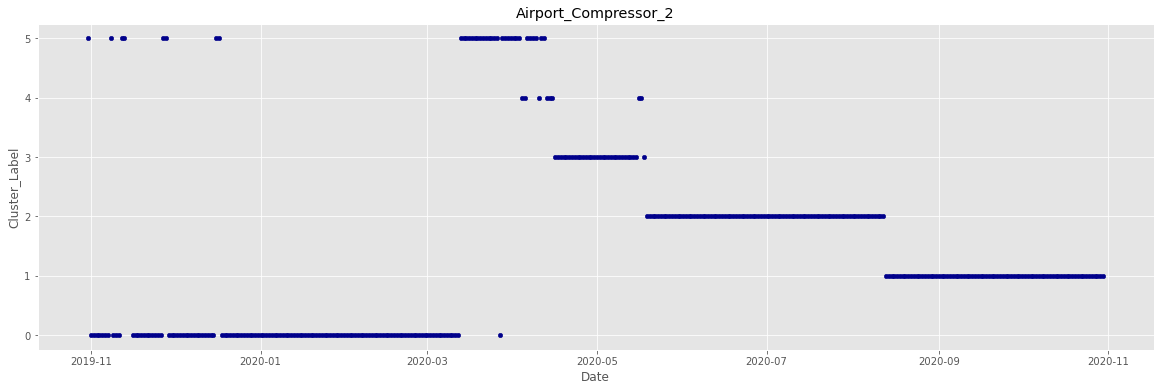

In [40]:
# Plot cluster labels grouped by day
df_day_fill.plot(kind='scatter', x='DateTime', y='Cluster_Label', figsize=(20, 6), color='darkblue')
plt.title(file_name)
plt.xlabel('Date')
plt.ylabel('Cluster_Label')
plt.show()

## UPLOAD EVENT LOGS

In [41]:
# Read file and create dataframe
df_event = pd.read_excel(path2) #,index_col='Date Created')
print('Data read into a dataframe.')
display(df_event.dtypes)

Data read into a dataframe.


Month                                                object
Key ID                                                int64
Region                                               object
Station                                              object
Unit                                                  int64
Down Unavailable Time                        datetime64[ns]
Down Available Time                          datetime64[ns]
Restart Time                                 datetime64[ns]
Main Component                                       object
Sub Component                                        object
Startups                                              int64
Blowdowns                                             int64
Status                                               object
Date Created                                 datetime64[ns]
Created By                                           object
Last Modified By                                     object
Field Ops Rep                           

In [42]:
# Keep only events from Airport 2
df_event2 = df_event.loc[df_event['Unit']==2]

# Round date to day
df_event2['DateTime'] = df_event2['Date Created'].dt.round('D')
display(df_event2)

Month  Key ID Region  Station  Unit Down Unavailable Time  \
0    January   67923   PERM  Airport     2   2020-01-31 13:17:40   
1    January   66320   PERM  Airport     2   1900-01-01 00:00:00   
2    January   66315   PERM  Airport     2   2020-01-25 16:37:30   
3    January   65469   PERM  Airport     2   2020-01-18 03:29:36   
4    January   65279   PERM  Airport     2   2020-01-16 09:33:10   
..       ...     ...    ...      ...   ...                   ...   
202  October   95424   PERM  Airport     2   2020-10-24 12:57:02   
203  October   94172   PERM  Airport     2   2020-10-10 15:29:59   
204  October   93811   PERM  Airport     2   2020-10-06 10:39:00   
205  October   93764   PERM  Airport     2   2020-10-05 15:48:39   
206  October   93743   PERM  Airport     2   2020-10-05 12:45:14   

    Down Available Time        Restart Time   Main Component  \
0   1900-01-01 00:00:00 2020-01-31 13:31:55       Compressor   
1   2020-01-25 17:23:42 2020-01-25 20:00:25  Manual Shutdown   
2   1900-01-01 00:00:00 2020-01-25 16:50:11       Compressor   
3   1900-01-01 00:00:00 2020-01-18 04:15:04           Engine   
4   1900-01-01 00:00:00 2020-01-16 10:08:07       Compressor   
..                  ...                 ...              ...   
202 1900-01-01 00:00:00 2020-10-24 13:30:41       Compressor   
203 1900-01-01 00:00:00 2020-10-10 18:25:35           Engine   
204 1900-01-01 00:00:00 2020-10-06 12:05:20       Compressor   
205 1900-01-01 00:00:00 2020-10-05 16:20:15  Manual Shutdown   
206 1900-01-01 00:00:00 2020-10-05 13:25:28       Compressor   

               Sub Component  ...  Serial #     HP CO g/bhp-hr CO lbs-hr  \
0    High Discharge Pressure  ...   JEF02667  1380        0.62      1.86   
1                    Standby  ...   JEF02667  1380        0.62      1.86   
2              Cylinder Temp  ...   JEF02667  1380        0.62      1.86   
3                 Detonation  ...   JEF02667  1380        0.62      1.86   
4         Lubricator No flow  ...   JEF02667  1380        0.62      1.86   
..                       ...  ...        ...   ...         ...       ...   
202  High Discharge Pressure  ...   JEF02667  1380        0.62      1.86   
203              Temperature  ...   JEF02667  1380        0.62      1.86   
204  High Discharge Pressure  ...   JEF02667  1380        0.62      1.86   
205      Engine Prev Maint.   ...   JEF02667  1380        0.62      1.86   
206  High Discharge Pressure  ...   JEF02667  1380        0.62      1.86   

    NOx g/bhp-hr NOx lbs-hr VOCs g/bhp-hr  VOCs lbs-hr     Fuel   DateTime  
0            0.5   1.519824          0.33     0.942291  JT-Skid 2020-02-01  
1            0.5   1.519824          0.33     0.942291  JT-Skid 2020-01-26  
2            0.5   1.519824          0.33     0.942291  JT-Skid 2020-01-26  
3            0.5   1.519824          0.33     0.942291  JT-Skid 2020-01-18  
4            0.5   1.519824          0.33     0.942291  JT-Skid 2020-01-16  
..           ...        ...           ...          ...      ...        ...  
202          0.5   1.519824          0.33     0.942291  JT-Skid 2020-10-25  
203          0.5   1.519824          0.33     0.942291  JT-Skid 2020-10-11  
204          0.5   1.519824          0.33     0.942291  JT-Skid 2020-10-06  
205          0.5   1.519824          0.33     0.942291  JT-Skid 2020-10-06  
206          0.5   1.519824          0.33     0.942291  JT-Skid 2020-10-06  

[138 rows x 42 columns]

In [43]:
# one hot encoding
df_event2.set_index('DateTime', inplace=True)
df_event2_onehot = pd.get_dummies(df_event2[['Sub Component']], prefix='', prefix_sep='')
display(df_event2_onehot)

Belt  Cat panel shut-down  Compressor Prev Maint.  Coolant Level  \
DateTime                                                                       
2020-02-01     0                    0                       0              0   
2020-01-26     0                    0                       0              0   
2020-01-26     0                    0                       0              0   
2020-01-18     0                    0                       0              0   
2020-01-16     0                    0                       0              0   
...          ...                  ...                     ...            ...   
2020-10-25     0                    0                       0              0   
2020-10-11     0                    0                       0              0   
2020-10-06     0                    0                       0              0   
2020-10-06     0                    0                       0              0   
2020-10-06     0                    0                       0              0   

            Coolant/Water  Cylinder Temp  Detonation  ESD Valve Closed  \
DateTime                                                                 
2020-02-01              0              0           0                 0   
2020-01-26              0              0           0                 0   
2020-01-26              0              1           0                 0   
2020-01-18              0              0           1                 0   
2020-01-16              0              0           0                 0   
...                   ...            ...         ...               ...   
2020-10-25              0              0           0                 0   
2020-10-11              0              0           0                 0   
2020-10-06              0              0           0                 0   
2020-10-06              0              0           0                 0   
2020-10-06              0              0           0                 0   

            Engine Prev Maint.   High Discharge Pressure  ...  Oil Leak  \
DateTime                                                  ...             
2020-02-01                    0                        1  ...         0   
2020-01-26                    0                        0  ...         0   
2020-01-26                    0                        0  ...         0   
2020-01-18                    0                        0  ...         0   
2020-01-16                    0                        0  ...         0   
...                         ...                      ...  ...       ...   
2020-10-25                    0                        1  ...         0   
2020-10-11                    0                        0  ...         0   
2020-10-06                    0                        1  ...         0   
2020-10-06                    1                        0  ...         0   
2020-10-06                    0                        1  ...         0   

            Oil Level  Oil Temp  Overspeed  Standby  Temperature  Turbo  \
DateTime                                                                  
2020-02-01          0         0          0        0            0      0   
2020-01-26          0         0          0        1            0      0   
2020-01-26          0         0          0        0            0      0   
2020-01-18          0         0          0        0            0      0   
2020-01-16          0         0          0        0            0      0   
...               ...       ...        ...      ...          ...    ...   
2020-10-25          0         0          0        0            0      0   
2020-10-11          0         0          0        0            1      0   
2020-10-06          0         0          0        0            0      0   
2020-10-06          0         0          0        0            0      0   
2020-10-06          0         0          0        0            0      0   

            Valve  Vibration  Vibration/Noise  
DateTime

In [44]:
# Groupby date
df_event2_onehot = df_event2_onehot.groupby(['DateTime'], as_index=True).max()

# Replace 0s with ''
df_event2_onehot.replace({0:np.nan}, inplace=True)
display(df_event2_onehot)

Belt  Cat panel shut-down  Compressor Prev Maint.  Coolant Level  \
DateTime                                                                       
2020-01-03   NaN                  NaN                     NaN            NaN   
2020-01-04   NaN                  NaN                     NaN            NaN   
2020-01-07   NaN                  NaN                     NaN            NaN   
2020-01-08   NaN                  NaN                     NaN            1.0   
2020-01-09   NaN                  NaN                     NaN            NaN   
...          ...                  ...                     ...            ...   
2020-10-11   NaN                  NaN                     NaN            NaN   
2020-10-25   NaN                  NaN                     NaN            NaN   
2020-10-26   NaN                  NaN                     NaN            NaN   
2020-10-27   NaN                  NaN                     NaN            NaN   
2020-10-28   NaN                  NaN                     NaN            NaN   

            Coolant/Water  Cylinder Temp  Detonation  ESD Valve Closed  \
DateTime                                                                 
2020-01-03            NaN            NaN         1.0               NaN   
2020-01-04            NaN            NaN         NaN               NaN   
2020-01-07            NaN            NaN         NaN               1.0   
2020-01-08            1.0            NaN         NaN               NaN   
2020-01-09            NaN            NaN         NaN               NaN   
...                   ...            ...         ...               ...   
2020-10-11            NaN            NaN         NaN               NaN   
2020-10-25            NaN            NaN         NaN               NaN   
2020-10-26            NaN            NaN         1.0               NaN   
2020-10-27            NaN            NaN         NaN               NaN   
2020-10-28            NaN            NaN         1.0               NaN   

            Engine Prev Maint.   High Discharge Pressure  ...  Oil Leak  \
DateTime                                                  ...             
2020-01-03                  NaN                      NaN  ...       NaN   
2020-01-04                  NaN                      1.0  ...       NaN   
2020-01-07                  NaN                      NaN  ...       NaN   
2020-01-08                  NaN                      NaN  ...       NaN   
2020-01-09                  NaN                      NaN  ...       NaN   
...                         ...                      ...  ...       ...   
2020-10-11                  NaN                      NaN  ...       NaN   
2020-10-25                  NaN                      1.0  ...       NaN   
2020-10-26                  NaN                      NaN  ...       NaN   
2020-10-27                  NaN                      NaN  ...       NaN   
2020-10-28                  NaN                      NaN  ...       NaN   

            Oil Level  Oil Temp  Overspeed  Standby  Temperature  Turbo  \
DateTime                                                                  
2020-01-03        NaN       NaN        NaN      NaN          NaN    NaN   
2020-01-04        NaN       NaN        NaN      NaN          NaN    NaN   
2020-01-07        NaN       NaN        NaN      NaN          NaN    NaN   
2020-01-08        NaN       NaN        NaN      NaN          NaN    NaN   
2020-01-09        NaN       NaN        1.0      NaN          NaN    NaN   
...               ...       ...        ...      ...          ...    ...   
2020-10-11        NaN       NaN        NaN      NaN          1.0    NaN   
2020-10-25        NaN       NaN        NaN      NaN          NaN    NaN   
2020-10-26        NaN       NaN        NaN      NaN          NaN    NaN   
2020-10-27        NaN       NaN        NaN      NaN          NaN    NaN   
2020-10-28        NaN       NaN        NaN      NaN          NaN    NaN   

            Valve  Vibration  Vibration/Noise  
DateTime

In [45]:
df_event2_onehot = df_event2_onehot.apply(pd.to_numeric, errors='coerce')
df_event2_onehot.dtypes

Belt                       float64
Cat panel shut-down        float64
Compressor Prev Maint.     float64
Coolant Level              float64
Coolant/Water              float64
Cylinder Temp              float64
Detonation                 float64
ESD Valve Closed           float64
Engine Prev Maint.         float64
High Discharge Pressure    float64
High Suction Pressure      float64
High Temperature           float64
Interstage Pressure        float64
Low Discharge Pressure     float64
Low Oil Pressure           float64
Lubricator No flow         float64
No Call Back               float64
Oil Leak                   float64
Oil Level                  float64
Oil Temp                   float64
Overspeed                  float64
Standby                    float64
Temperature                float64
Turbo                      float64
Valve                      float64
Vibration                  float64
Vibration/Noise            float64
dtype: object

In [46]:
# Create new df from df_day_fill and set index to DateTime
df_metrics = df_day_fill.copy(deep=True).set_index('DateTime')
display(df_metrics)

Cluster_Label  GCS_MIDW_AIRPORT_CMP2_1STSP  \
DateTime                                                 
2019-10-31              5                     0.673210   
2019-11-01              0                     0.822418   
2019-11-02              0                     0.867310   
2019-11-03              0                     0.850601   
2019-11-04              0                     0.859441   
...                   ...                          ...   
2020-10-26              1                     1.189587   
2020-10-27              1                     1.153284   
2020-10-28              1                     1.086565   
2020-10-29              1                     1.202979   
2020-10-30              1                     1.195727   

            GCS_MIDW_AIRPORT_CMP2_2NDSP  GCS_MIDW_AIRPORT_CMP2_3RDSP  \
DateTime                                                               
2019-10-31                     0.703187                     1.010144   
2019-11-01                     0.853702                     0.975056   
2019-11-02                     0.925656                     1.012050   
2019-11-03                     0.908206                     0.970814   
2019-11-04                     0.911201                     0.985176   
...                                 ...                          ...   
2020-10-26                     1.095496                     0.988018   
2020-10-27                     1.060466                     0.876774   
2020-10-28                     1.008567                     0.993992   
2020-10-29                     1.071019                     1.022128   
2020-10-30                     1.084573                     1.030458   

            GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  GCS_MIDW_AIRPORT_CMP2_CMPOILT  \
DateTime                                                                      
2019-10-31                          0.933638                       0.886213   
2019-11-01                          0.926762                       0.890982   
2019-11-02                          0.924678                       0.916484   
2019-11-03                          0.925175                       0.920192   
2019-11-04                          0.925952                       0.923920   
...                                      ...                            ...   
2020-10-26                          1.203067                       1.102480   
2020-10-27                          1.202649                       1.105250   
2020-10-28                          1.179548                       1.078528   
2020-10-29                          1.209580                       1.103429   
2020-10-30                          1.178821                       1.128225   

            GCS_MIDW_AIRPORT_CMP2_CMPVIB1  GCS_MIDW_AIRPORT_CMP2_COOLERVIB  \
DateTime                                                                     
2019-10-31                       1.006421                         1.080827   
2019-11-01                       0.992568                         0.966035   
2019-11-02                       0.918638                         0.846073   
2019-11-03                       0.950453                         0.842156   
2019-11-04                       0.943085                         0.754895   
...                                   ...                              ...   
2020-10-26                       0.927614                         1.099134   
2020-10-27                       0.959622                         1.290016   
2020-10-28                       0.996573                         0.927199   
2020-10-29                       1.021970                         0.958316   
2020-10-30                       0.933504                         0.873370   

            GCS_MIDW_AIRPORT_CMP2_CYL1T  GCS_MIDW_AIRPORT_CMP2_CYL2T  \
DateTime                                                               
2019-10-31                     0.598935                     1.033795   
2019-11-01                     0.621576                     1

In [47]:
# Combine dataframes
df_event2 = pd.concat([df_metrics, df_event2_onehot], axis=1)
display(df_event2)

Cluster_Label  GCS_MIDW_AIRPORT_CMP2_1STSP  \
DateTime                                                 
2019-10-31              5                     0.673210   
2019-11-01              0                     0.822418   
2019-11-02              0                     0.867310   
2019-11-03              0                     0.850601   
2019-11-04              0                     0.859441   
...                   ...                          ...   
2020-10-26              1                     1.189587   
2020-10-27              1                     1.153284   
2020-10-28              1                     1.086565   
2020-10-29              1                     1.202979   
2020-10-30              1                     1.195727   

            GCS_MIDW_AIRPORT_CMP2_2NDSP  GCS_MIDW_AIRPORT_CMP2_3RDSP  \
DateTime                                                               
2019-10-31                     0.703187                     1.010144   
2019-11-01                     0.853702                     0.975056   
2019-11-02                     0.925656                     1.012050   
2019-11-03                     0.908206                     0.970814   
2019-11-04                     0.911201                     0.985176   
...                                 ...                          ...   
2020-10-26                     1.095496                     0.988018   
2020-10-27                     1.060466                     0.876774   
2020-10-28                     1.008567                     0.993992   
2020-10-29                     1.071019                     1.022128   
2020-10-30                     1.084573                     1.030458   

            GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  GCS_MIDW_AIRPORT_CMP2_CMPOILT  \
DateTime                                                                      
2019-10-31                          0.933638                       0.886213   
2019-11-01                          0.926762                       0.890982   
2019-11-02                          0.924678                       0.916484   
2019-11-03                          0.925175                       0.920192   
2019-11-04                          0.925952                       0.923920   
...                                      ...                            ...   
2020-10-26                          1.203067                       1.102480   
2020-10-27                          1.202649                       1.105250   
2020-10-28                          1.179548                       1.078528   
2020-10-29                          1.209580                       1.103429   
2020-10-30                          1.178821                       1.128225   

            GCS_MIDW_AIRPORT_CMP2_CMPVIB1  GCS_MIDW_AIRPORT_CMP2_COOLERVIB  \
DateTime                                                                     
2019-10-31                       1.006421                         1.080827   
2019-11-01                       0.992568                         0.966035   
2019-11-02                       0.918638                         0.846073   
2019-11-03                       0.950453                         0.842156   
2019-11-04                       0.943085                         0.754895   
...                                   ...                              ...   
2020-10-26                       0.927614                         1.099134   
2020-10-27                       0.959622                         1.290016   
2020-10-28                       0.996573                         0.927199   
2020-10-29                       1.021970                         0.958316   
2020-10-30                       0.933504                         0.873370   

            GCS_MIDW_AIRPORT_CMP2_CYL1T  GCS_MIDW_AIRPORT_CMP2_CYL2T  ...  \
DateTime                                                              ...   
2019-10-31                     0.598935                     1.033795  ...   
2019-11-01                     0.621576       

In [48]:
df_event2_onehot.describe()

Belt  Cat panel shut-down  Compressor Prev Maint.  Coolant Level  \
count   2.0                  8.0                     4.0            1.0   
mean    1.0                  1.0                     1.0            1.0   
std     0.0                  0.0                     0.0            NaN   
min     1.0                  1.0                     1.0            1.0   
25%     1.0                  1.0                     1.0            1.0   
50%     1.0                  1.0                     1.0            1.0   
75%     1.0                  1.0                     1.0            1.0   
max     1.0                  1.0                     1.0            1.0   

       Coolant/Water  Cylinder Temp  Detonation  ESD Valve Closed  \
count            2.0           10.0        17.0               5.0   
mean             1.0            1.0         1.0               1.0   
std              0.0            0.0         0.0               0.0   
min              1.0            1.0         1.0               1.0   
25%              1.0            1.0         1.0               1.0   
50%              1.0            1.0         1.0               1.0   
75%              1.0            1.0         1.0               1.0   
max              1.0            1.0         1.0               1.0   

       Engine Prev Maint.   High Discharge Pressure  ...  Oil Leak  Oil Level  \
count                  6.0                     10.0  ...       1.0        4.0   
mean                   1.0                      1.0  ...       1.0        1.0   
std                    0.0                      0.0  ...       NaN        0.0   
min                    1.0                      1.0  ...       1.0        1.0   
25%                    1.0                      1.0  ...       1.0        1.0   
50%                    1.0                      1.0  ...       1.0        1.0   
75%                    1.0                      1.0  ...       1.0        1.0   
max                    1.0                      1.0  ...       1.0        1.0   

       Oil Temp  Overspeed  Standby  Temperature  Turbo  Valve  Vibration  \
count       3.0        6.0      2.0         10.0    2.0    3.0        1.0   
mean        1.0        1.0      1.0          1.0    1.0    1.0        1.0   
std         0.0        0.0      0.0          0.0    0.0    0.0        NaN   
min         1.0        1.0      1.0          1.0    1.0    1.0        1.0   
25%         1.0        1.0      1.0          1.0    1.0    1.0        1.0   
50%         1.0        1.0      1.0          1.0    1.0    1.0        1.0   
75%         1.0        1.0      1.0          1.0    1.0    1.0        1.0   
max         1.0        1.0      1.0          1.0    1.0    1.0        1.0   

       Vibration/Noise  
count              7.0  
mean               1.0  
std                0.0  
min                1.0  
25%                1.0  
50%                1.0  
75%                1.0  
max                1.0  

[8 rows x 27 columns]

In [49]:
df_event2.reset_index(inplace=True)
df_event2_cols = df_event2.columns
df_event2_cols

Index(['DateTime', 'Cluster_Label', 'GCS_MIDW_AIRPORT_CMP2_1STSP',
       'GCS_MIDW_AIRPORT_CMP2_2NDSP', 'GCS_MIDW_AIRPORT_CMP2_3RDSP',
       'GCS_MIDW_AIRPORT_CMP2_CMPOILPRES', 'GCS_MIDW_AIRPORT_CMP2_CMPOILT',
       'GCS_MIDW_AIRPORT_CMP2_CMPVIB1', 'GCS_MIDW_AIRPORT_CMP2_COOLERVIB',
       'GCS_MIDW_AIRPORT_CMP2_CYL1T', 'GCS_MIDW_AIRPORT_CMP2_CYL2T',
       'GCS_MIDW_AIRPORT_CMP2_CYL3T', 'GCS_MIDW_AIRPORT_CMP2_CYL4T',
       'GCS_MIDW_AIRPORT_CMP2_ENGVIB1', 'GCS_MIDW_AIRPORT_CMP2_RPMS',
       'GCS_MIDW_AIRPORT_CMP2_RSTATUS', 'GCS_MIDW_AIRPORT_CMP2_SUCPRESS',
       'Belt', 'Cat panel shut-down', 'Compressor Prev Maint.',
       'Coolant Level', 'Coolant/Water', 'Cylinder Temp', 'Detonation',
       'ESD Valve Closed', 'Engine Prev Maint. ', 'High Discharge Pressure',
       'High Suction Pressure', 'High Temperature', 'Interstage Pressure',
       'Low Discharge Pressure', 'Low Oil Pressure', 'Lubricator No flow',
       'No Call Back', 'Oil Leak', 'Oil Level', 'Oil Temp', 'Overspe

In [57]:
# Create dataframe of events on time series of SCADA metrics
df_event_plot = df_event2[['DateTime', 'Belt', 'Cat panel shut-down', 'Compressor Prev Maint.',
       'Coolant Level', 'Coolant/Water', 'Cylinder Temp', 'Detonation',
       'ESD Valve Closed', 'Engine Prev Maint. ', 'High Discharge Pressure',
       'High Suction Pressure', 'High Temperature', 'Interstage Pressure',
       'Low Discharge Pressure', 'Low Oil Pressure', 'Lubricator No flow',
       'No Call Back', 'Oil Leak', 'Oil Level', 'Oil Temp', 'Overspeed',
       'Standby', 'Temperature', 'Turbo', 'Valve', 'Vibration',
       'Vibration/Noise']].set_index('DateTime')

df_event_plot.index = df_event_plot.index.strftime('%Y-%m-%d')

print(df_event_plot.columns)
print(df_event_plot.shape)

Index(['Belt', 'Cat panel shut-down', 'Compressor Prev Maint.',
       'Coolant Level', 'Coolant/Water', 'Cylinder Temp', 'Detonation',
       'ESD Valve Closed', 'Engine Prev Maint. ', 'High Discharge Pressure',
       'High Suction Pressure', 'High Temperature', 'Interstage Pressure',
       'Low Discharge Pressure', 'Low Oil Pressure', 'Lubricator No flow',
       'No Call Back', 'Oil Leak', 'Oil Level', 'Oil Temp', 'Overspeed',
       'Standby', 'Temperature', 'Turbo', 'Valve', 'Vibration',
       'Vibration/Noise'],
      dtype='object')
(364, 27)


In [58]:
# Plot events vs time
#import matplotlib.dates as mdates
#df_event_plot.plot(kind ='bar',
#          figsize=(40, 6),
#          width=40
#          #bins=15,
#          #alpha=0.6,
#          #color=['coral', 'darkslateblue', 'mediumseagreen']
#         )

#plt.xticks(rotation=45, fontsize=16)
#plt.title('Airport Comp 4 Events', fontsize=20)
#plt.ylabel('Event', fontsize=16)
#plt.xlabel('Date', fontsize=20)
#plt.show()

C:\Users\jmchale\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


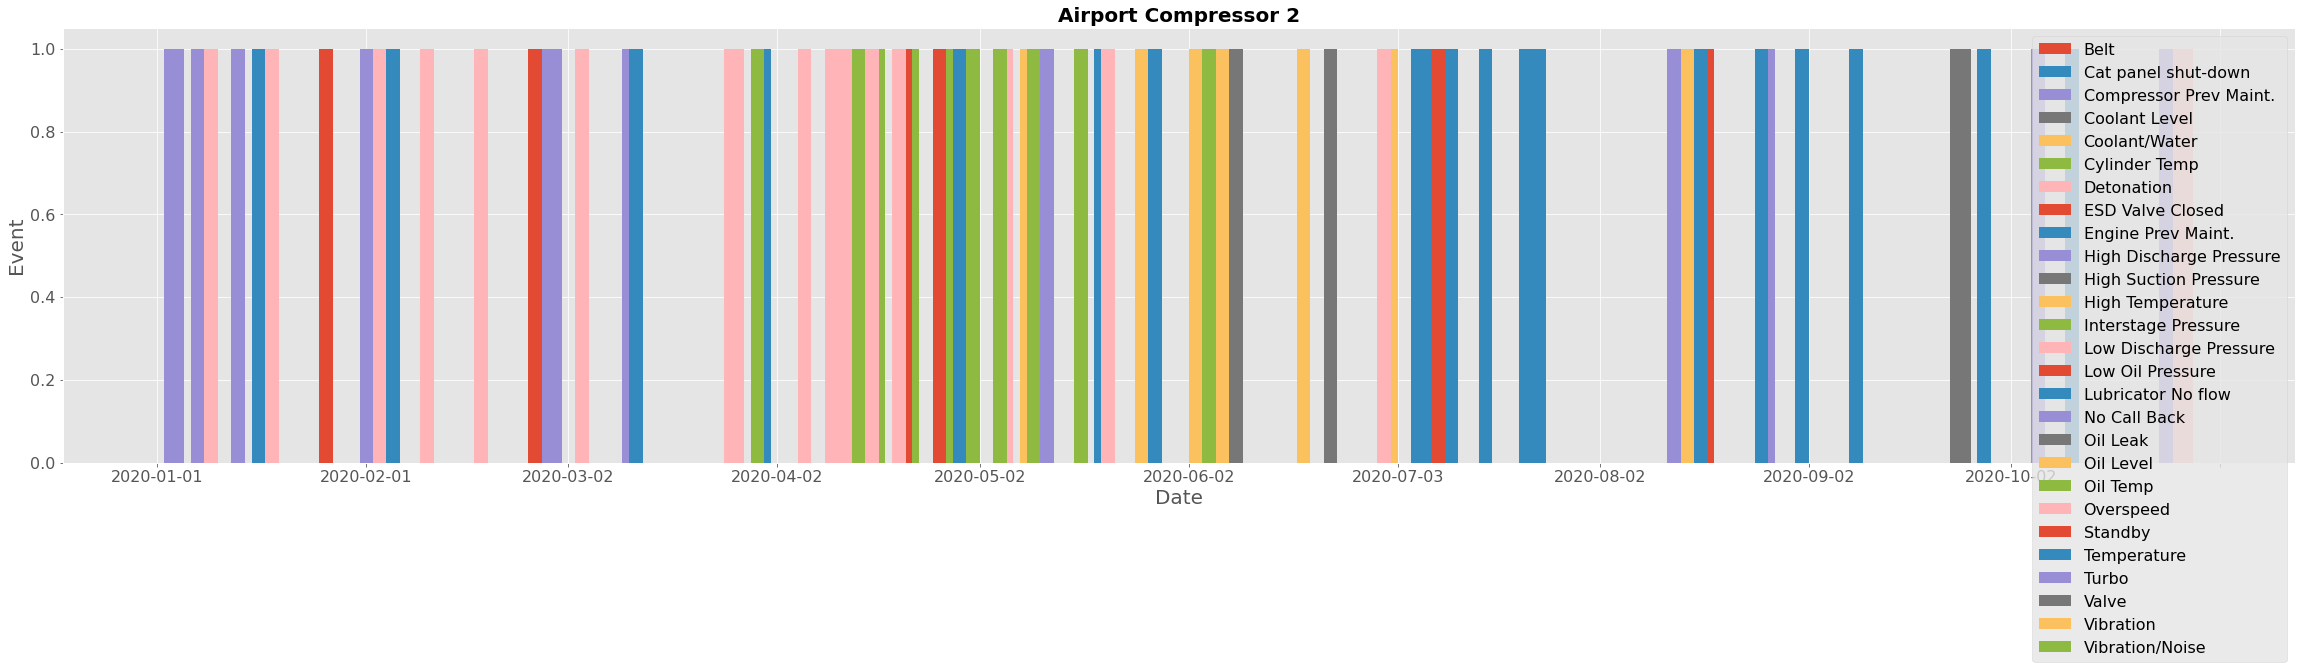

In [59]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(40, 8))

# Creat list of columns to plot
df_event_plot_cols = df_event_plot.columns

# Add x-axis and y-axis
for col in df_event_plot_cols:
    ax.bar(df_event_plot.index.values, df_event_plot[col], width = 2.0, label=col)
    ax.legend()

# Set title and labels for axes
ax.set_xlabel('Date', fontsize = 20)
ax.set_ylabel('Event', fontsize = 20)
ax.set_title('Airport Compressor 2', fontweight="bold", size=20)
ax.tick_params(axis='x', labelsize = 16)
ax.tick_params(axis='y', labelsize = 16)
ax.legend(fontsize=16)


# Define the date format
#date_form = DateFormatter("%m-%d")
#ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each month using (interval=1) 
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

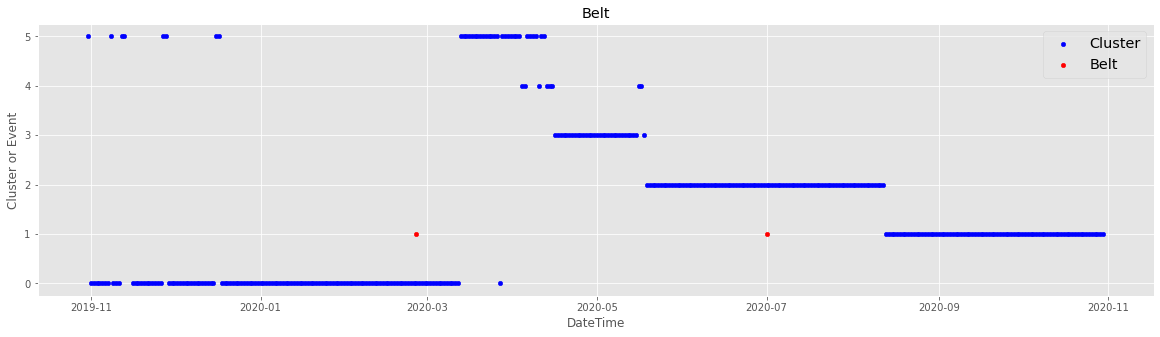

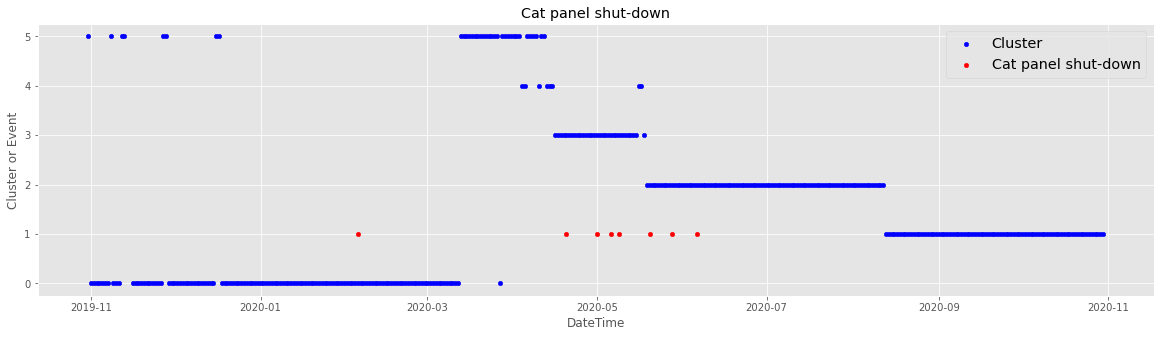

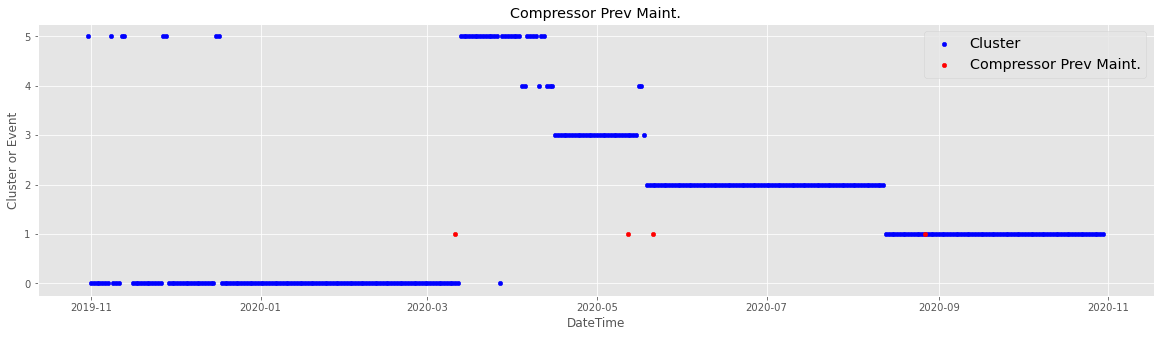

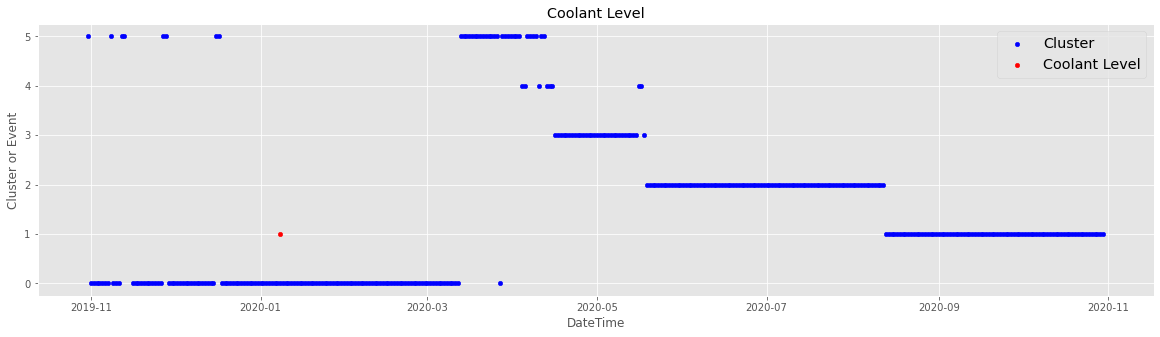

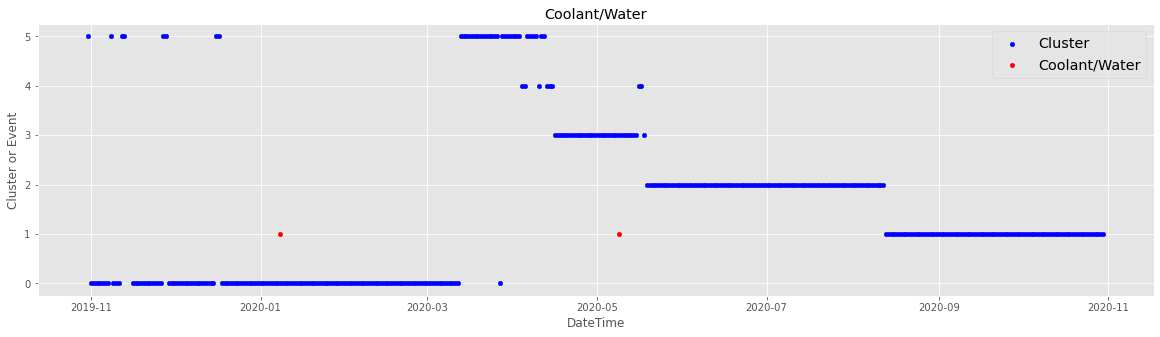

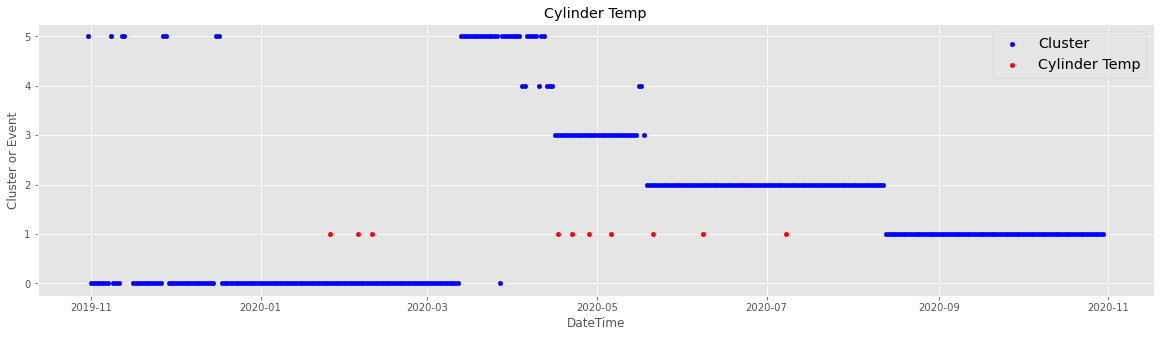

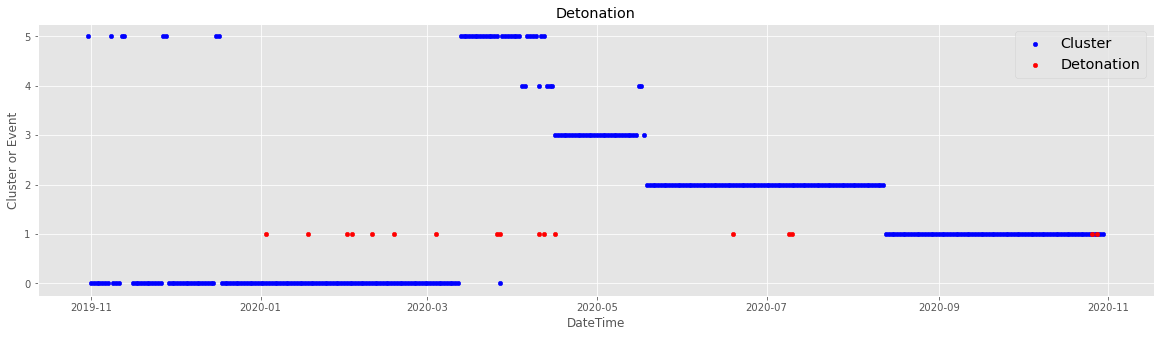

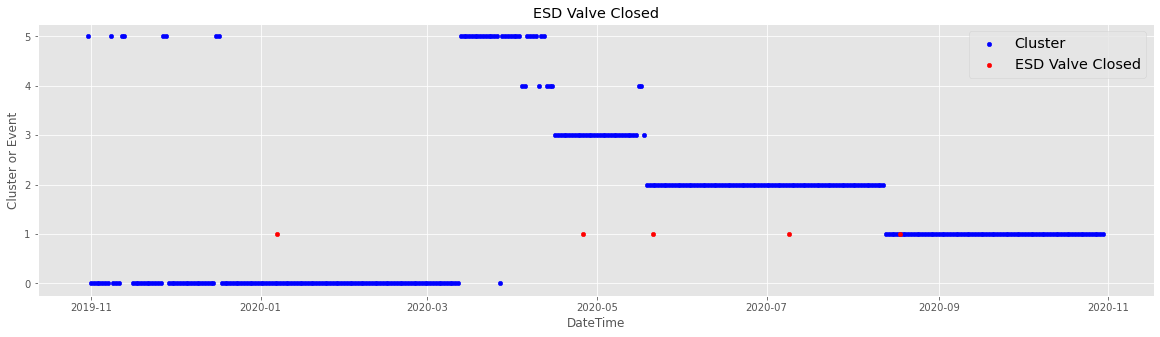

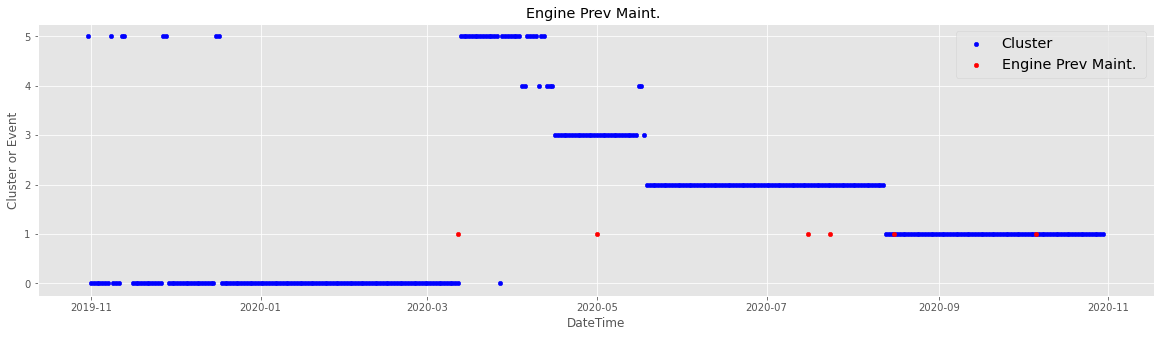

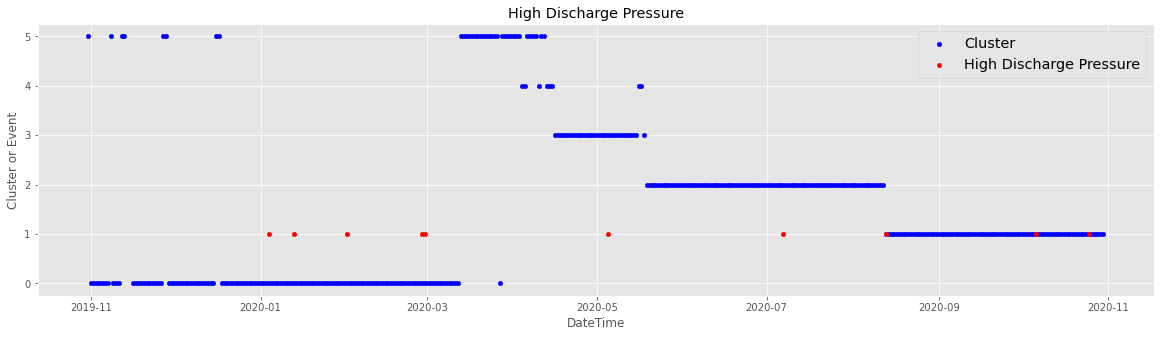

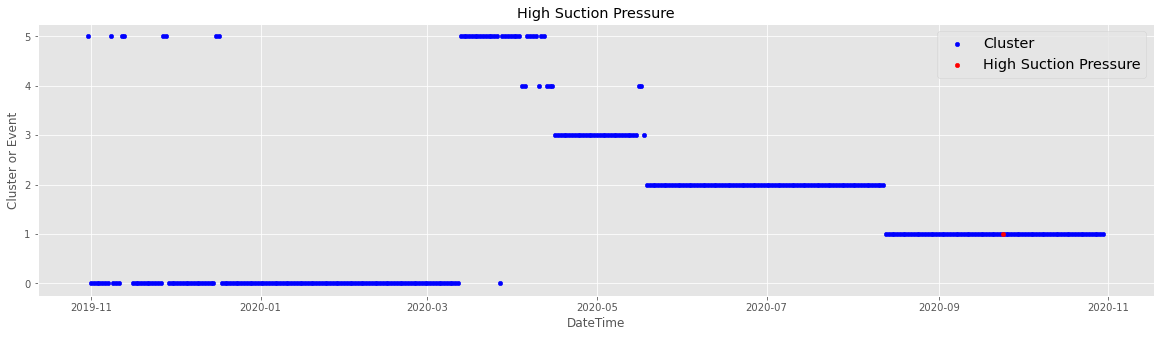

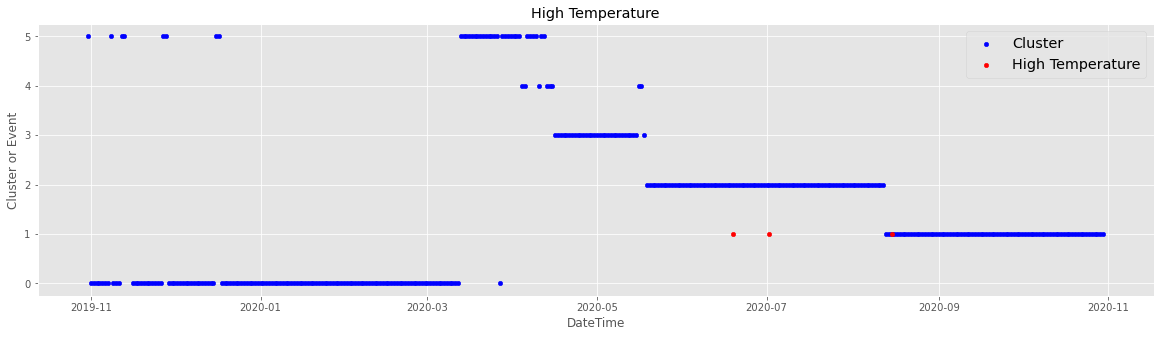

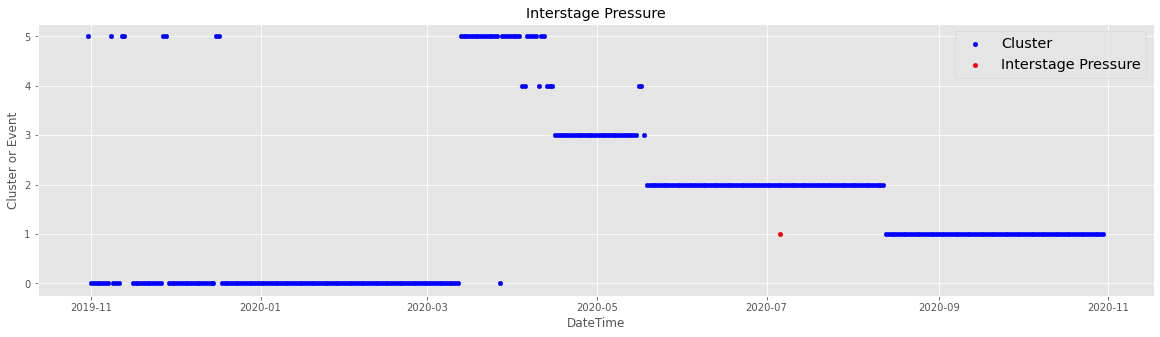

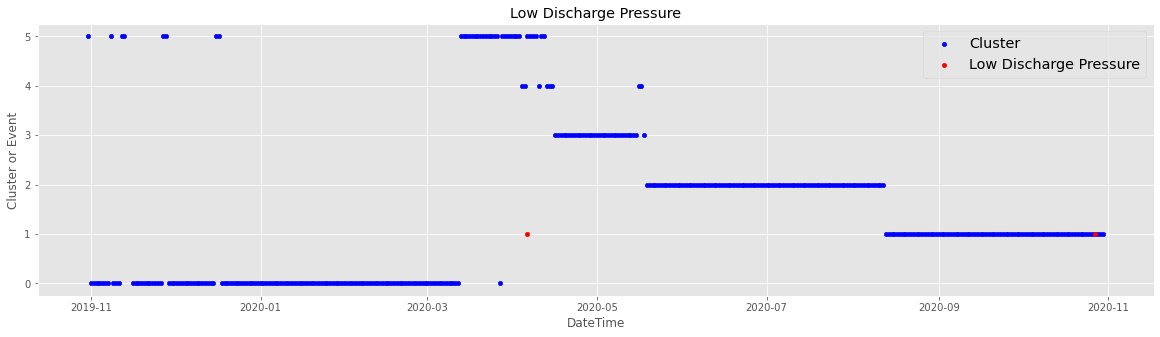

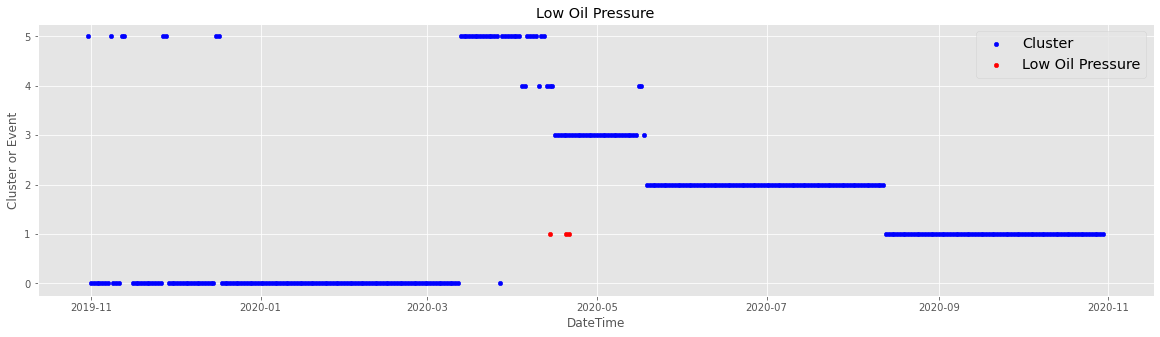

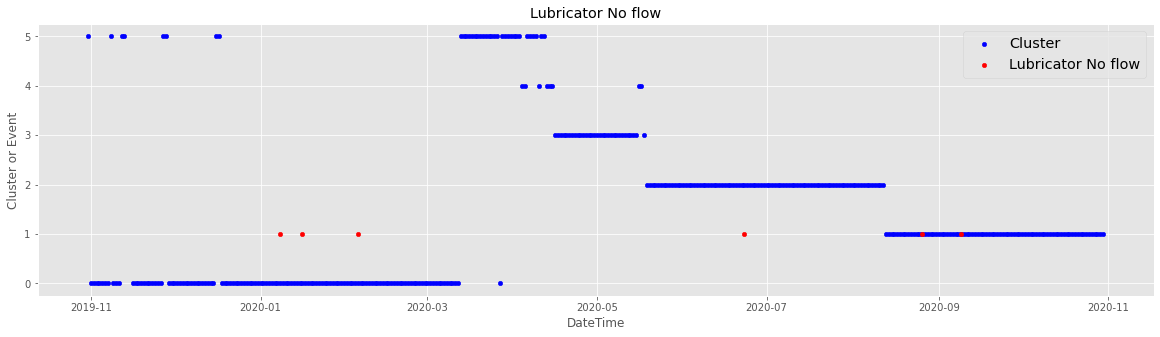

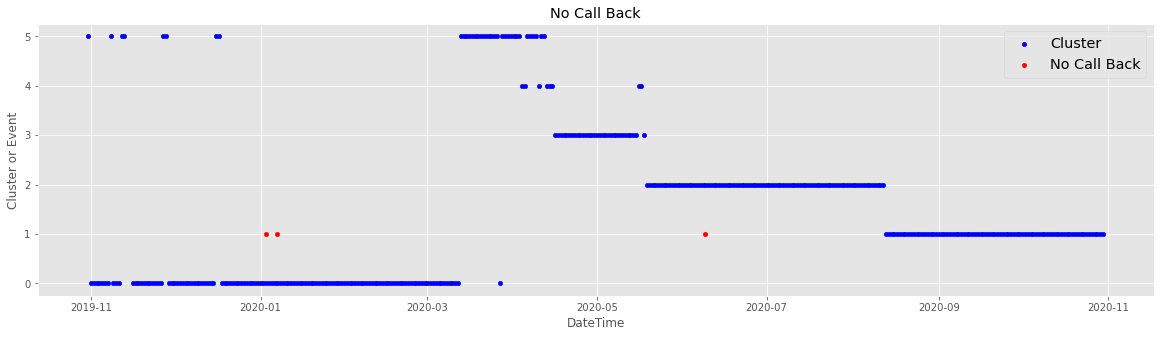

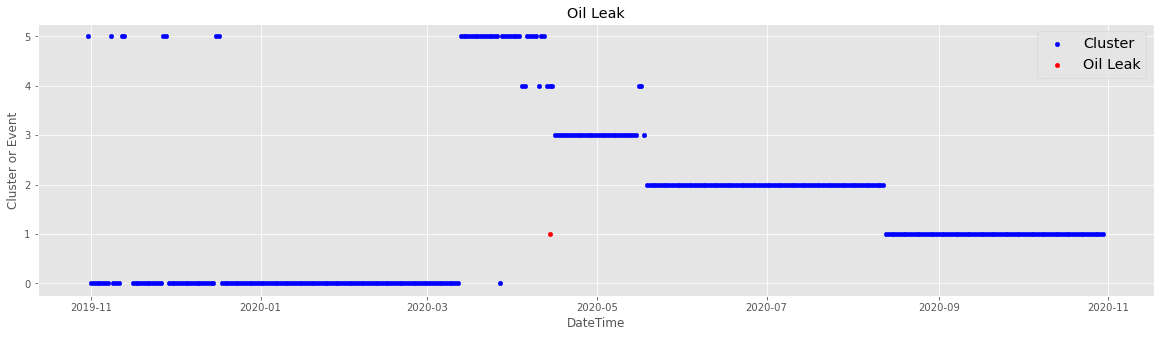

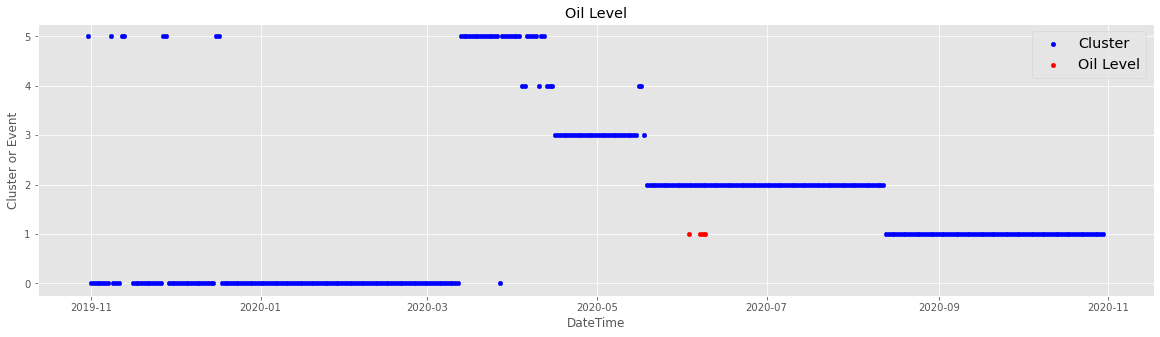

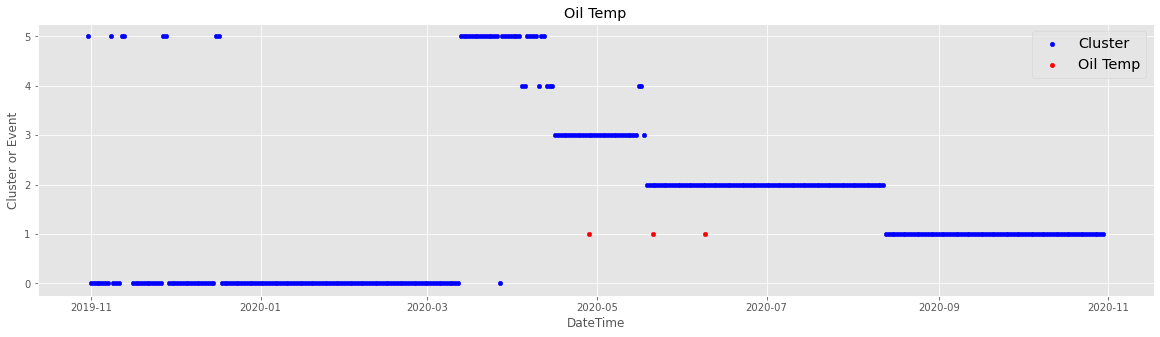

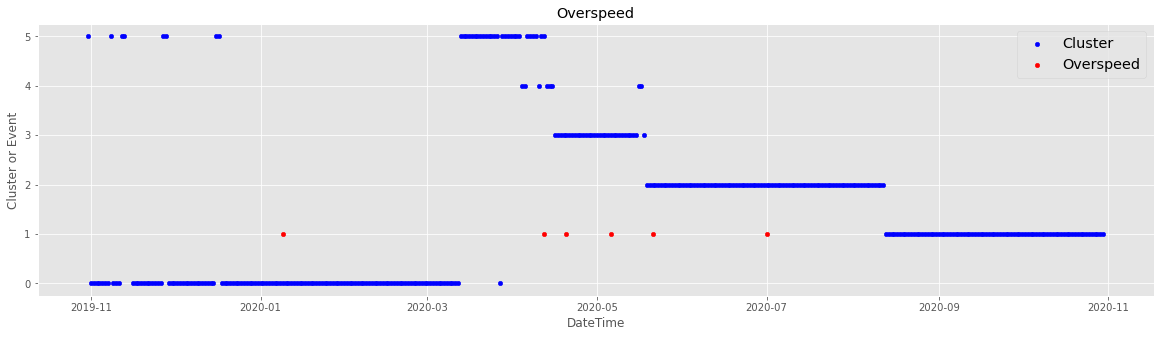

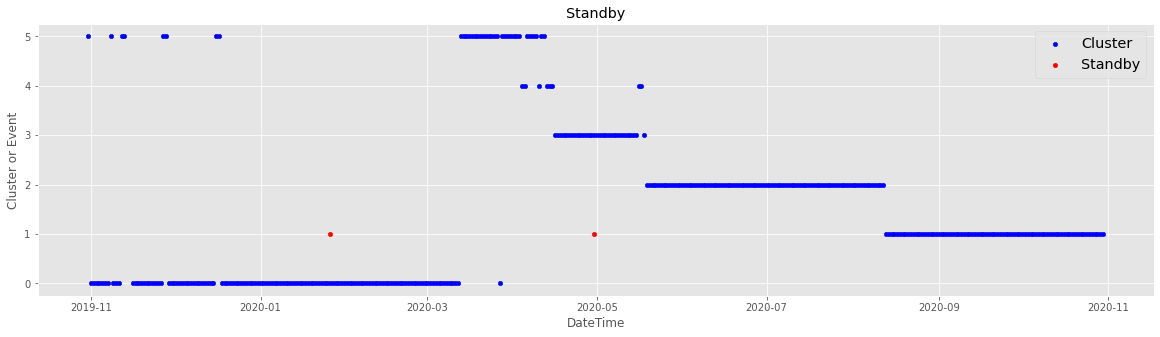

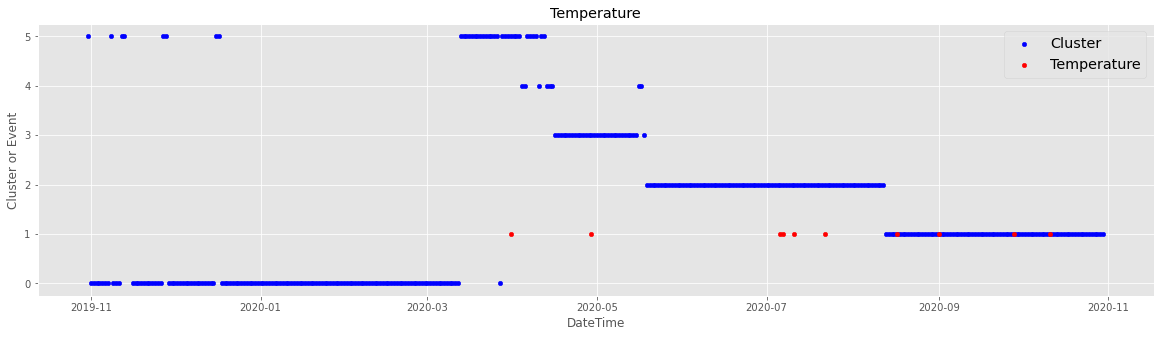

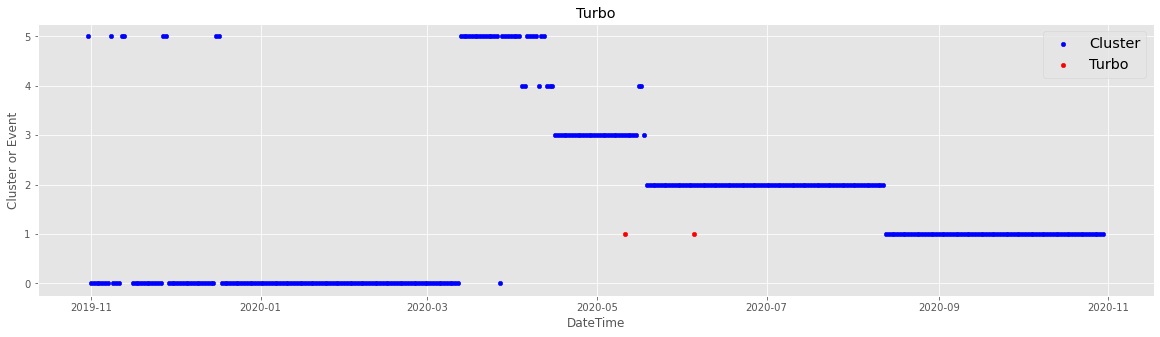

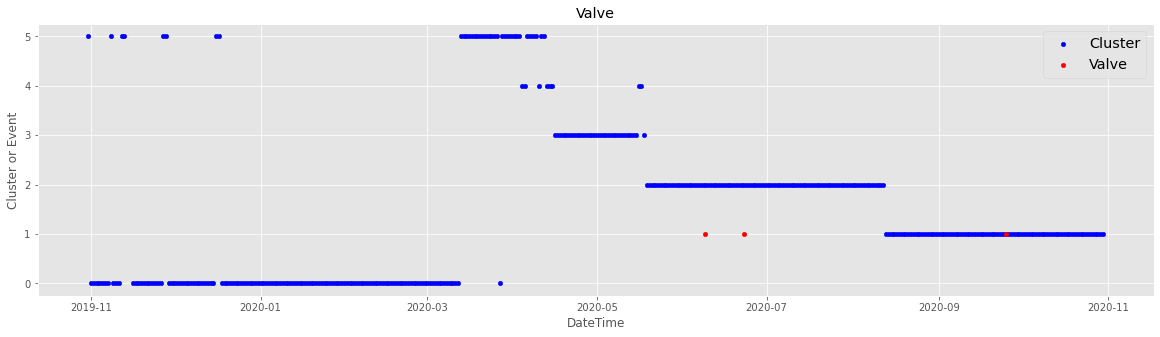

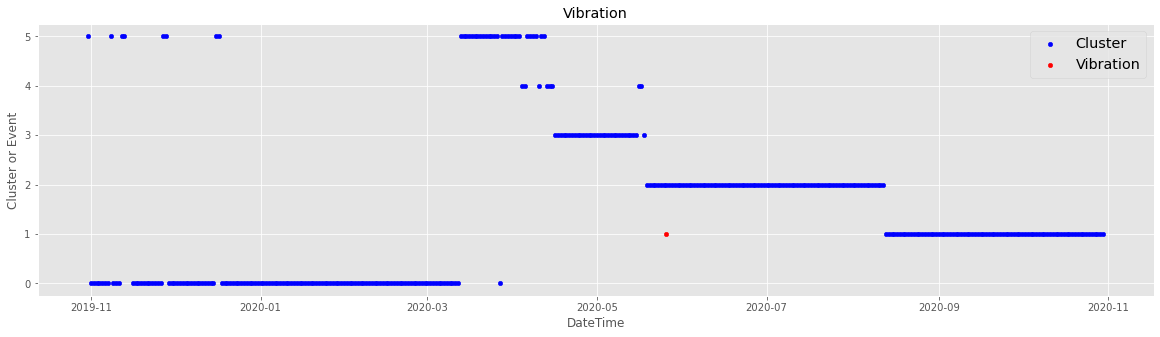

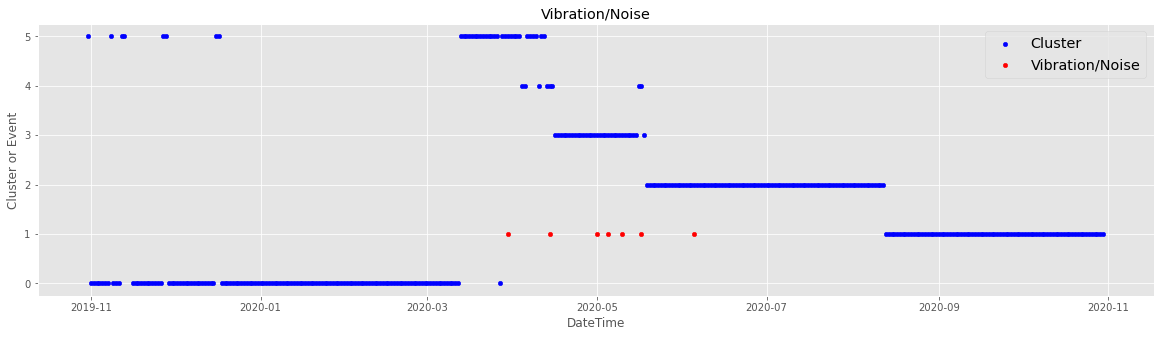

In [60]:
# Plot events and clusters

event_cols = df_event2_onehot.columns

for event in event_cols:
    ax00 = df_event2.plot(kind='scatter',
                    x='DateTime',
                    y='Cluster_Label',
                    figsize=(20, 5),
                    #alpha=0.5,                  # transparency
                    color='blue',
                    #xlim=(1975, 2015)
                   )
    
    ax11 = df_event2.plot(kind='scatter',
                    x='DateTime',
                    y= event,
                    #alpha=0.5,
                    color="red",
                    ax = ax00
                   )
    ax00.set_ylabel('Cluster or Event')
    ax00.set_title(event)
    ax00.legend(['Cluster', event], loc='upper right', fontsize='x-large')

## Evaluate events vs individual daily signals

In [61]:
# Create new df
df_day.set_index('DateTime', inplace=True)
df_day_events = pd.concat([df_day, df_event2_onehot], axis=1)
display(df_day_events)

GCS_MIDW_AIRPORT_CMP2_1STSP  GCS_MIDW_AIRPORT_CMP2_2NDSP  \
DateTime                                                               
2019-10-31                     0.673210                     0.703187   
2019-11-01                     0.822418                     0.853702   
2019-11-02                     0.867310                     0.925656   
2019-11-03                     0.850601                     0.908206   
2019-11-04                     0.859441                     0.911201   
...                                 ...                          ...   
2020-10-26                     1.189587                     1.095496   
2020-10-27                     1.153284                     1.060466   
2020-10-28                     1.086565                     1.008567   
2020-10-29                     1.202979                     1.071019   
2020-10-30                     1.195727                     1.084573   

            GCS_MIDW_AIRPORT_CMP2_3RDSP  GCS_MIDW_AIRPORT_CMP2_CMPOILPRES  \
DateTime                                                                    
2019-10-31                     1.010144                          0.933638   
2019-11-01                     0.975056                          0.926762   
2019-11-02                     1.012050                          0.924678   
2019-11-03                     0.970814                          0.925175   
2019-11-04                     0.985176                          0.925952   
...                                 ...                               ...   
2020-10-26                     0.988018                          1.203067   
2020-10-27                     0.876774                          1.202649   
2020-10-28                     0.993992                          1.179548   
2020-10-29                     1.022128                          1.209580   
2020-10-30                     1.030458                          1.178821   

            GCS_MIDW_AIRPORT_CMP2_CMPOILT  GCS_MIDW_AIRPORT_CMP2_CMPVIB1  \
DateTime                                                                   
2019-10-31                       0.886213                       1.006421   
2019-11-01                       0.890982                       0.992568   
2019-11-02                       0.916484                       0.918638   
2019-11-03                       0.920192                       0.950453   
2019-11-04                       0.923920                       0.943085   
...                                   ...                            ...   
2020-10-26                       1.102480                       0.927614   
2020-10-27                       1.105250                       0.959622   
2020-10-28                       1.078528                       0.996573   
2020-10-29                       1.103429                       1.021970   
2020-10-30                       1.128225                       0.933504   

            GCS_MIDW_AIRPORT_CMP2_COOLERVIB  GCS_MIDW_AIRPORT_CMP2_CYL1T  \
DateTime                                                                   
2019-10-31                         1.080827                     0.598935   
2019-11-01                         0.966035                     0.621576   
2019-11-02                         0.846073                     0.802316   
2019-11-03                         0.842156                     0.726725   
2019-11-04                         0.754895                     0.686283   
...                                     ...                          ...   
2020-10-26                         1.099134                     1.281794   
2020-10-27                         1.290016                     1.225037   
2020-10-28                         0.927199                     1.205272   
2020-10-29                         0.958316                     1.252573   
2020-10-30                         0.873370                     1.275550   

            GCS_MIDW_AIRPORT_CMP2_CYL2T  GCS_MIDW_AIRPORT_CMP2_CYL3T  ...  \
DateTime          

In [62]:
# Plot events and daily metrics
#event_cols = df_event2_onehot.columns
#df_day_events.reset_index(inplace=True)

#for event in event_cols:
#    for metric in df_day_cols[1:]:
#        ax000 = df_day_events.plot(kind='line',
#                                   x='DateTime',
#                                   y= metric,
#                                   figsize=(20, 5),
#                                   #alpha=0.5,  # transparency
#                                   color='blue',
#                                   #xlim=(1975, 2015)
#                                  )
        
#        ax111 = df_day_events.plot(kind='scatter',
#                                   x='DateTime',
#                                   y= event,
#                                   #alpha=0.5,
#                                   color="red",
#                                   ax = ax000
#                                  )
        
#        ax000.set_ylabel(metric)
#        ax000.set_title(event)
#        ax000.legend([metric, event], loc='lower right', fontsize='x-large')